In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=(8,4)
plt.rcParams['figure.dpi']=400

In [2]:
raw_df = pd.read_csv("D:\ExcelR_Assignments\Clustering\Datasets\crime_data.csv")
raw_df.rename(columns = {'Unnamed: 0': 'City'}, inplace = True)
raw_df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
raw_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
raw_df['City'].value_counts()

Alabama           1
Pennsylvania      1
Nevada            1
New Hampshire     1
New Jersey        1
New Mexico        1
New York          1
North Carolina    1
North Dakota      1
Ohio              1
Oklahoma          1
Oregon            1
Rhode Island      1
Alaska            1
South Carolina    1
South Dakota      1
Tennessee         1
Texas             1
Utah              1
Vermont           1
Virginia          1
Washington        1
West Virginia     1
Wisconsin         1
Nebraska          1
Montana           1
Missouri          1
Mississippi       1
Arizona           1
Arkansas          1
California        1
Colorado          1
Connecticut       1
Delaware          1
Florida           1
Georgia           1
Hawaii            1
Idaho             1
Illinois          1
Indiana           1
Iowa              1
Kansas            1
Kentucky          1
Louisiana         1
Maine             1
Maryland          1
Massachusetts     1
Michigan          1
Minnesota         1
Wyoming           1


In [6]:
# understanding the relation between data

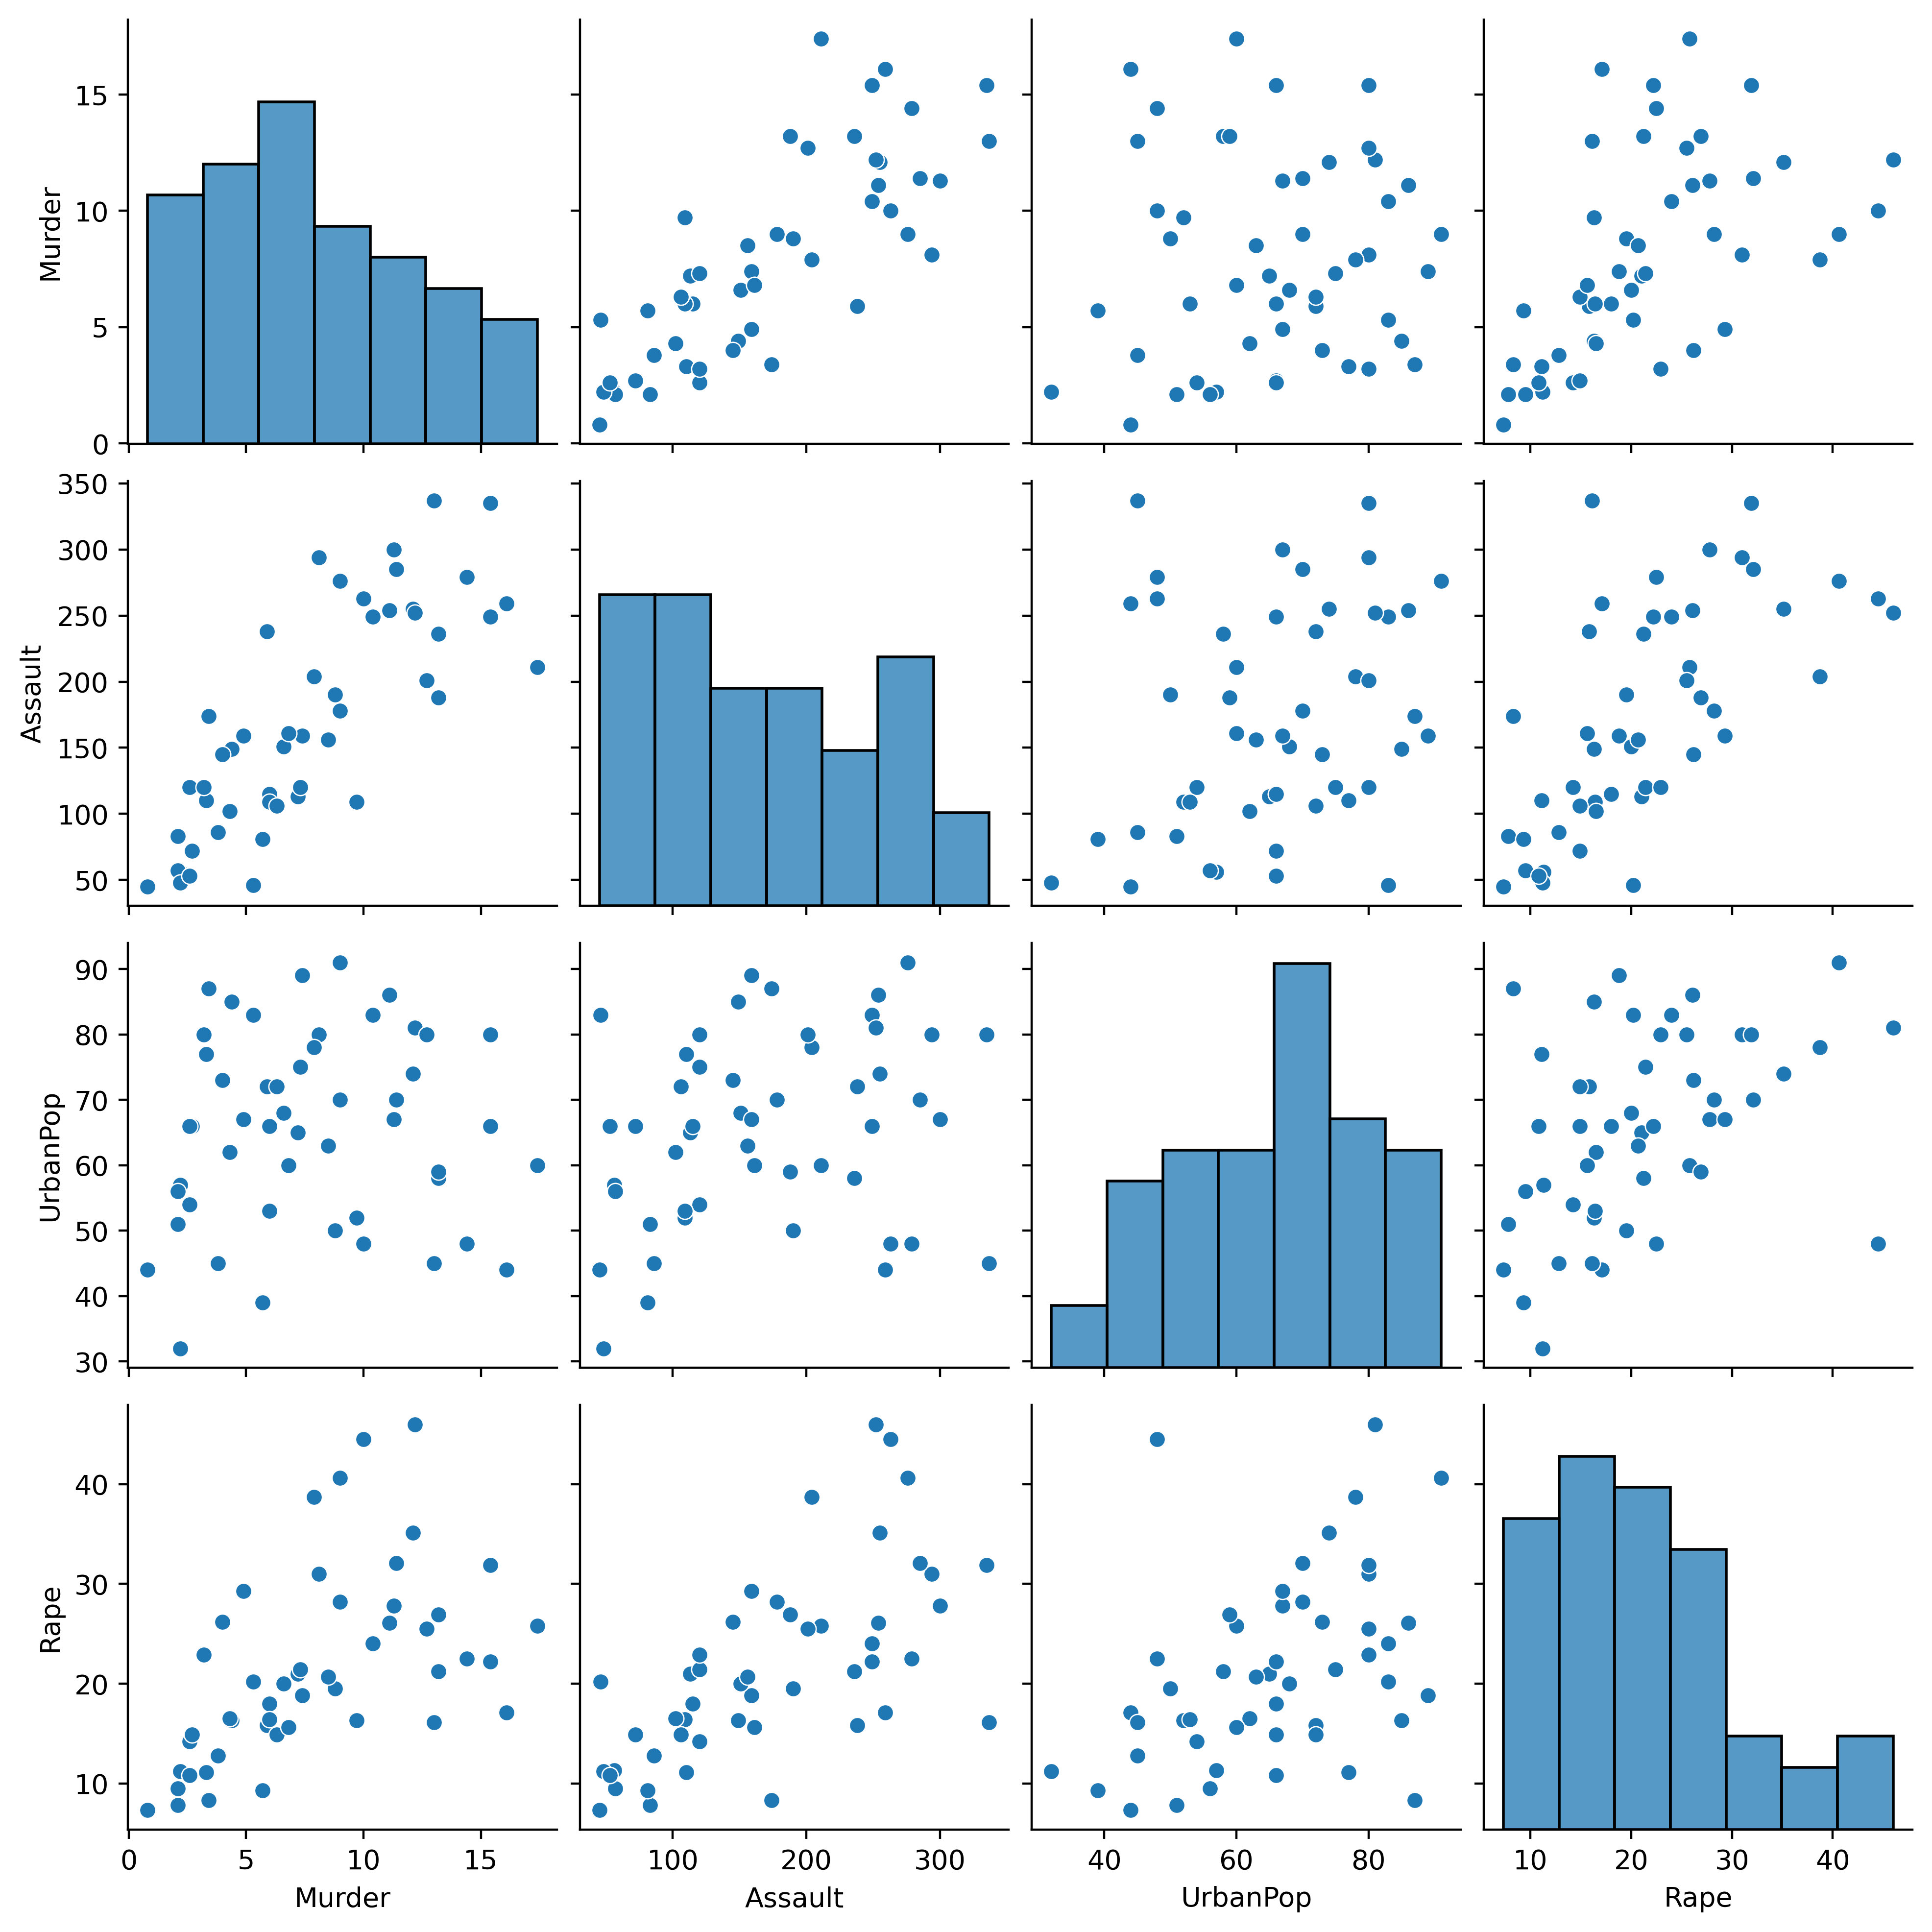

In [7]:
sns.pairplot(raw_df)

In [8]:
raw_df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [9]:
#1. Hierarchical Clustering

In [10]:
x = raw_df[['Murder', 'Assault', 'UrbanPop', 'Rape']]
x.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [11]:
# Deciding how many clusters to be made by plotting Dendrogram

In [12]:
# Single Linkage

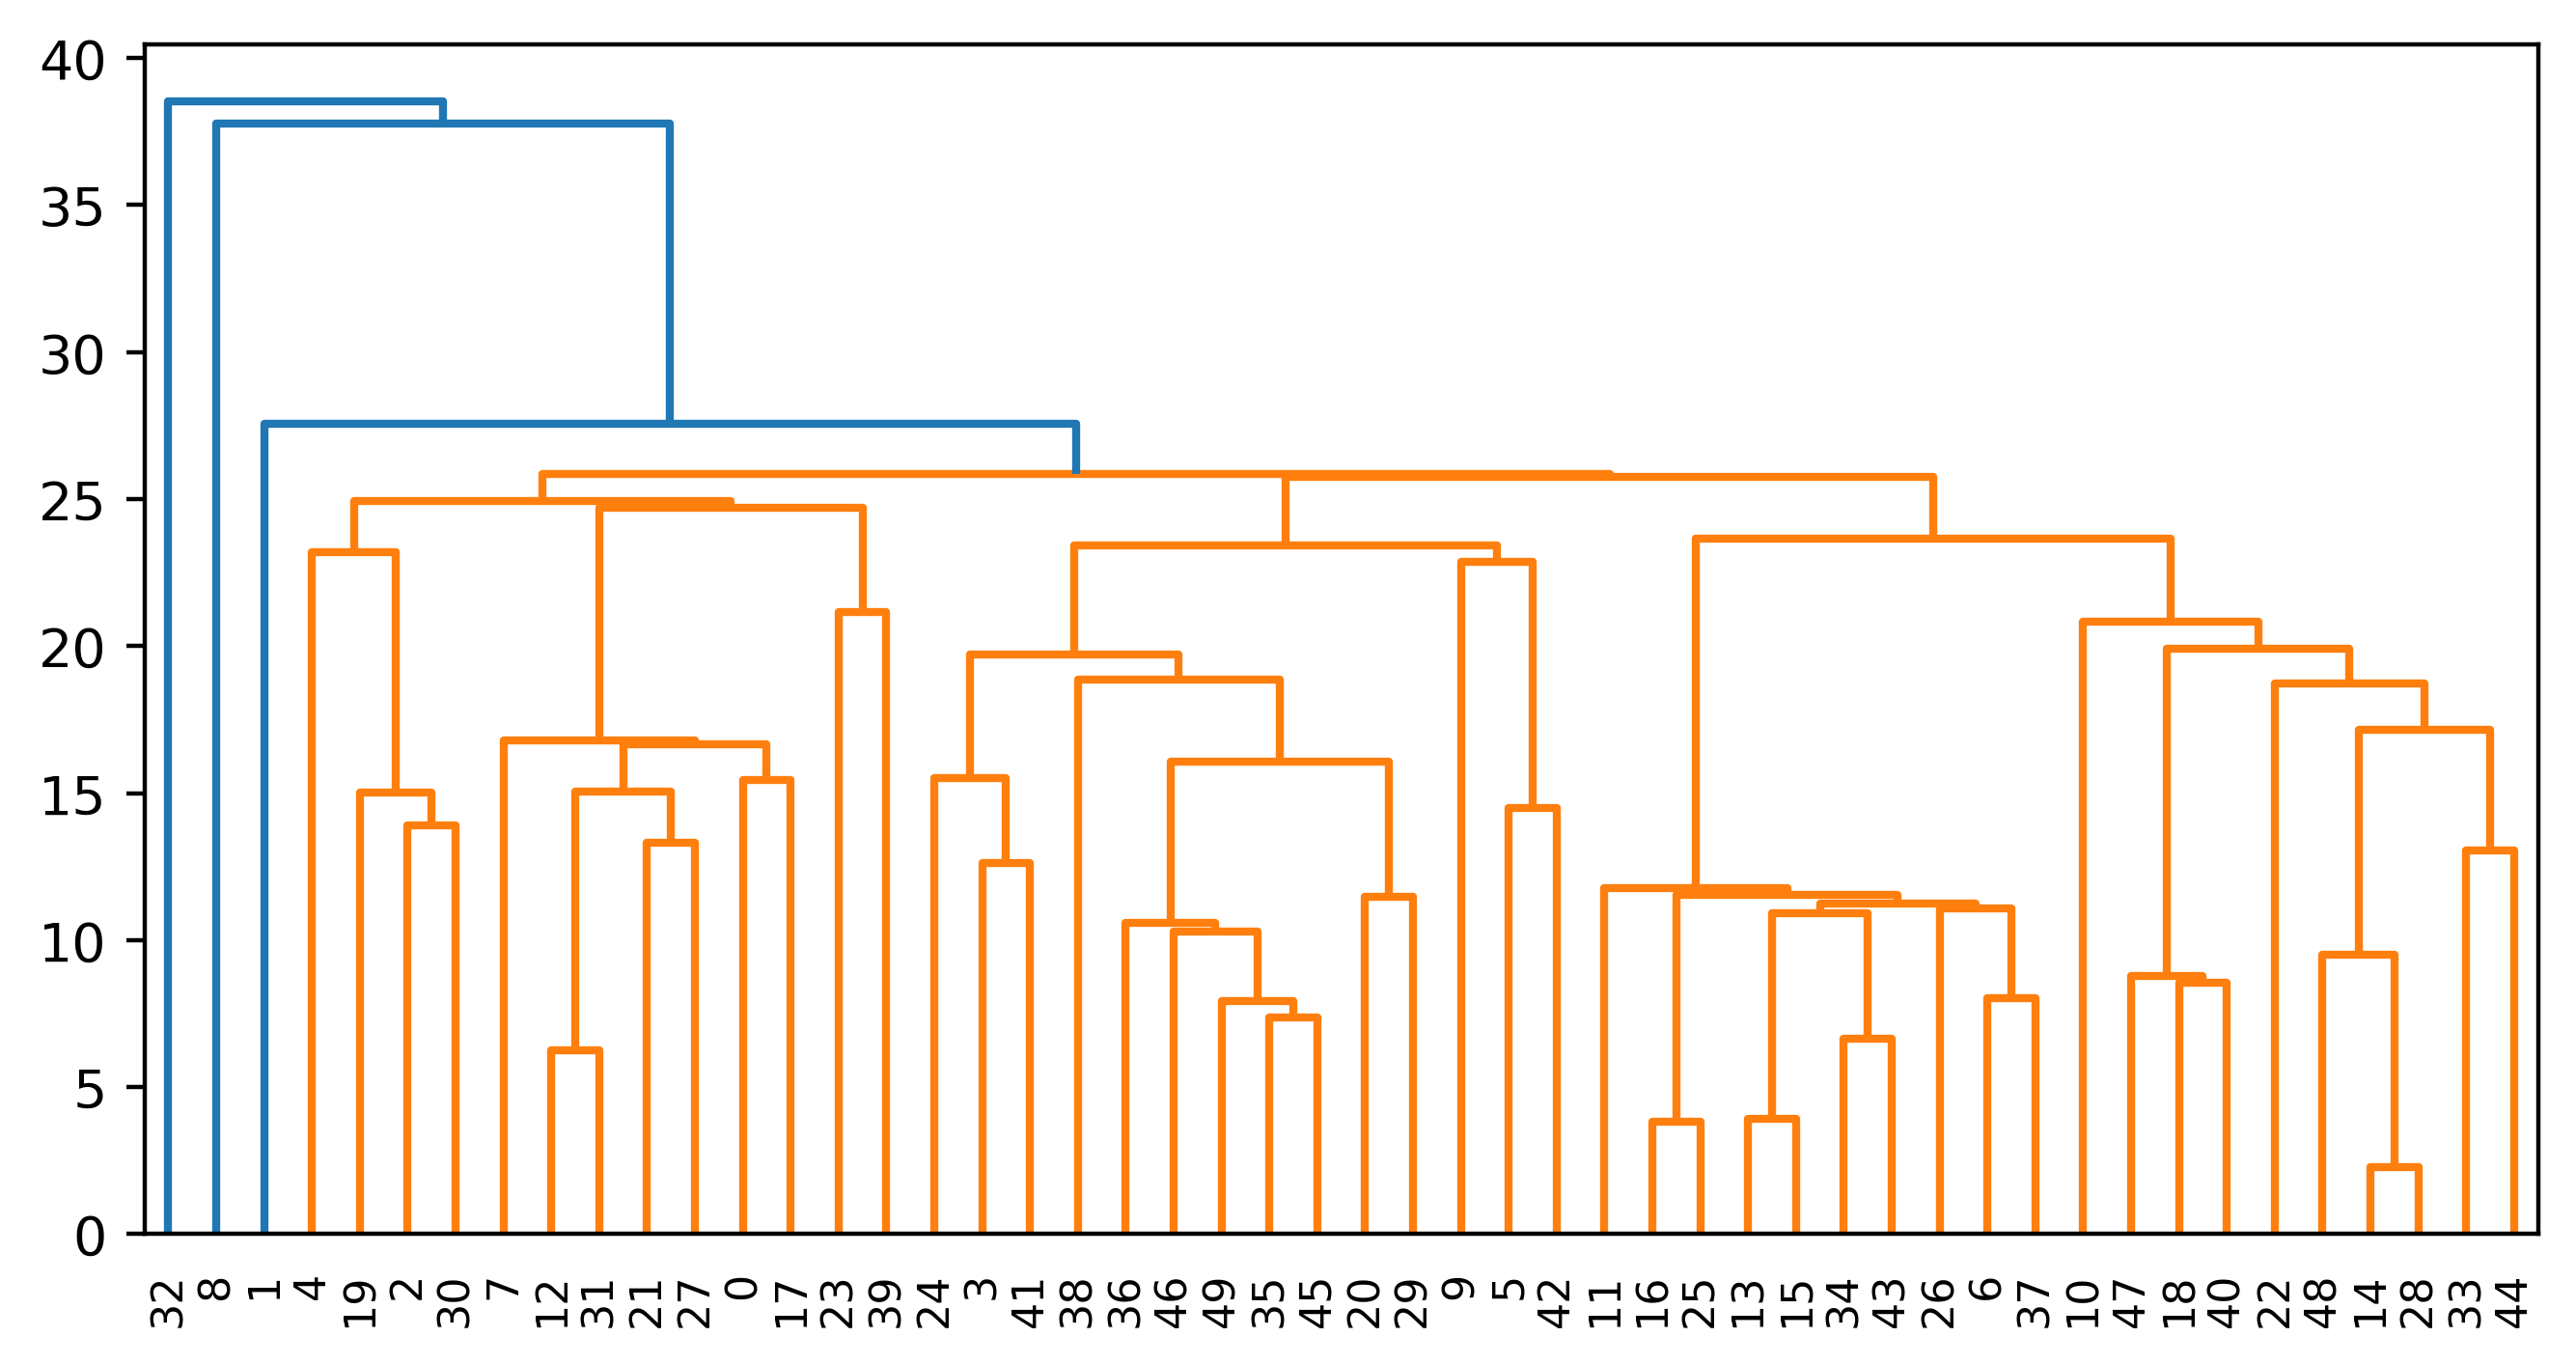

In [13]:
lk1 = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk1)

In [14]:
# There is overlaping of clusters in single linkage 

In [15]:
# Complete Linkage

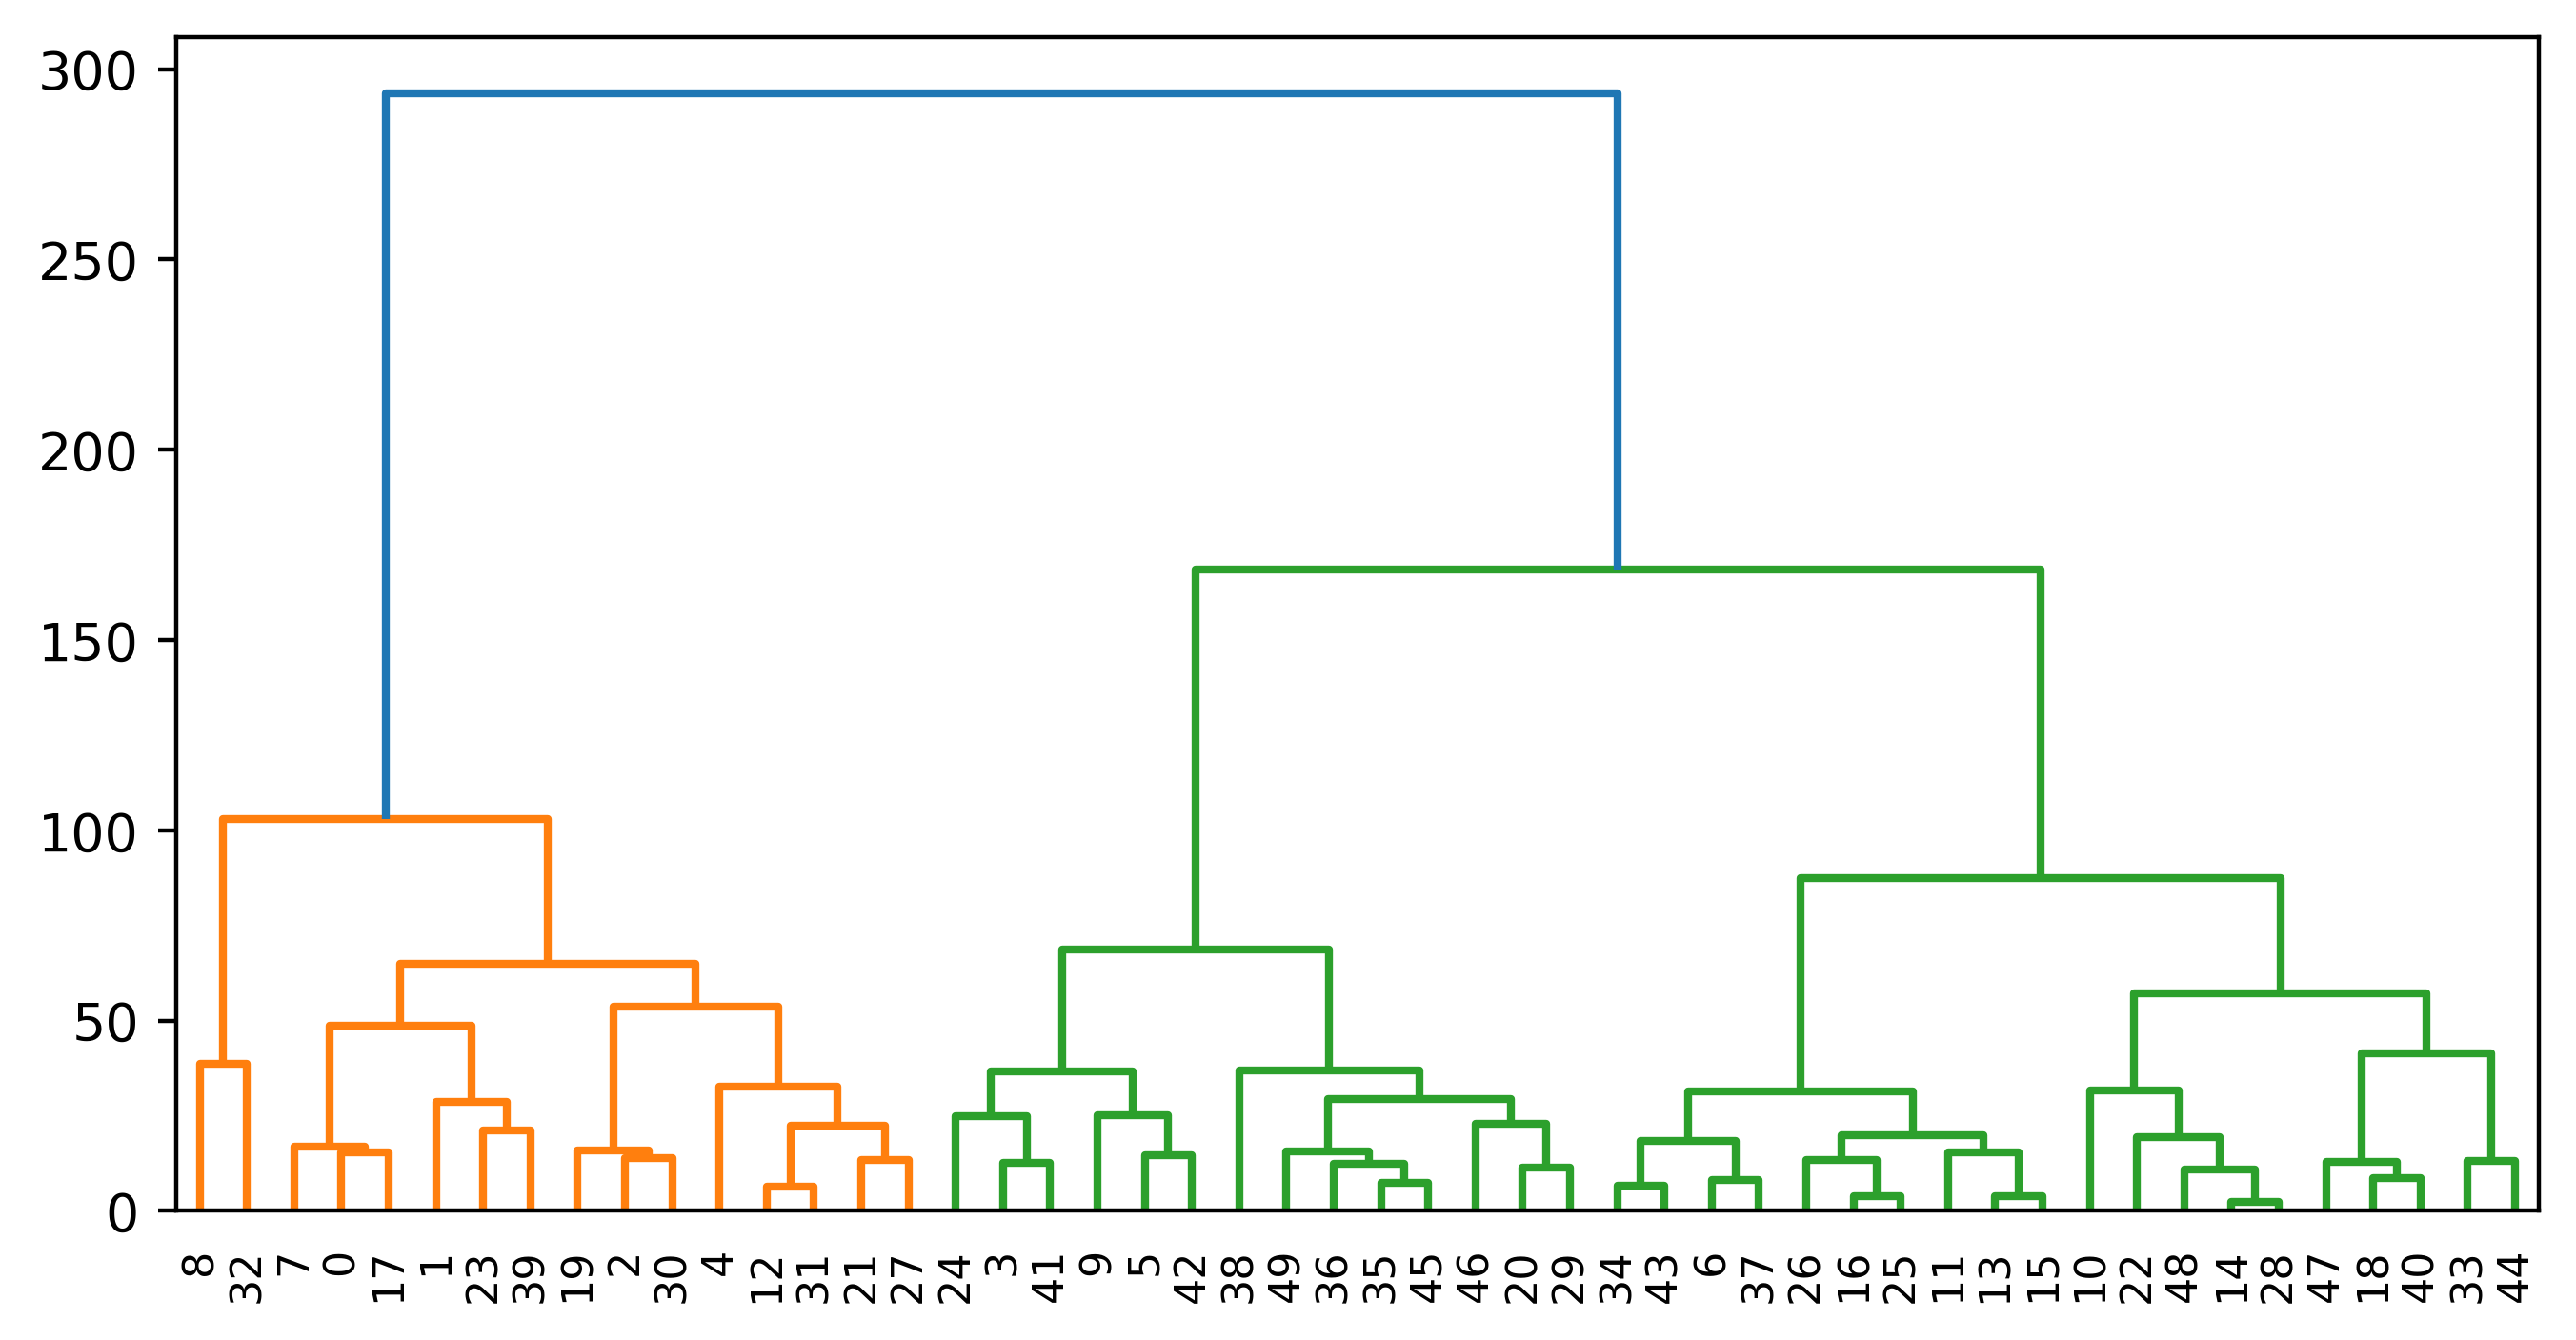

In [17]:
lk2 = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk2)

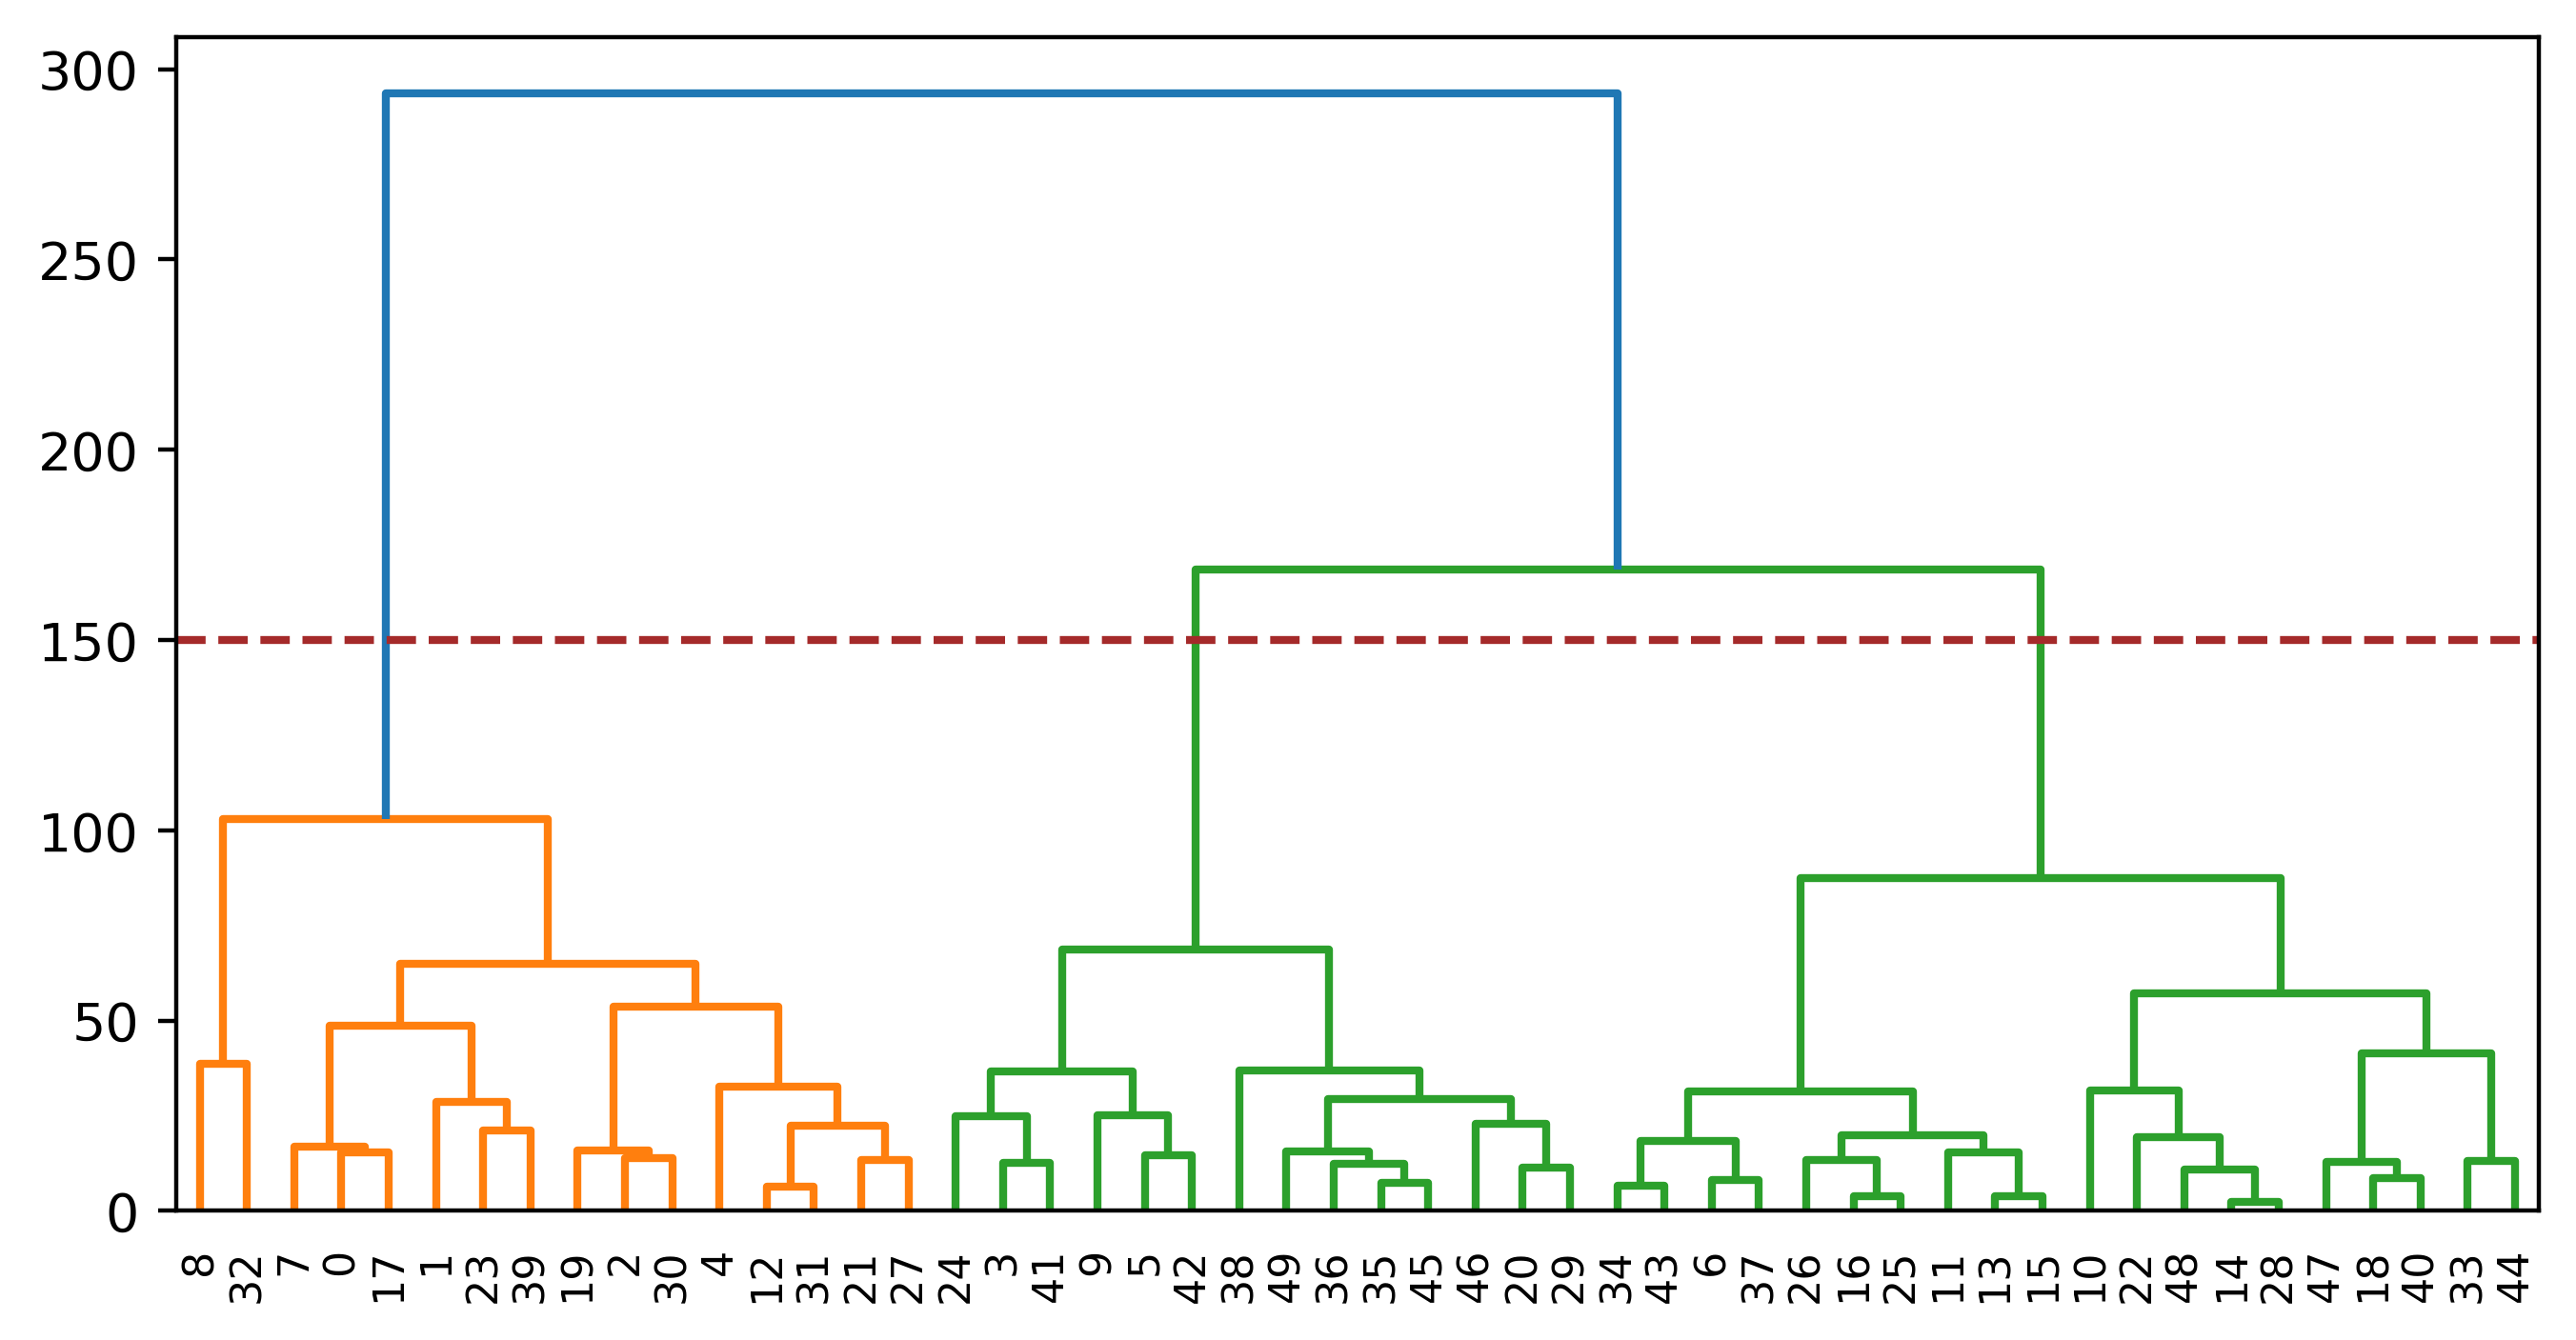

In [18]:
lk2 = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk2)
plt.axhline(y=150, linestyle='--', color='brown')

In [19]:
# there is no overlaping of clusters in complete linkage and i think 4 is the optimal no. of clusters for our data

In [20]:
# Hierarchical Clustering Model Building

In [21]:
hc = AgglomerativeClustering(n_clusters = 4)
y_Pred_hc = hc.fit_predict(x)
y_Pred_hc

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [22]:
# Cluster Analysis

In [23]:
raw_df['Hierarchy_Cluster'] = y_Pred_hc
raw_df.head()

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [24]:
raw_df[raw_df['Hierarchy_Cluster']==0]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
19,Maryland,11.3,300,67,27.8,0
21,Michigan,12.1,255,74,35.1,0


In [25]:
raw_df[raw_df['Hierarchy_Cluster']==1]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster
10,Hawaii,5.3,46,83,20.2,1
14,Iowa,2.2,56,57,11.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1
40,South Dakota,3.8,86,45,12.8,1
44,Vermont,2.2,48,32,11.2,1
47,West Virginia,5.7,81,39,9.3,1
48,Wisconsin,2.6,53,66,10.8,1


In [26]:
raw_df[raw_df['Hierarchy_Cluster']==2]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster
3,Arkansas,8.8,190,50,19.5,2
5,Colorado,7.9,204,78,38.7,2
9,Georgia,17.4,211,60,25.8,2
20,Massachusetts,4.4,149,85,16.3,2
24,Missouri,9.0,178,70,28.2,2
29,New Jersey,7.4,159,89,18.8,2
35,Oklahoma,6.6,151,68,20.0,2
36,Oregon,4.9,159,67,29.3,2
38,Rhode Island,3.4,174,87,8.3,2
41,Tennessee,13.2,188,59,26.9,2


In [27]:
raw_df[raw_df['Hierarchy_Cluster']==3]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster
6,Connecticut,3.3,110,77,11.1,3
11,Idaho,2.6,120,54,14.2,3
13,Indiana,7.2,113,65,21.0,3
15,Kansas,6.0,115,66,18.0,3
16,Kentucky,9.7,109,52,16.3,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
34,Ohio,7.3,120,75,21.4,3
37,Pennsylvania,6.3,106,72,14.9,3
43,Utah,3.2,120,80,22.9,3


In [28]:
raw_df.groupby('Hierarchy_Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Hierarchy_Cluster,,,,
0,11.812500,272.562500,68.312500,28.375000
1,2.950000,62.700000,53.900000,11.510000
2,8.214286,173.285714,70.642857,22.842857
3,5.590000,112.400000,65.600000,17.270000


In [29]:
# We can see that,the clusters are created according the average of crime rates in cities
# Cluster 0 is grup of cities having highets crime rate 
# Cluster 1 is grup of cities having lowest crime rate 
# Cluster 2 & 3 is grup of cities having moderate crime rates

In [31]:
# Visualizing the clusters

<Axes: xlabel='Assault', ylabel='Murder'>

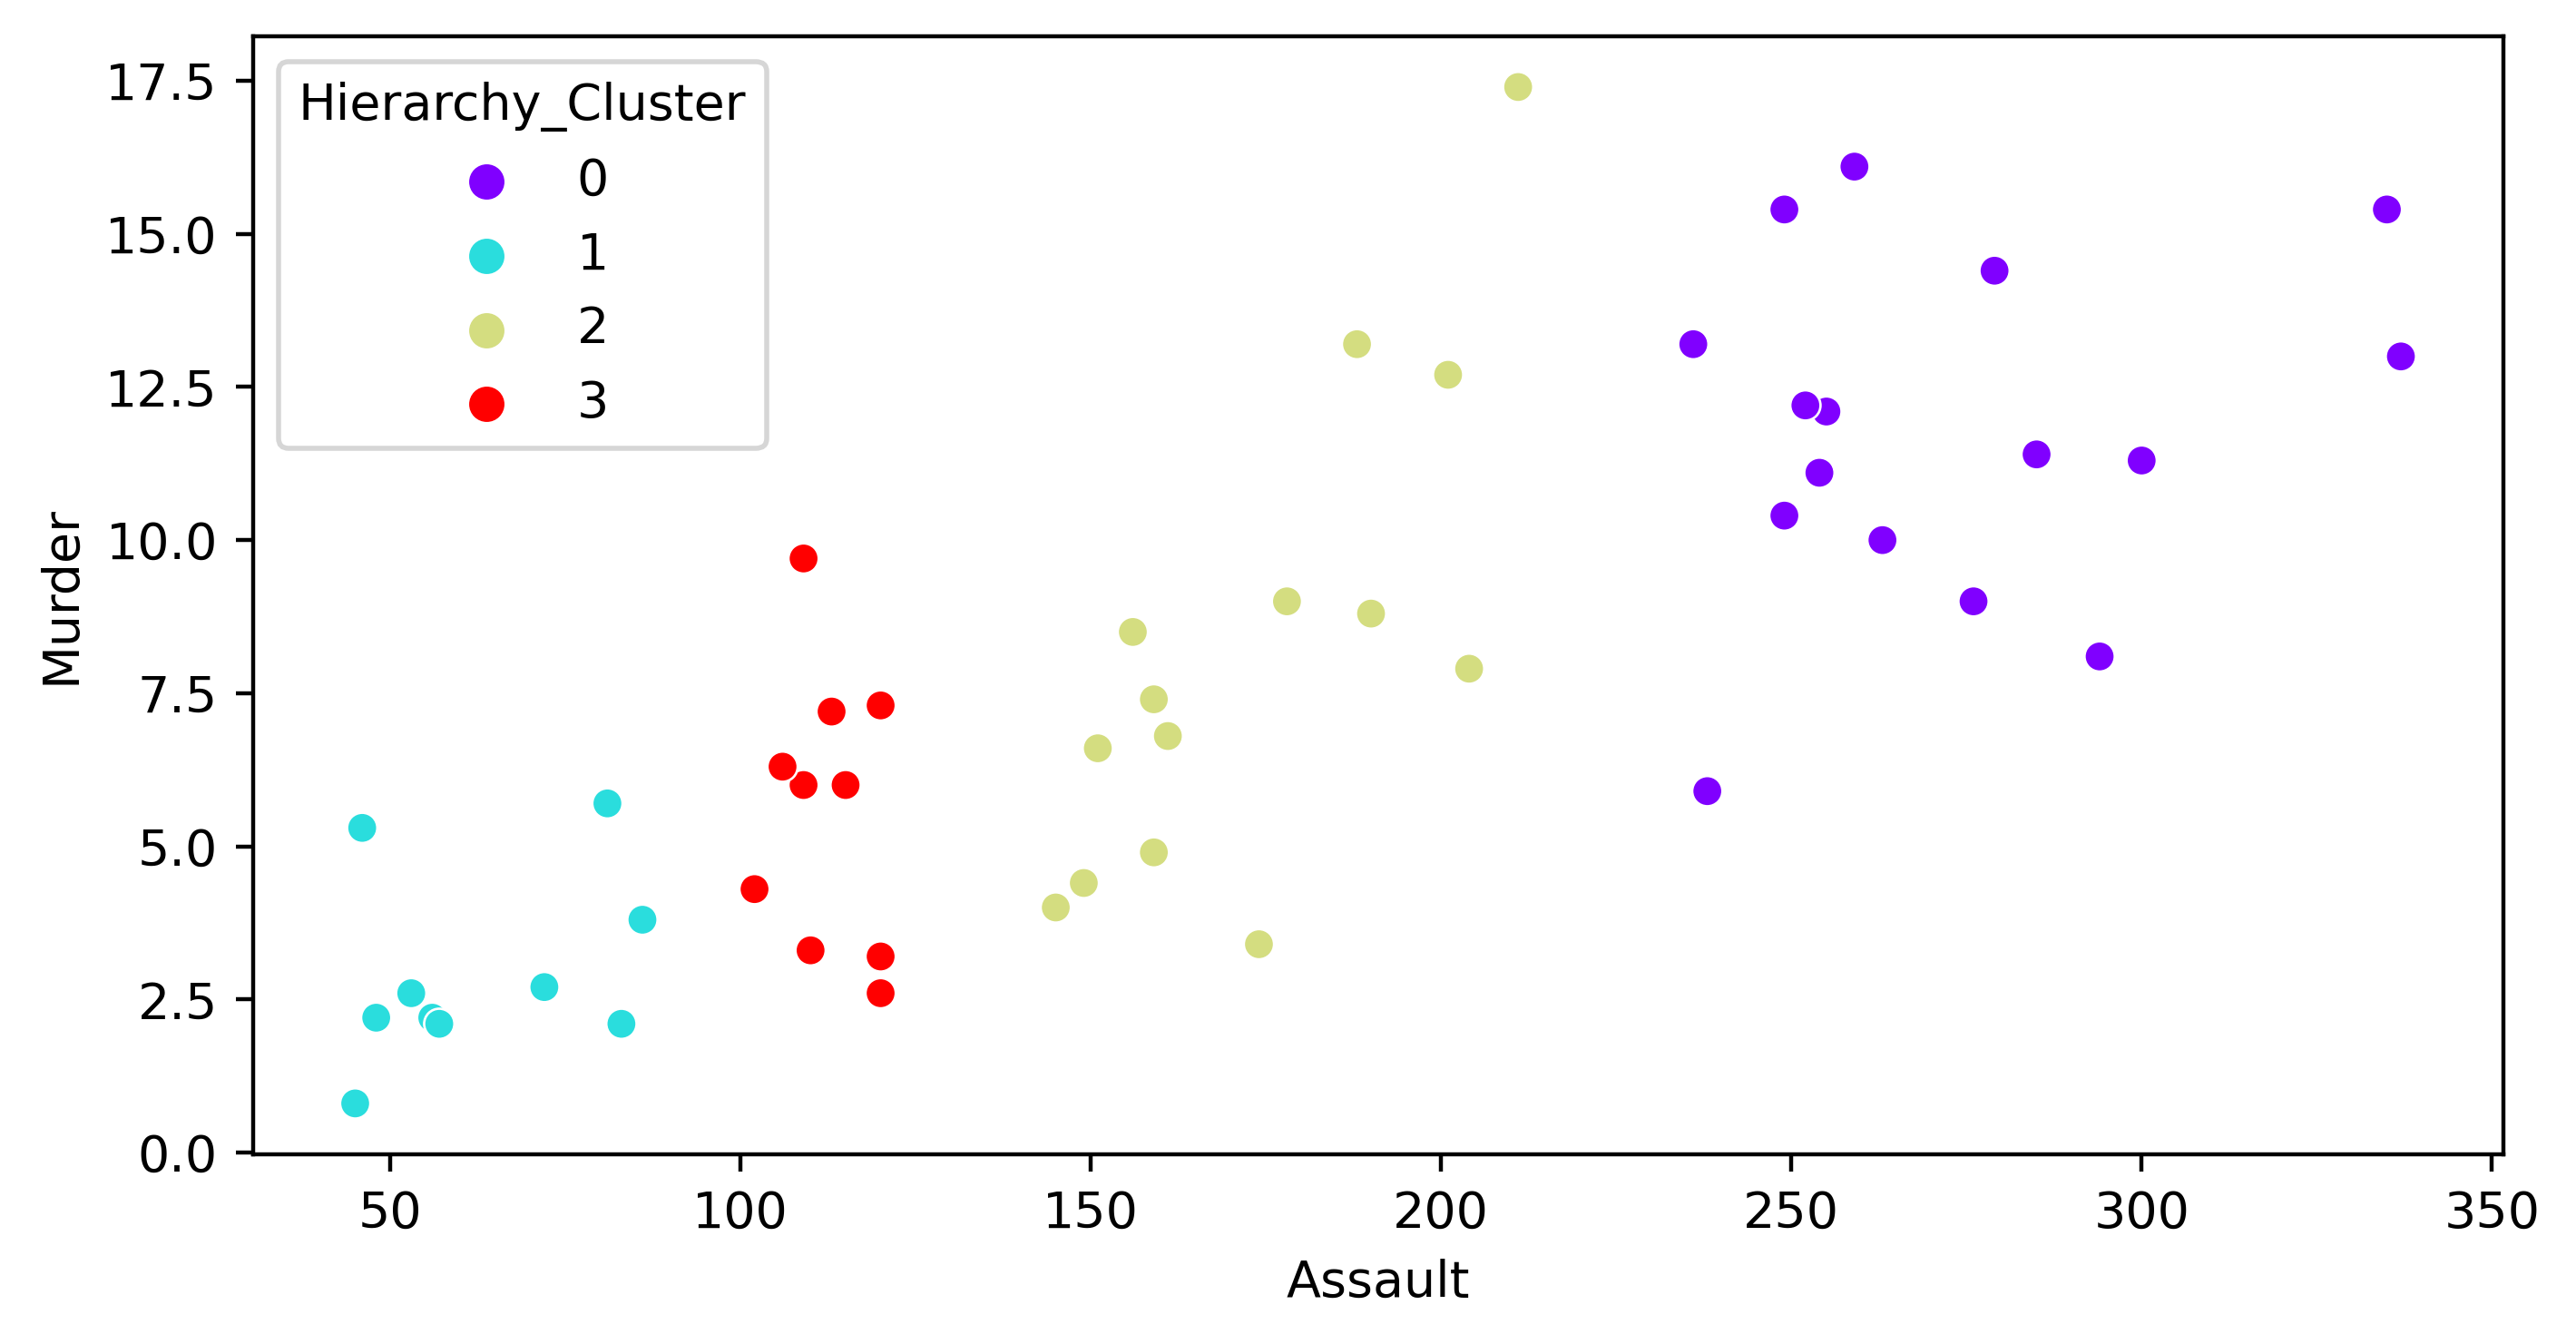

In [32]:
sns.scatterplot(x = raw_df['Assault'], y = raw_df['Murder'], hue = raw_df['Hierarchy_Cluster'], palette = 'rainbow')


<Axes: xlabel='UrbanPop', ylabel='Rape'>

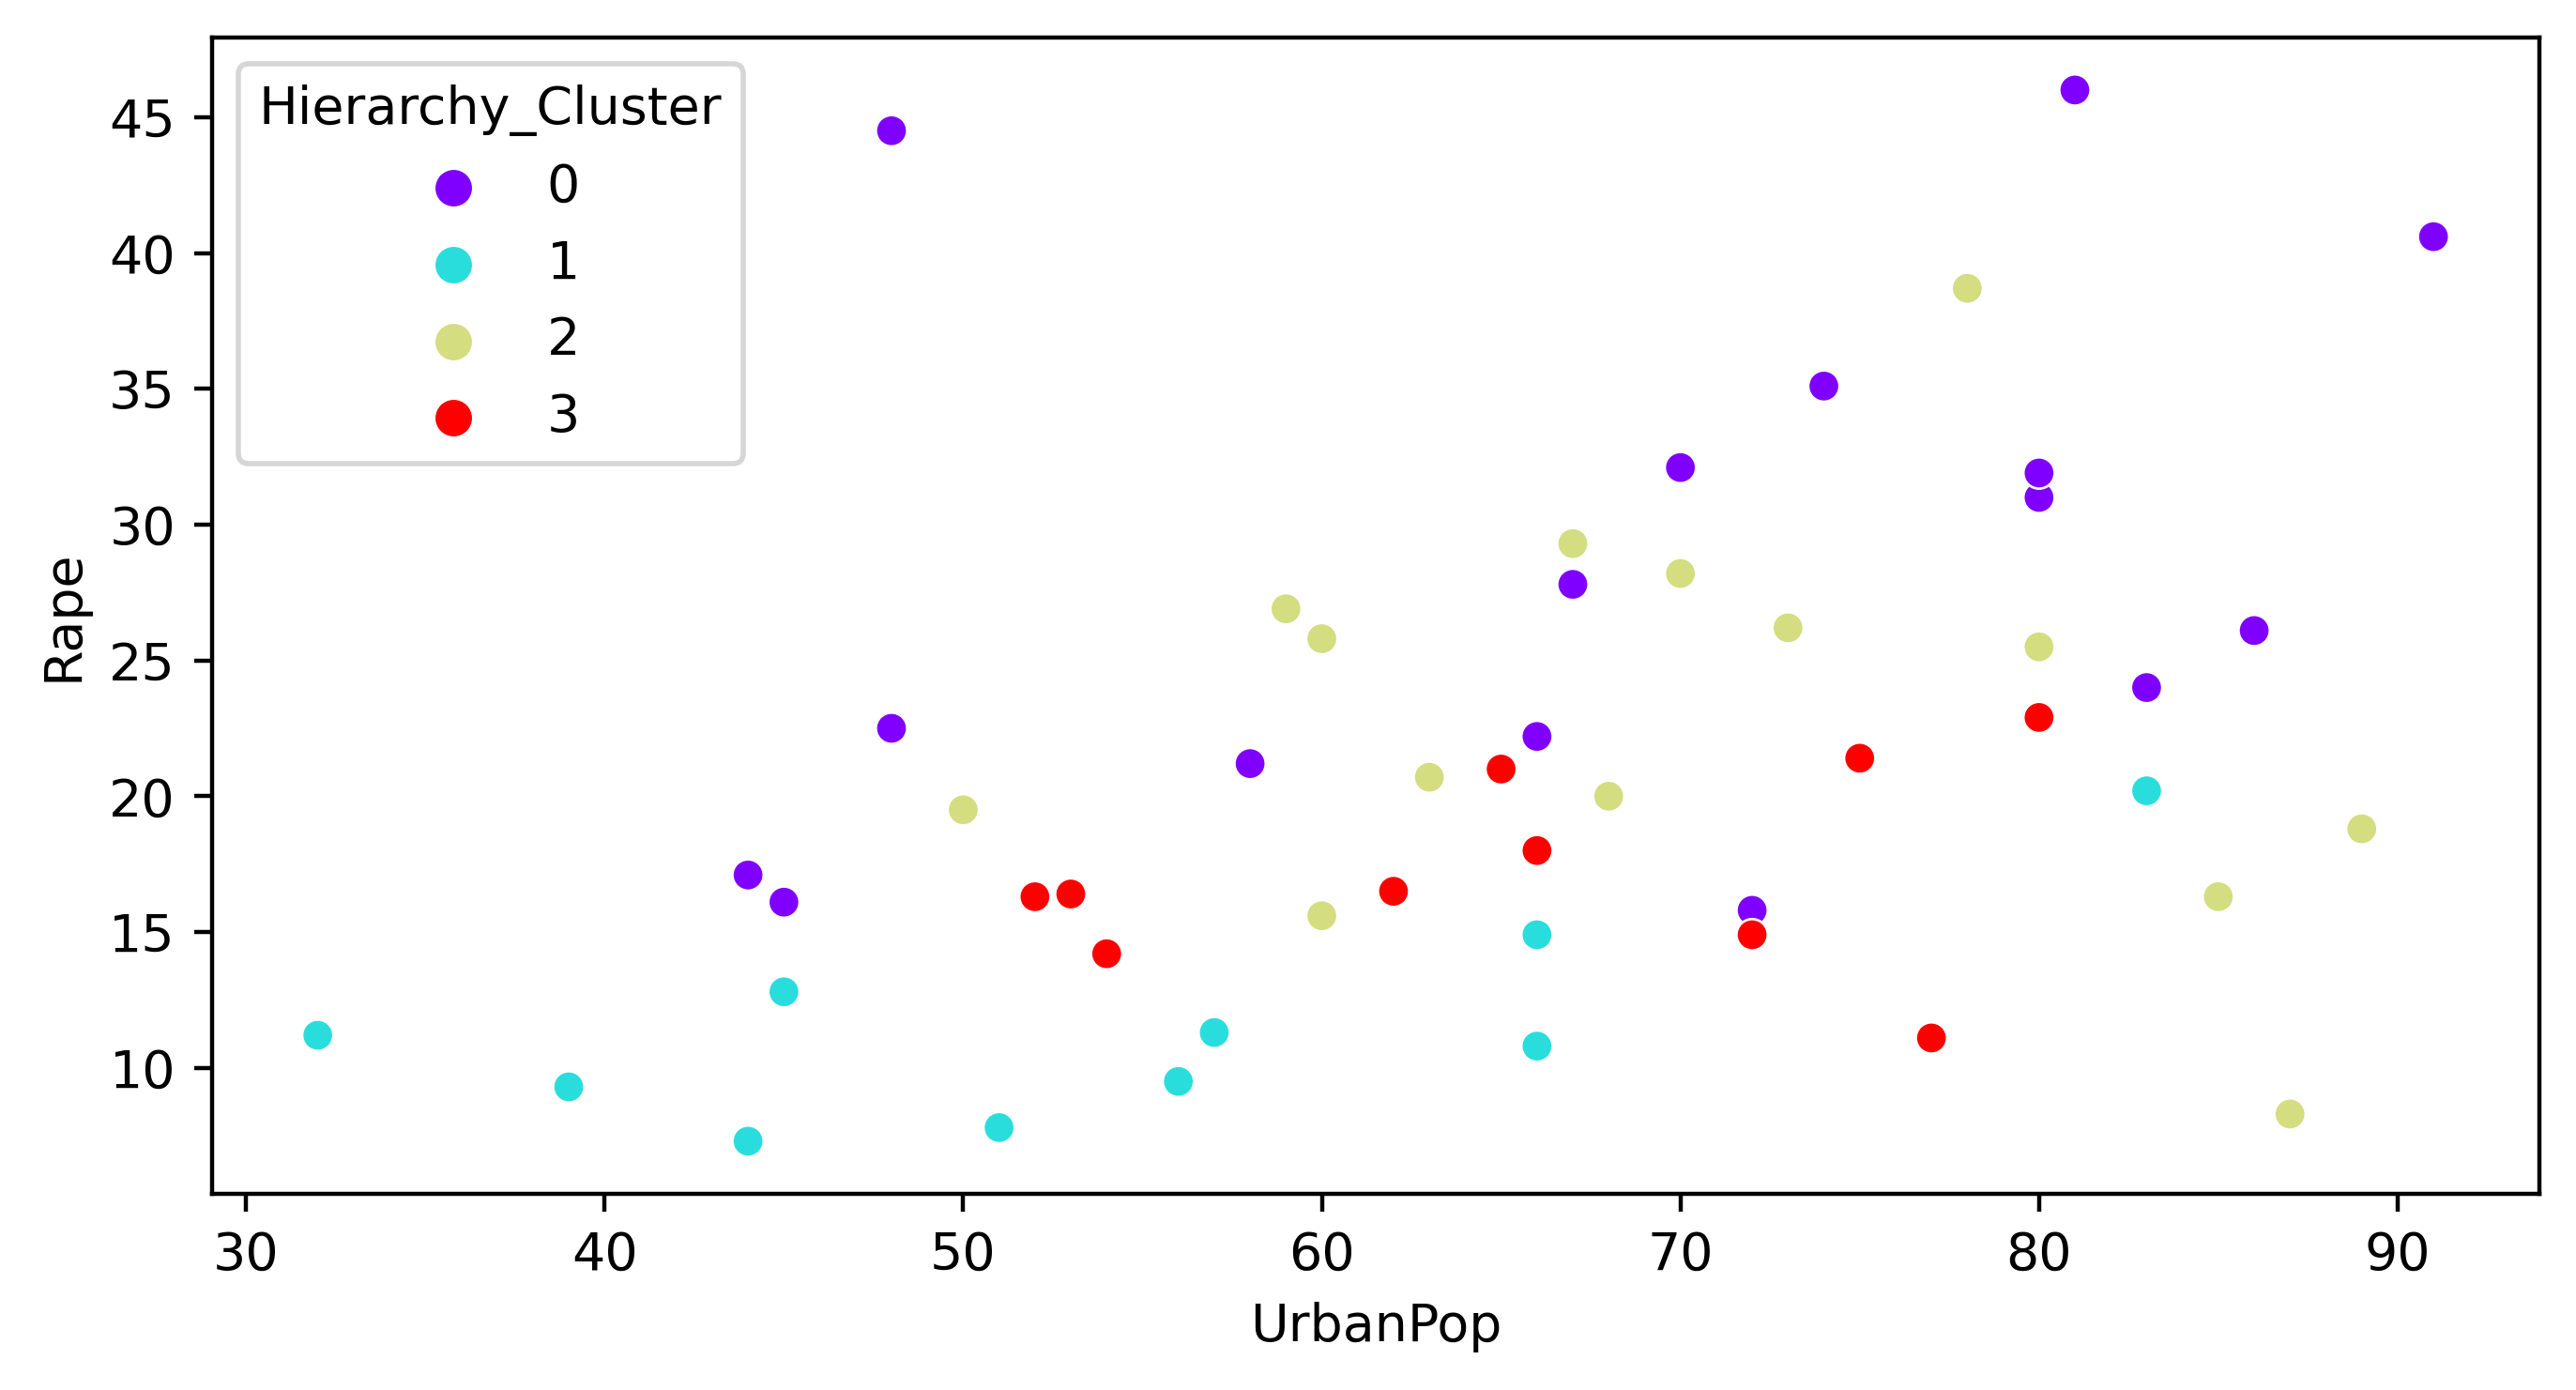

In [33]:
sns.scatterplot(x = raw_df['UrbanPop'], y = raw_df['Rape'], hue = raw_df['Hierarchy_Cluster'], palette = 'rainbow')


<Axes: xlabel='UrbanPop', ylabel='Murder'>

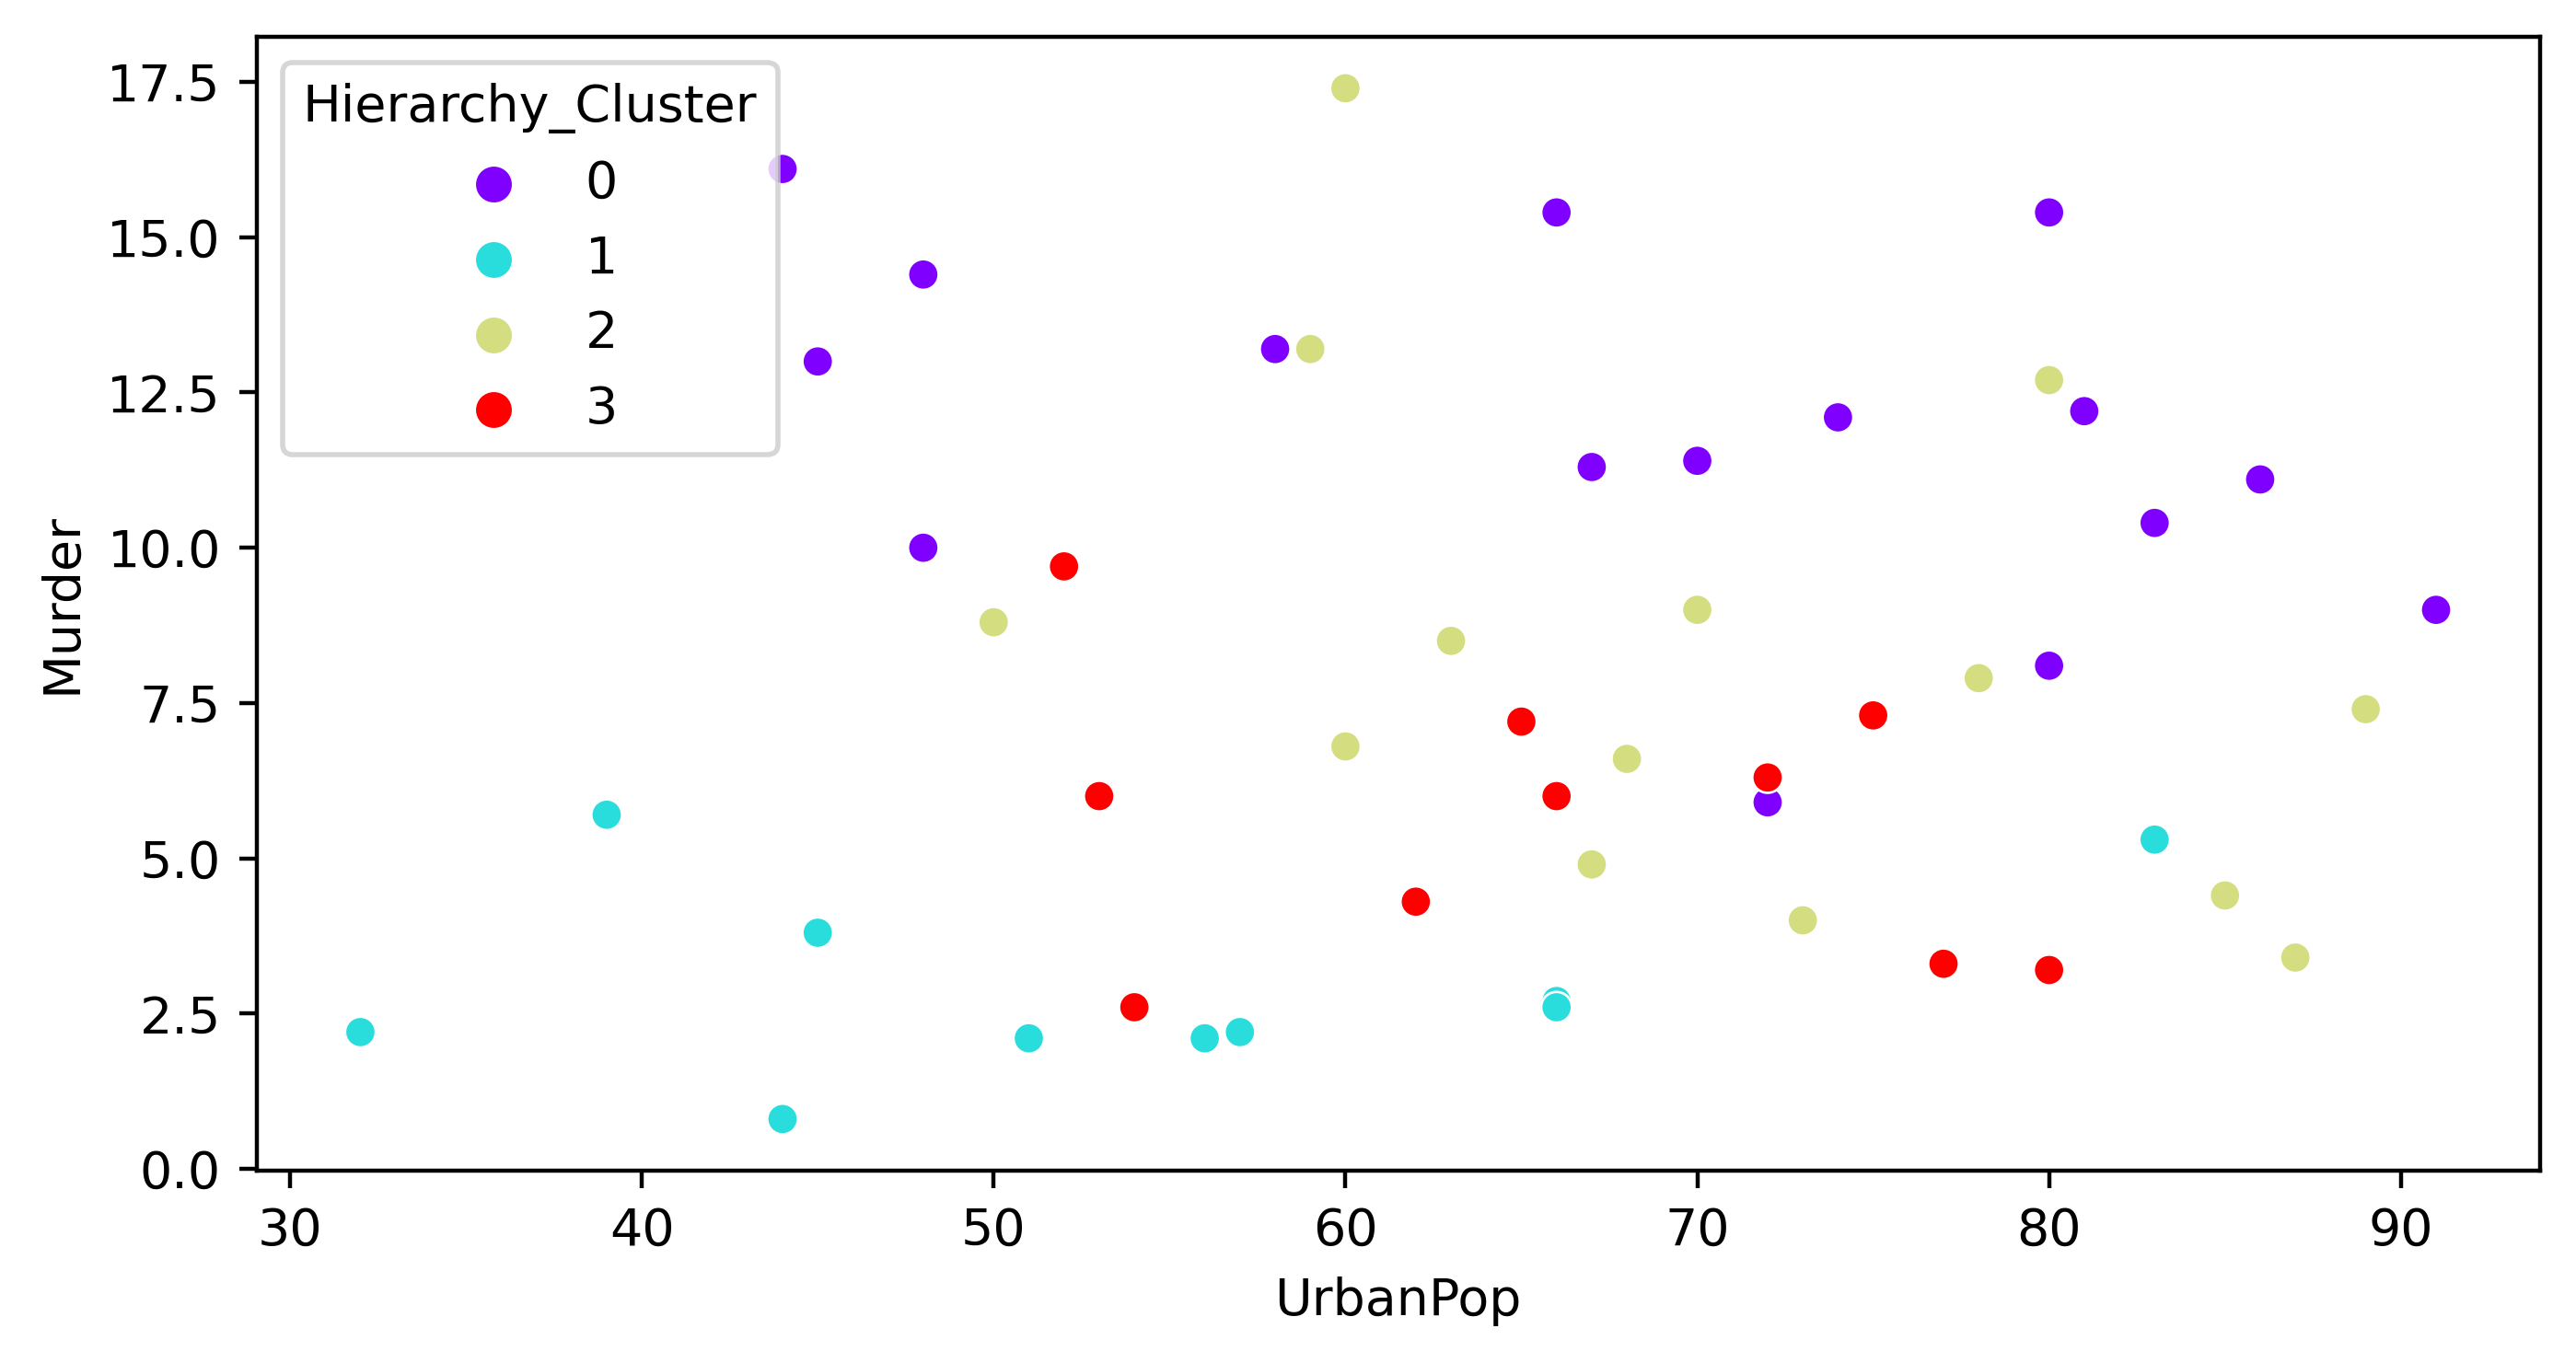

In [34]:
sns.scatterplot(x = raw_df['UrbanPop'], y = raw_df['Murder'], hue = raw_df['Hierarchy_Cluster'], palette = 'rainbow')

<Axes: xlabel='Rape', ylabel='Assault'>

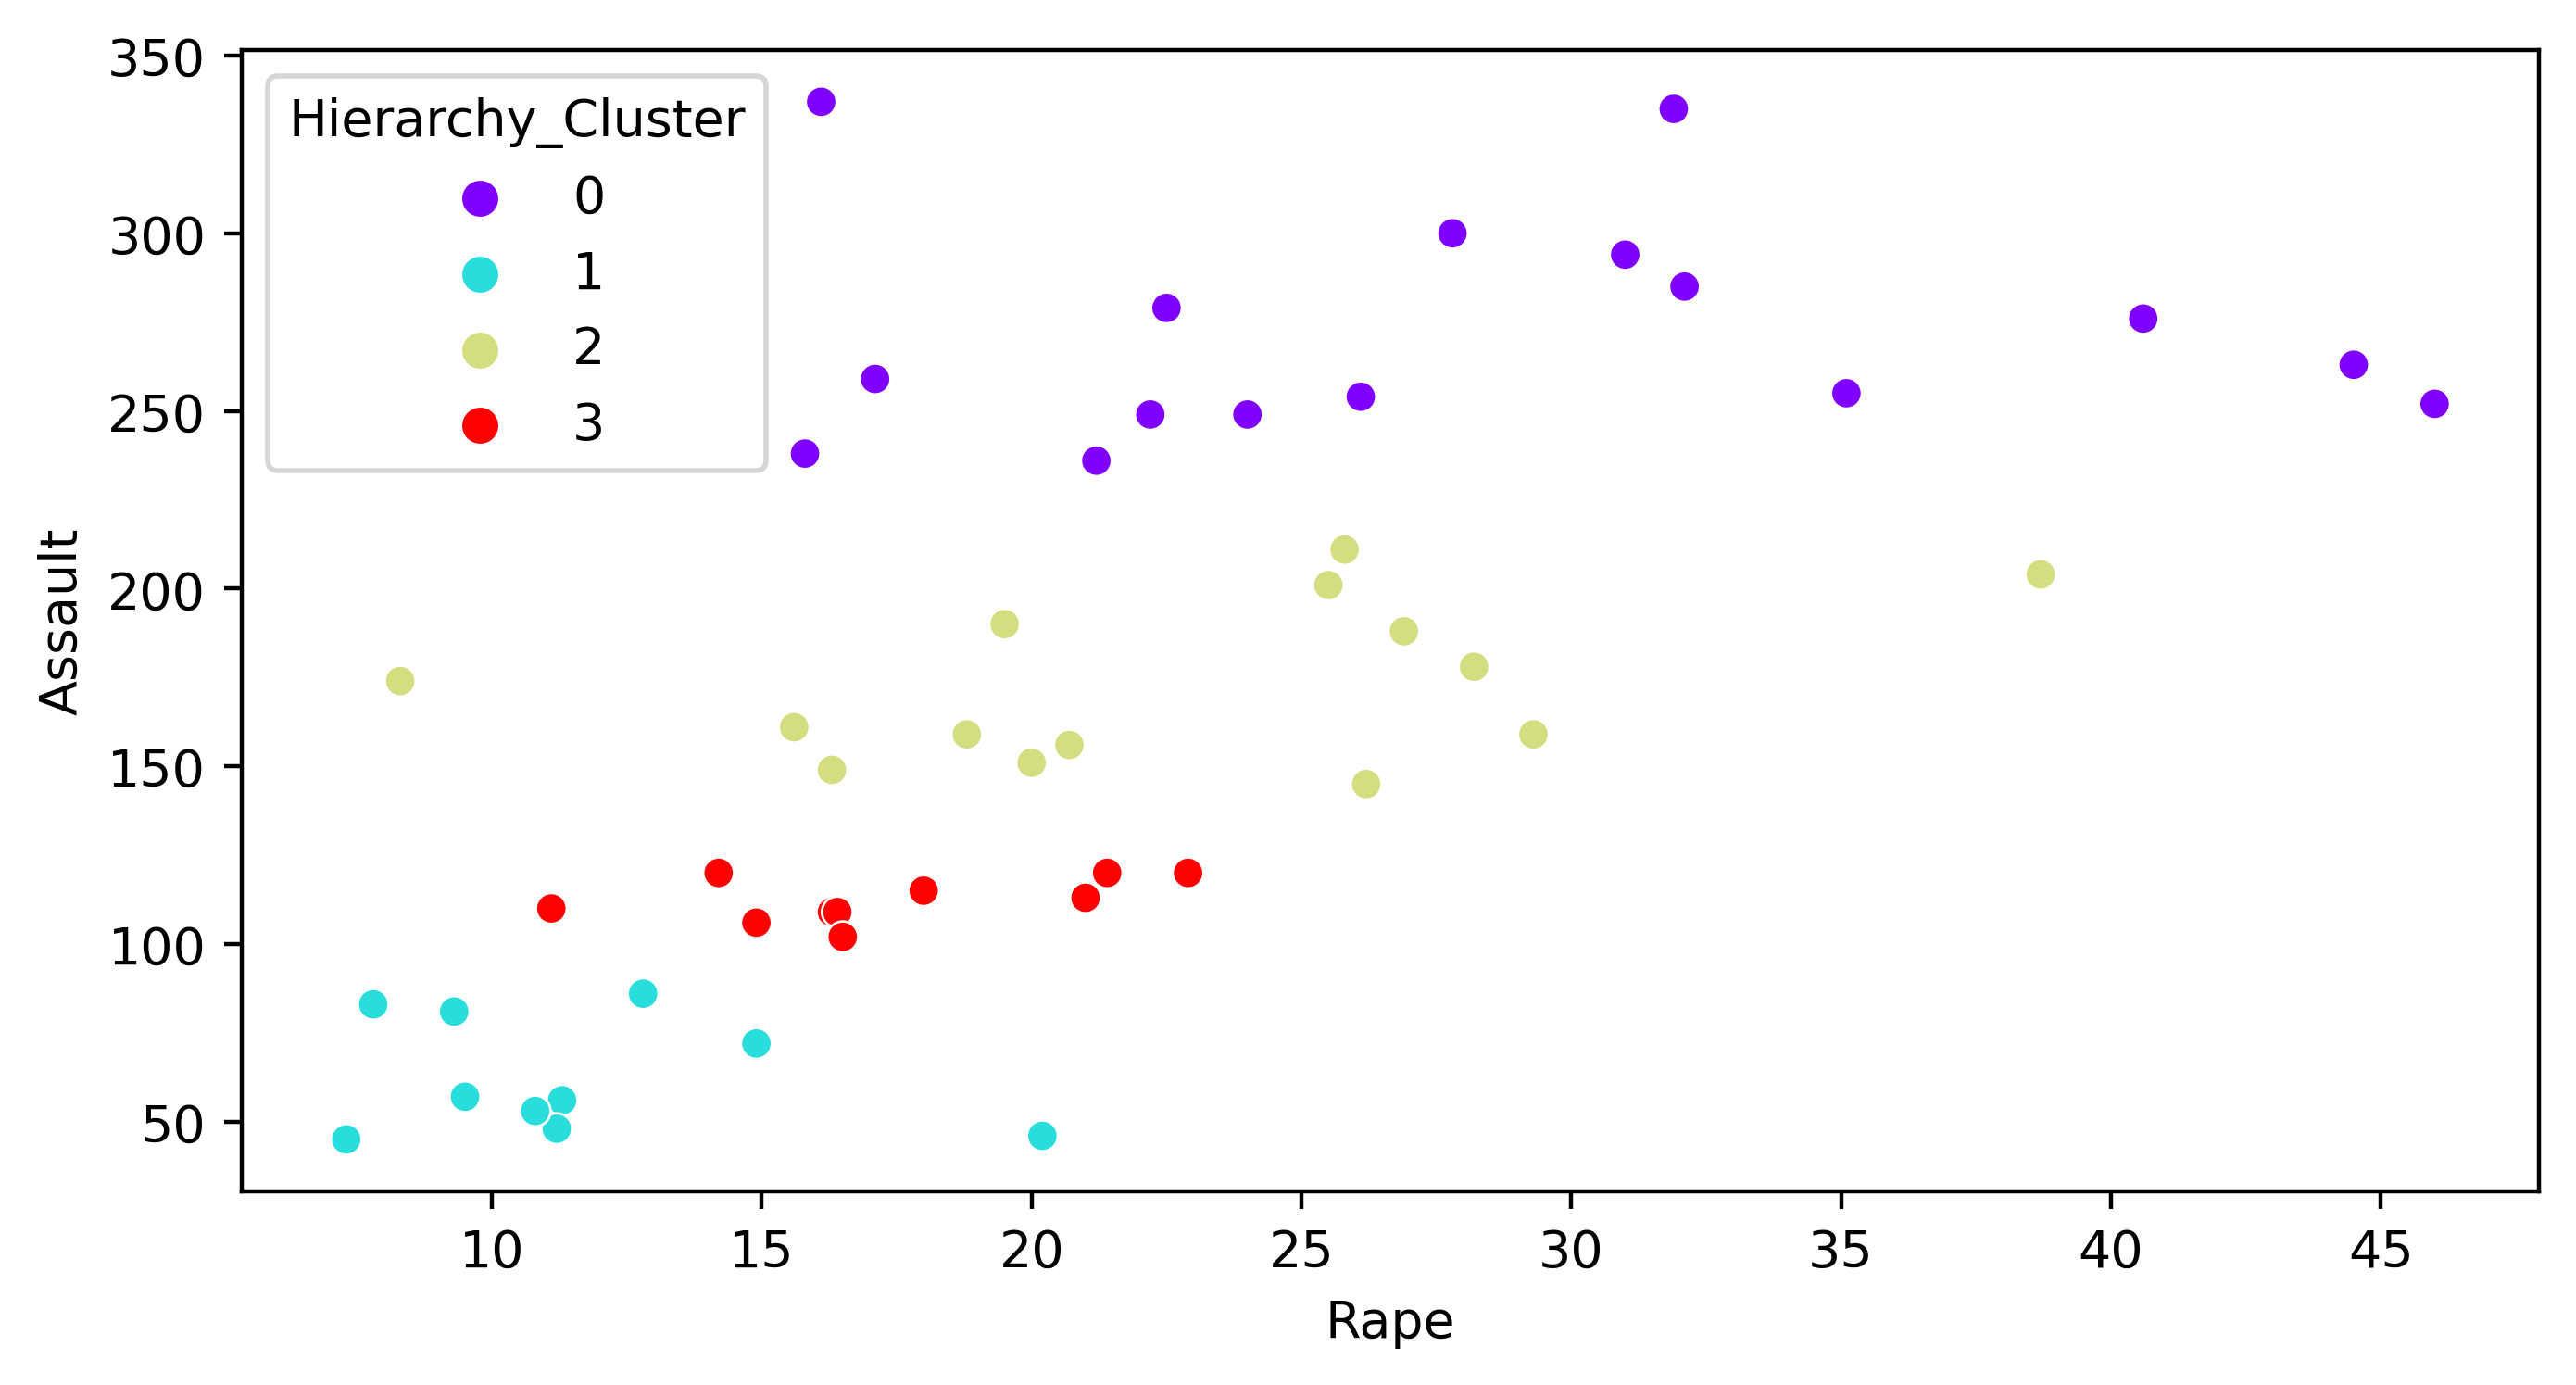

In [35]:
sns.scatterplot(x = raw_df['Rape'], y = raw_df['Assault'], hue = raw_df['Hierarchy_Cluster'], palette = 'rainbow')

In [36]:
#2. K-Means Clustering

In [37]:
# K-Means Model Building

In [38]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([1, 7, 6, 5, 6, 5, 0, 1, 4, 5, 3, 0, 1, 0, 3, 0, 0, 1, 3, 6, 2, 1,
       3, 7, 5, 0, 0, 1, 3, 2, 6, 1, 4, 3, 0, 2, 2, 0, 2, 7, 3, 5, 5, 0,
       3, 2, 2, 3, 3, 2])

In [40]:
# Checking Centroids of clusters

In [41]:
km.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.47142857, 247.57142857,  74.28571429,  27.2       ],
       [  5.75      , 156.75      ,  74.        ,  19.4       ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 14.2       , 336.        ,  62.5       ,  24.        ],
       [ 11.5       , 195.33333333,  66.16666667,  27.43333333],
       [  9.95      , 288.75      ,  77.        ,  32.875     ],
       [ 13.5       , 267.        ,  46.66666667,  28.03333333]])

In [42]:
# Visualizing CLusters with their centroids

In [43]:
raw_df.head()

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


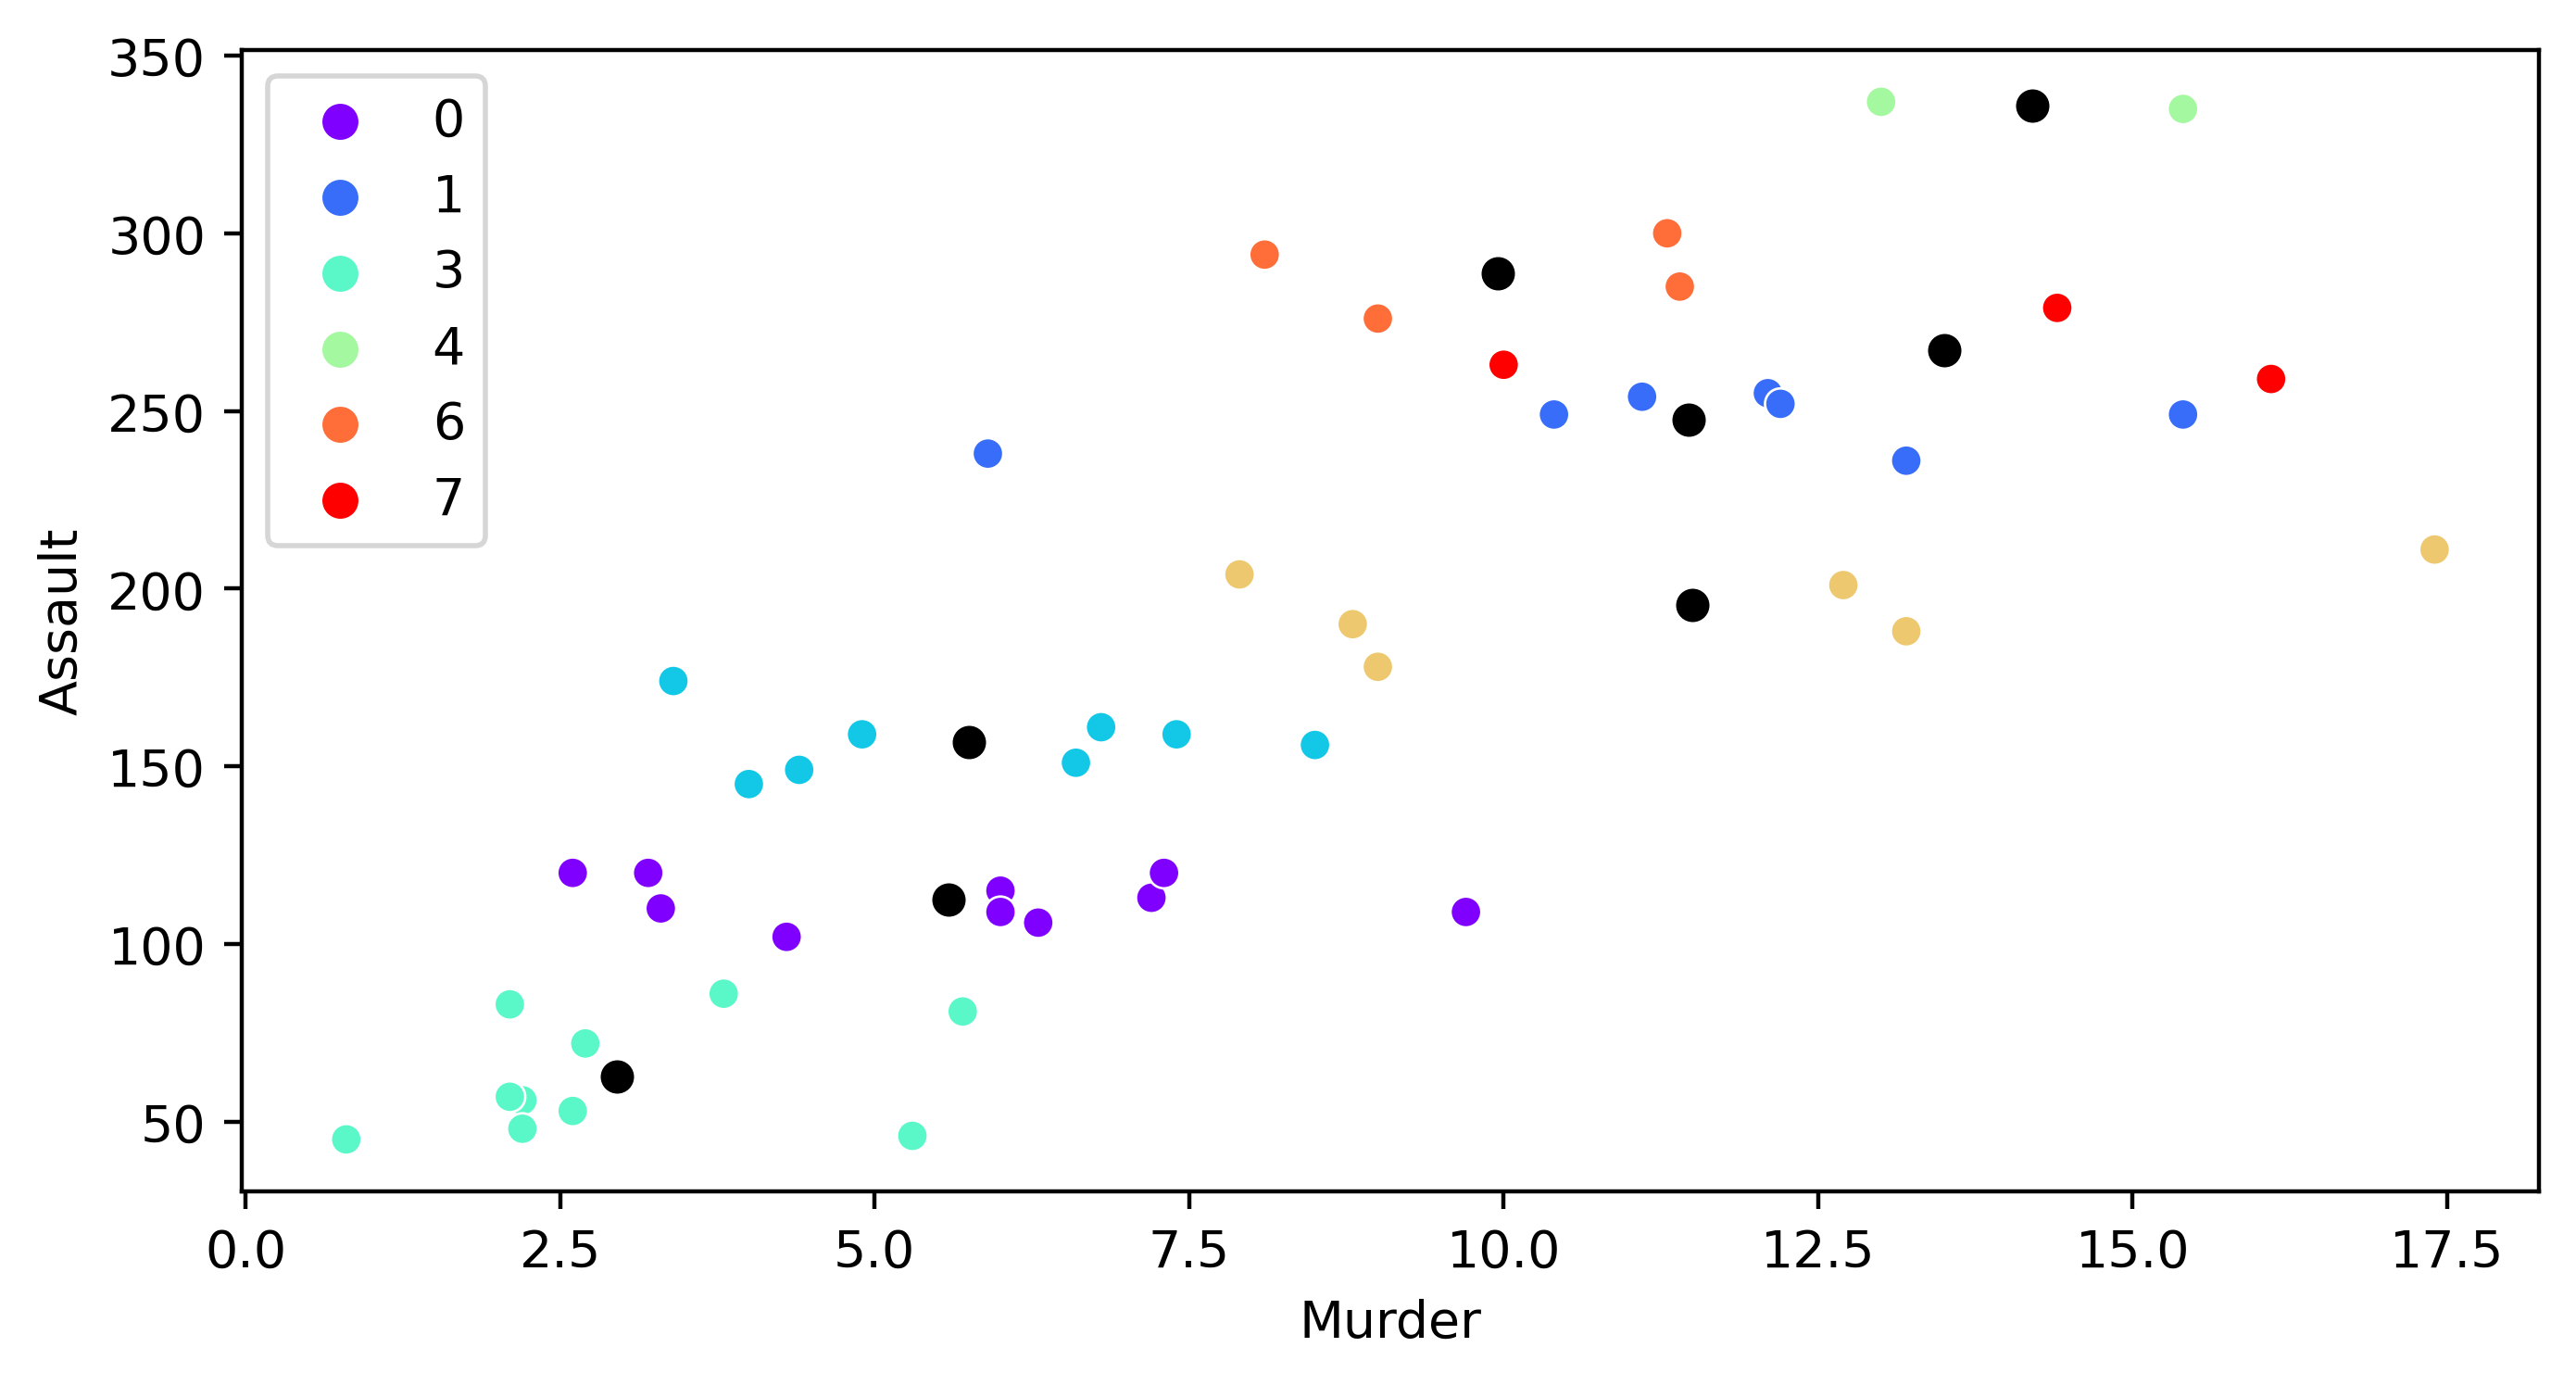

In [44]:
sns.scatterplot(x = raw_df['Murder'], y = raw_df['Assault'], hue = yp, palette = 'rainbow')
plt.legend(loc='upper left')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='black', s=50)

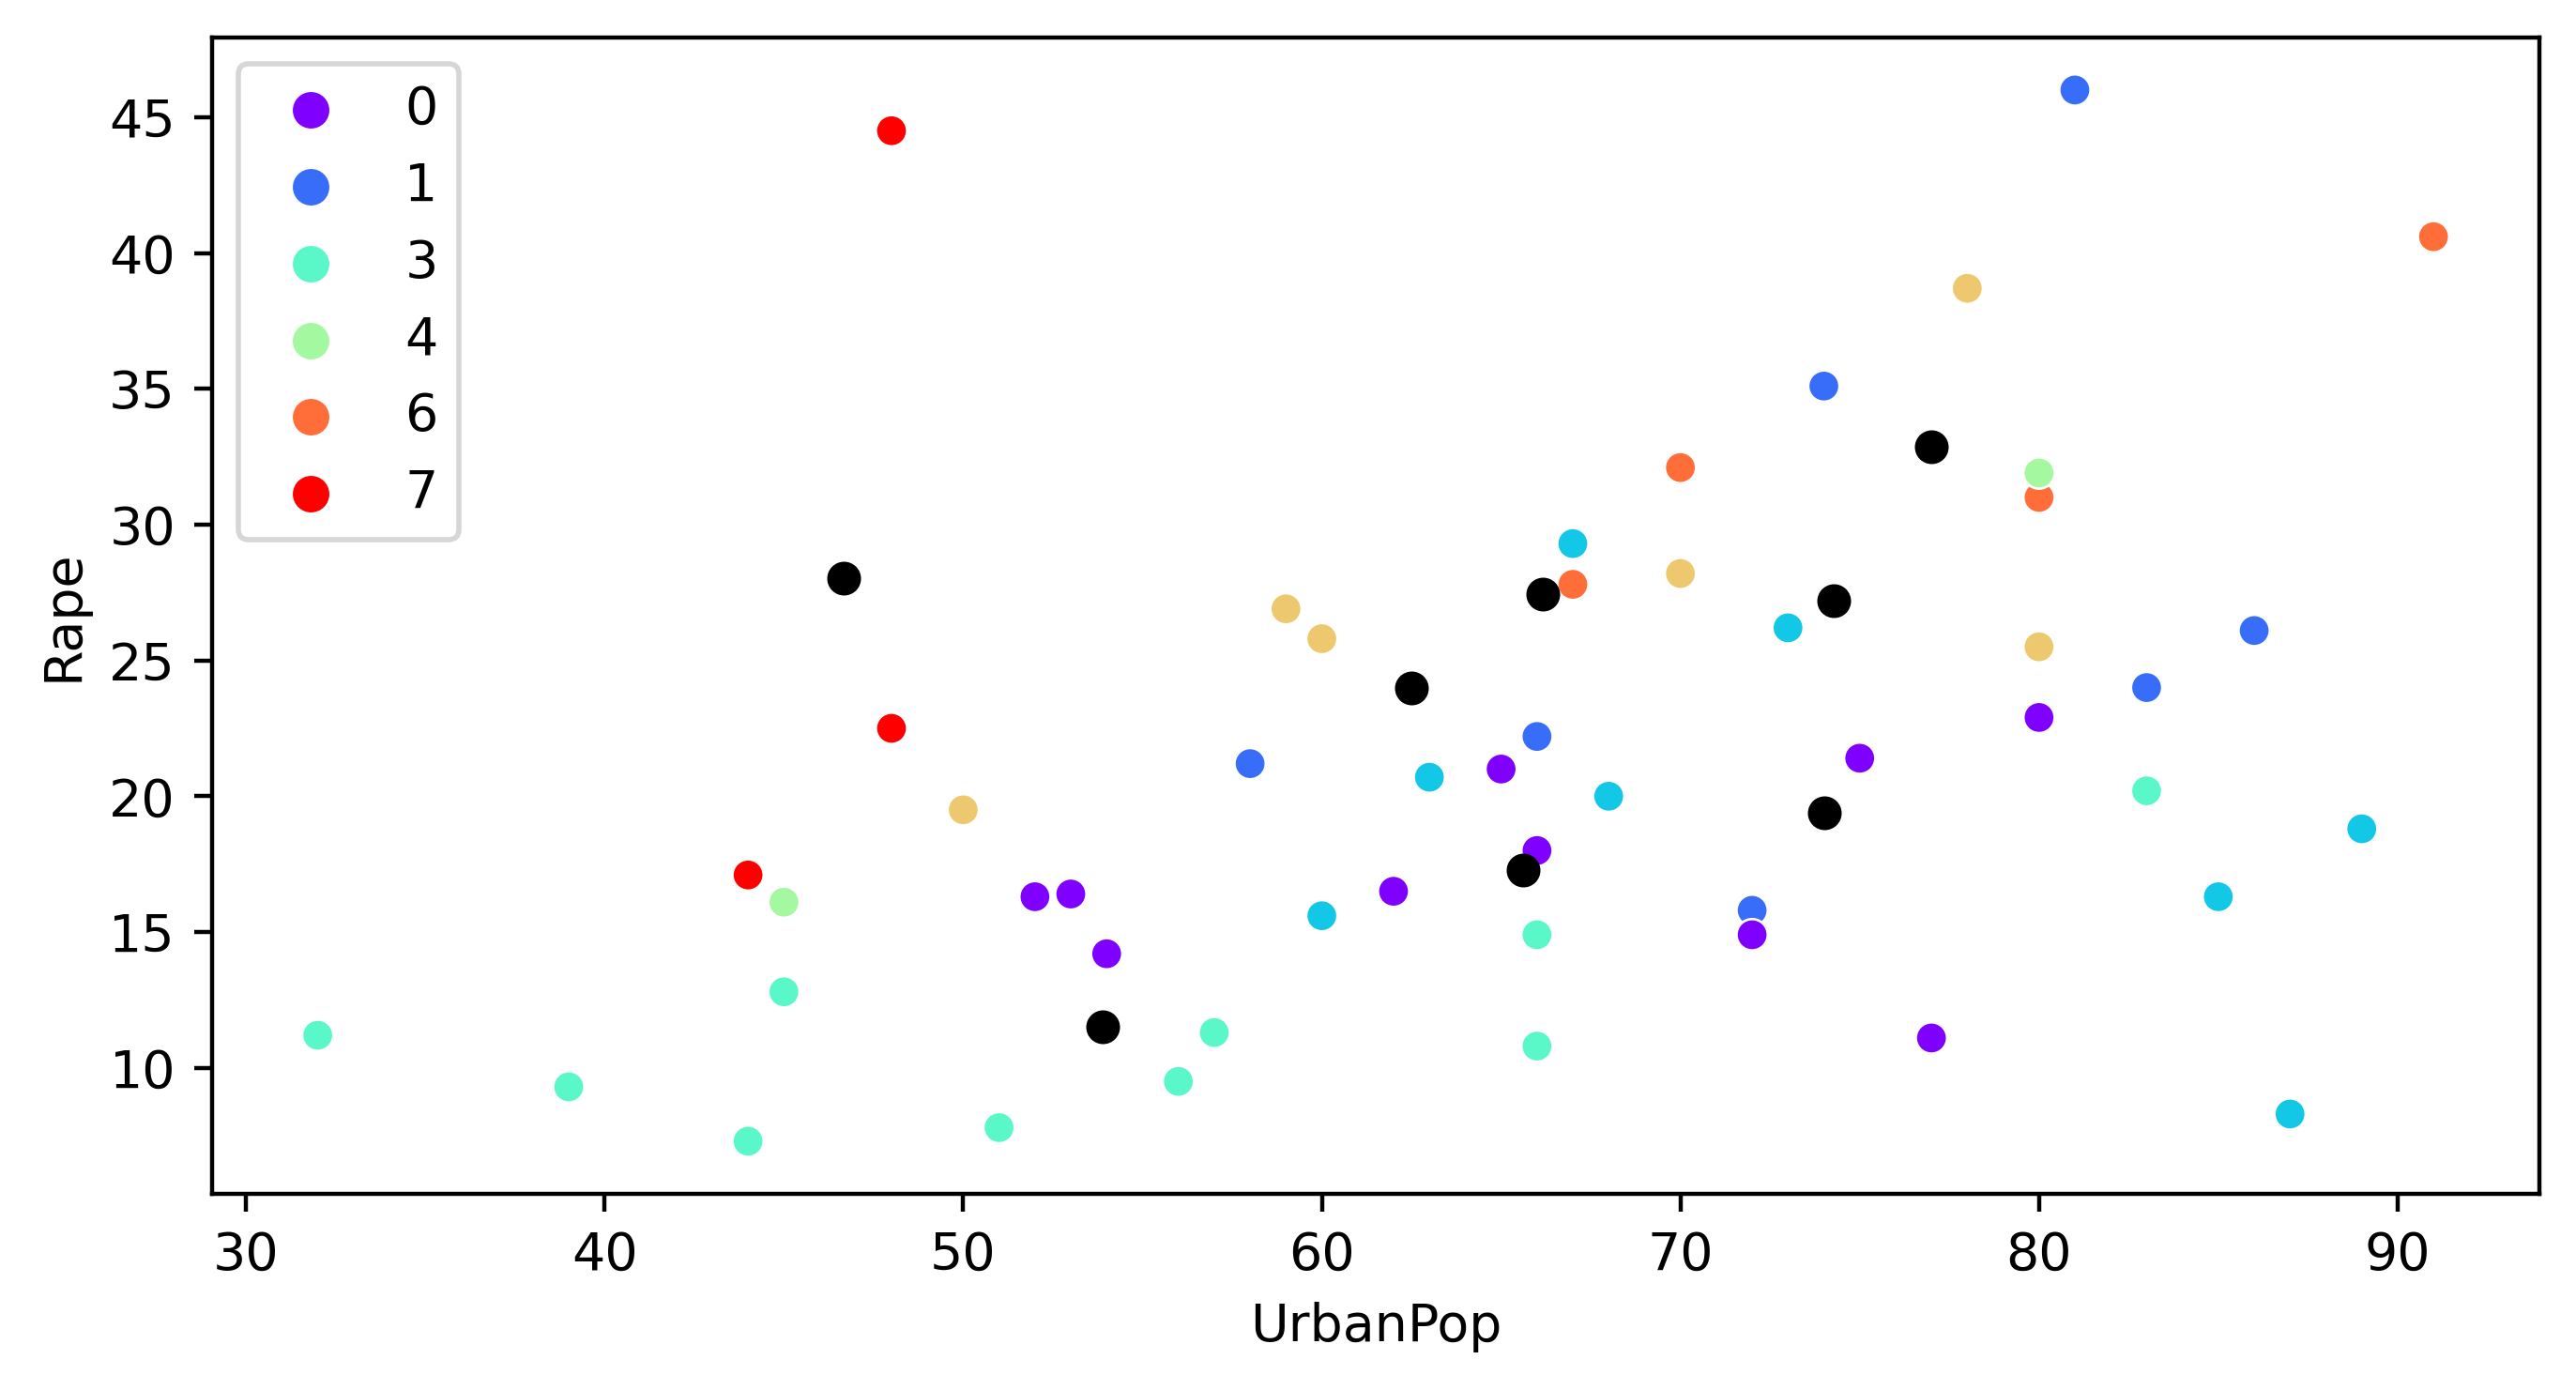

In [45]:
sns.scatterplot(x = raw_df['UrbanPop'], y = raw_df['Rape'], hue = yp, palette = 'rainbow')
plt.legend(loc='upper left')
plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3], c='black', s=30)

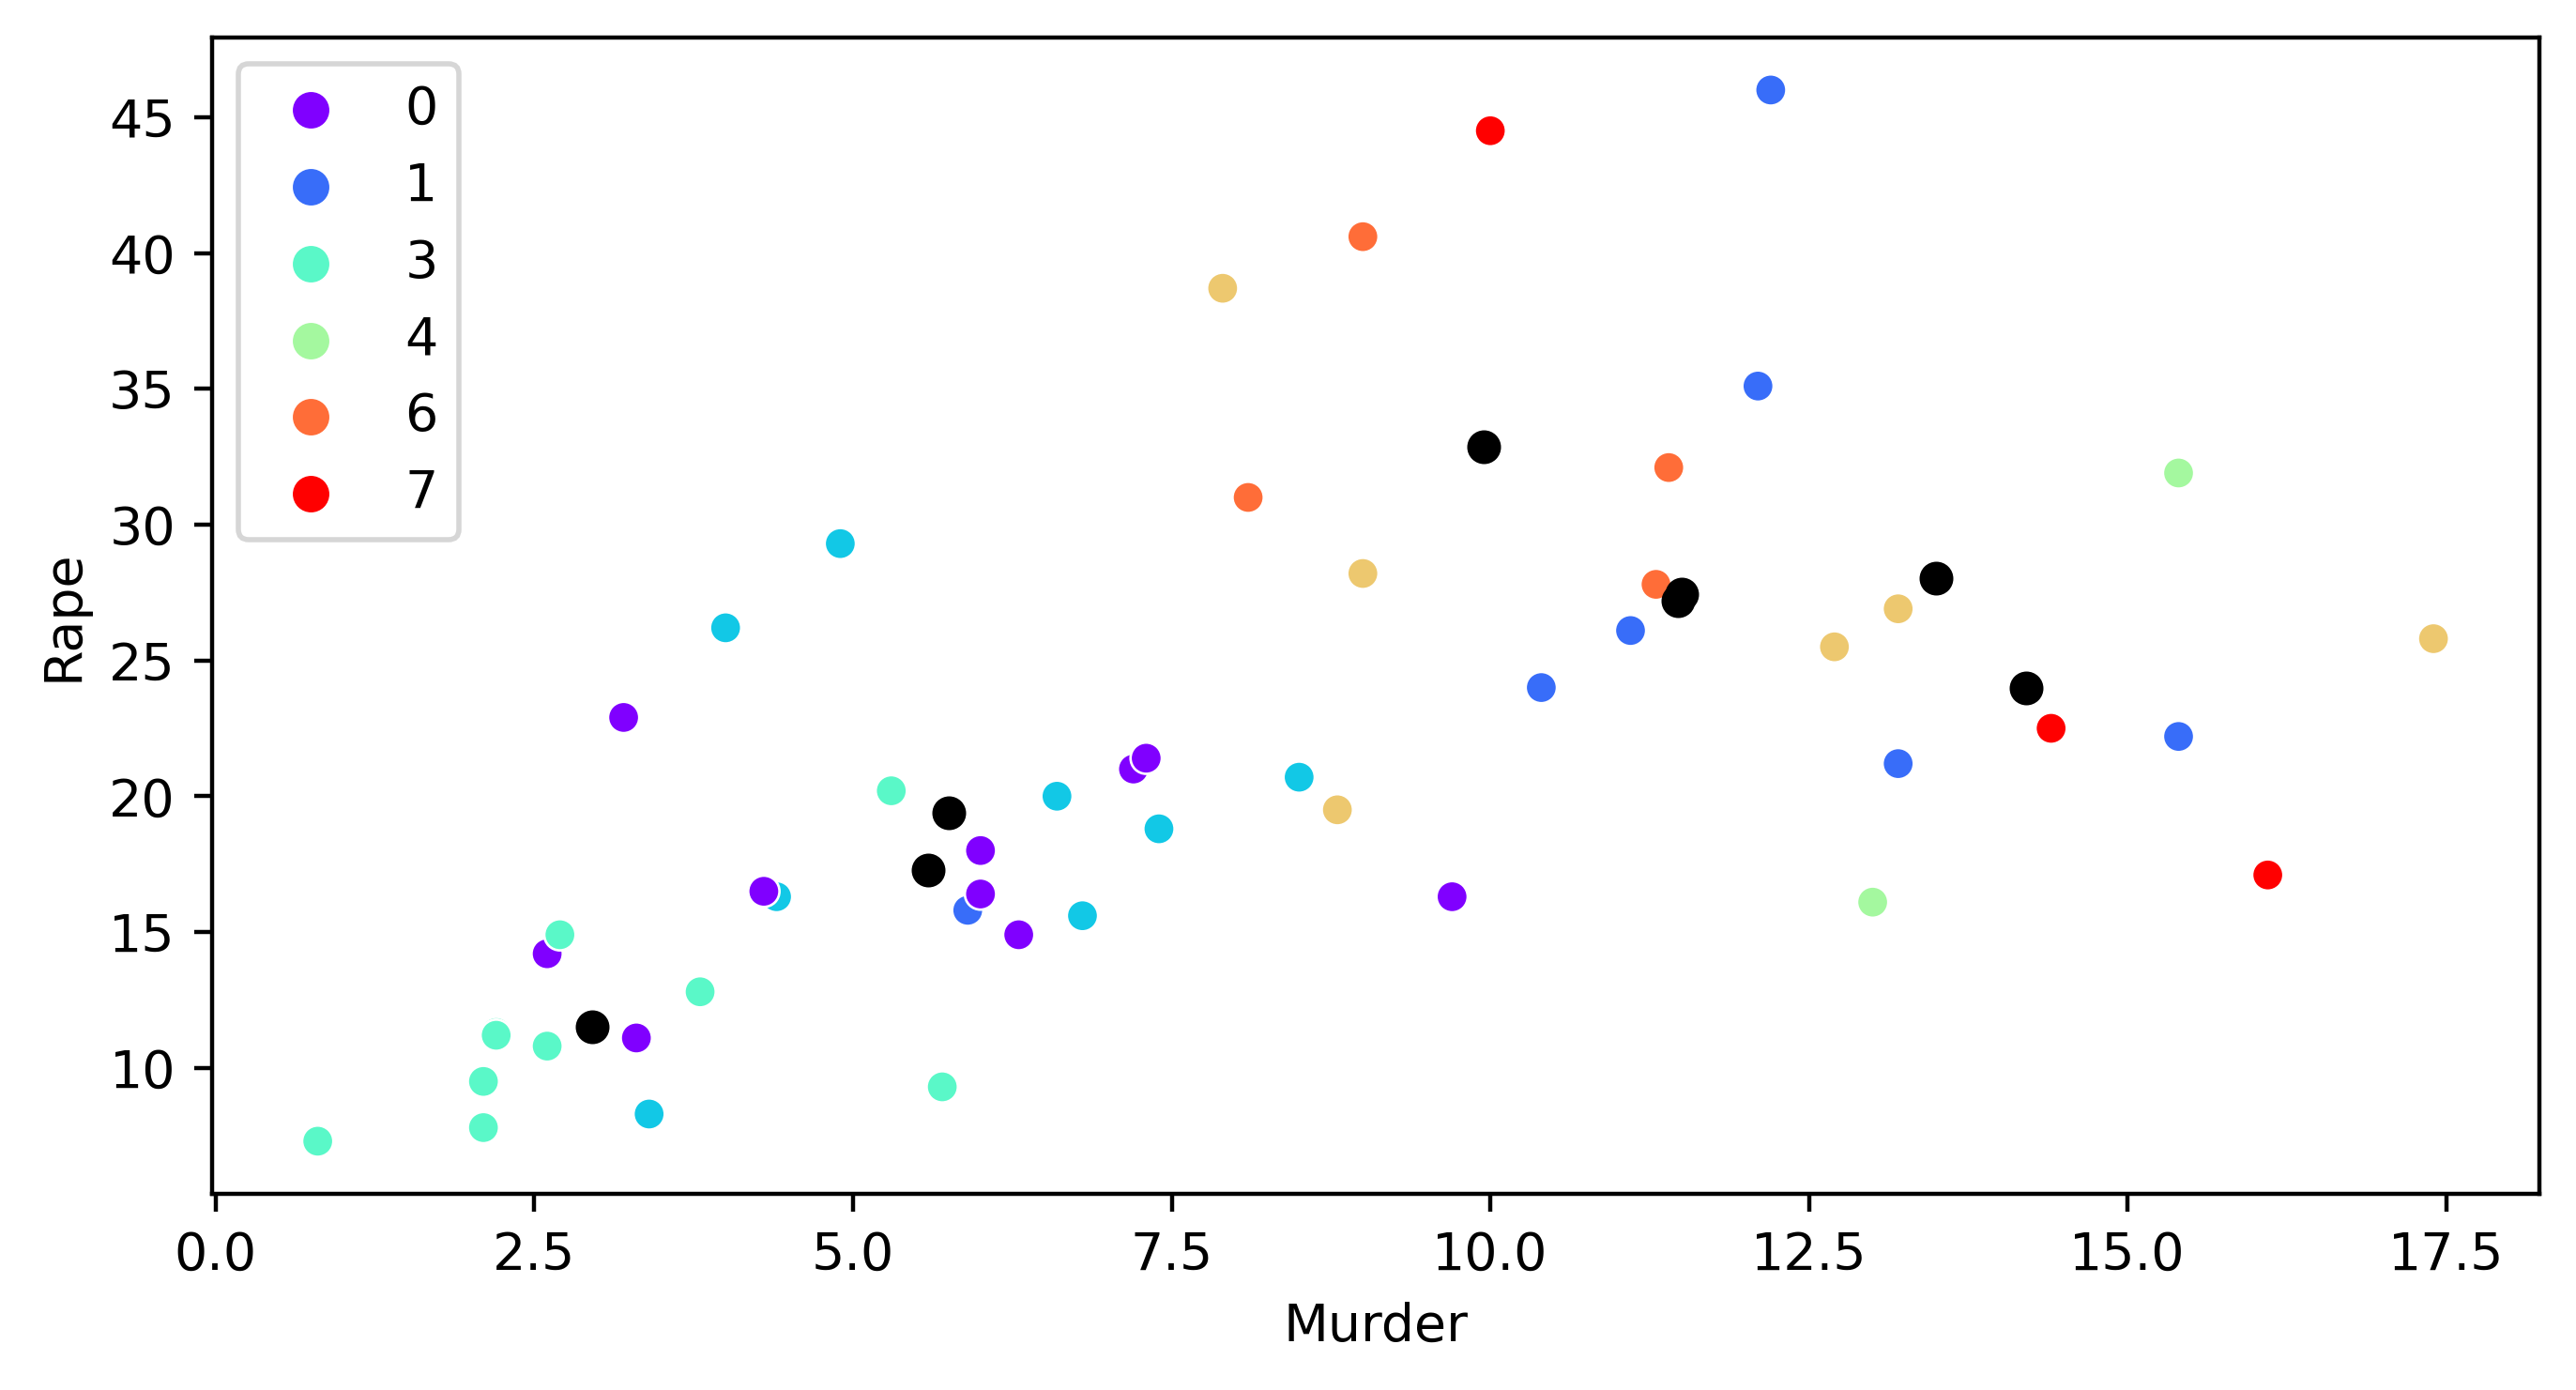

In [46]:
sns.scatterplot(x = raw_df['Murder'], y = raw_df['Rape'], hue = yp, palette = 'rainbow')
plt.legend(loc='upper left')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,3], c='black', s=30)

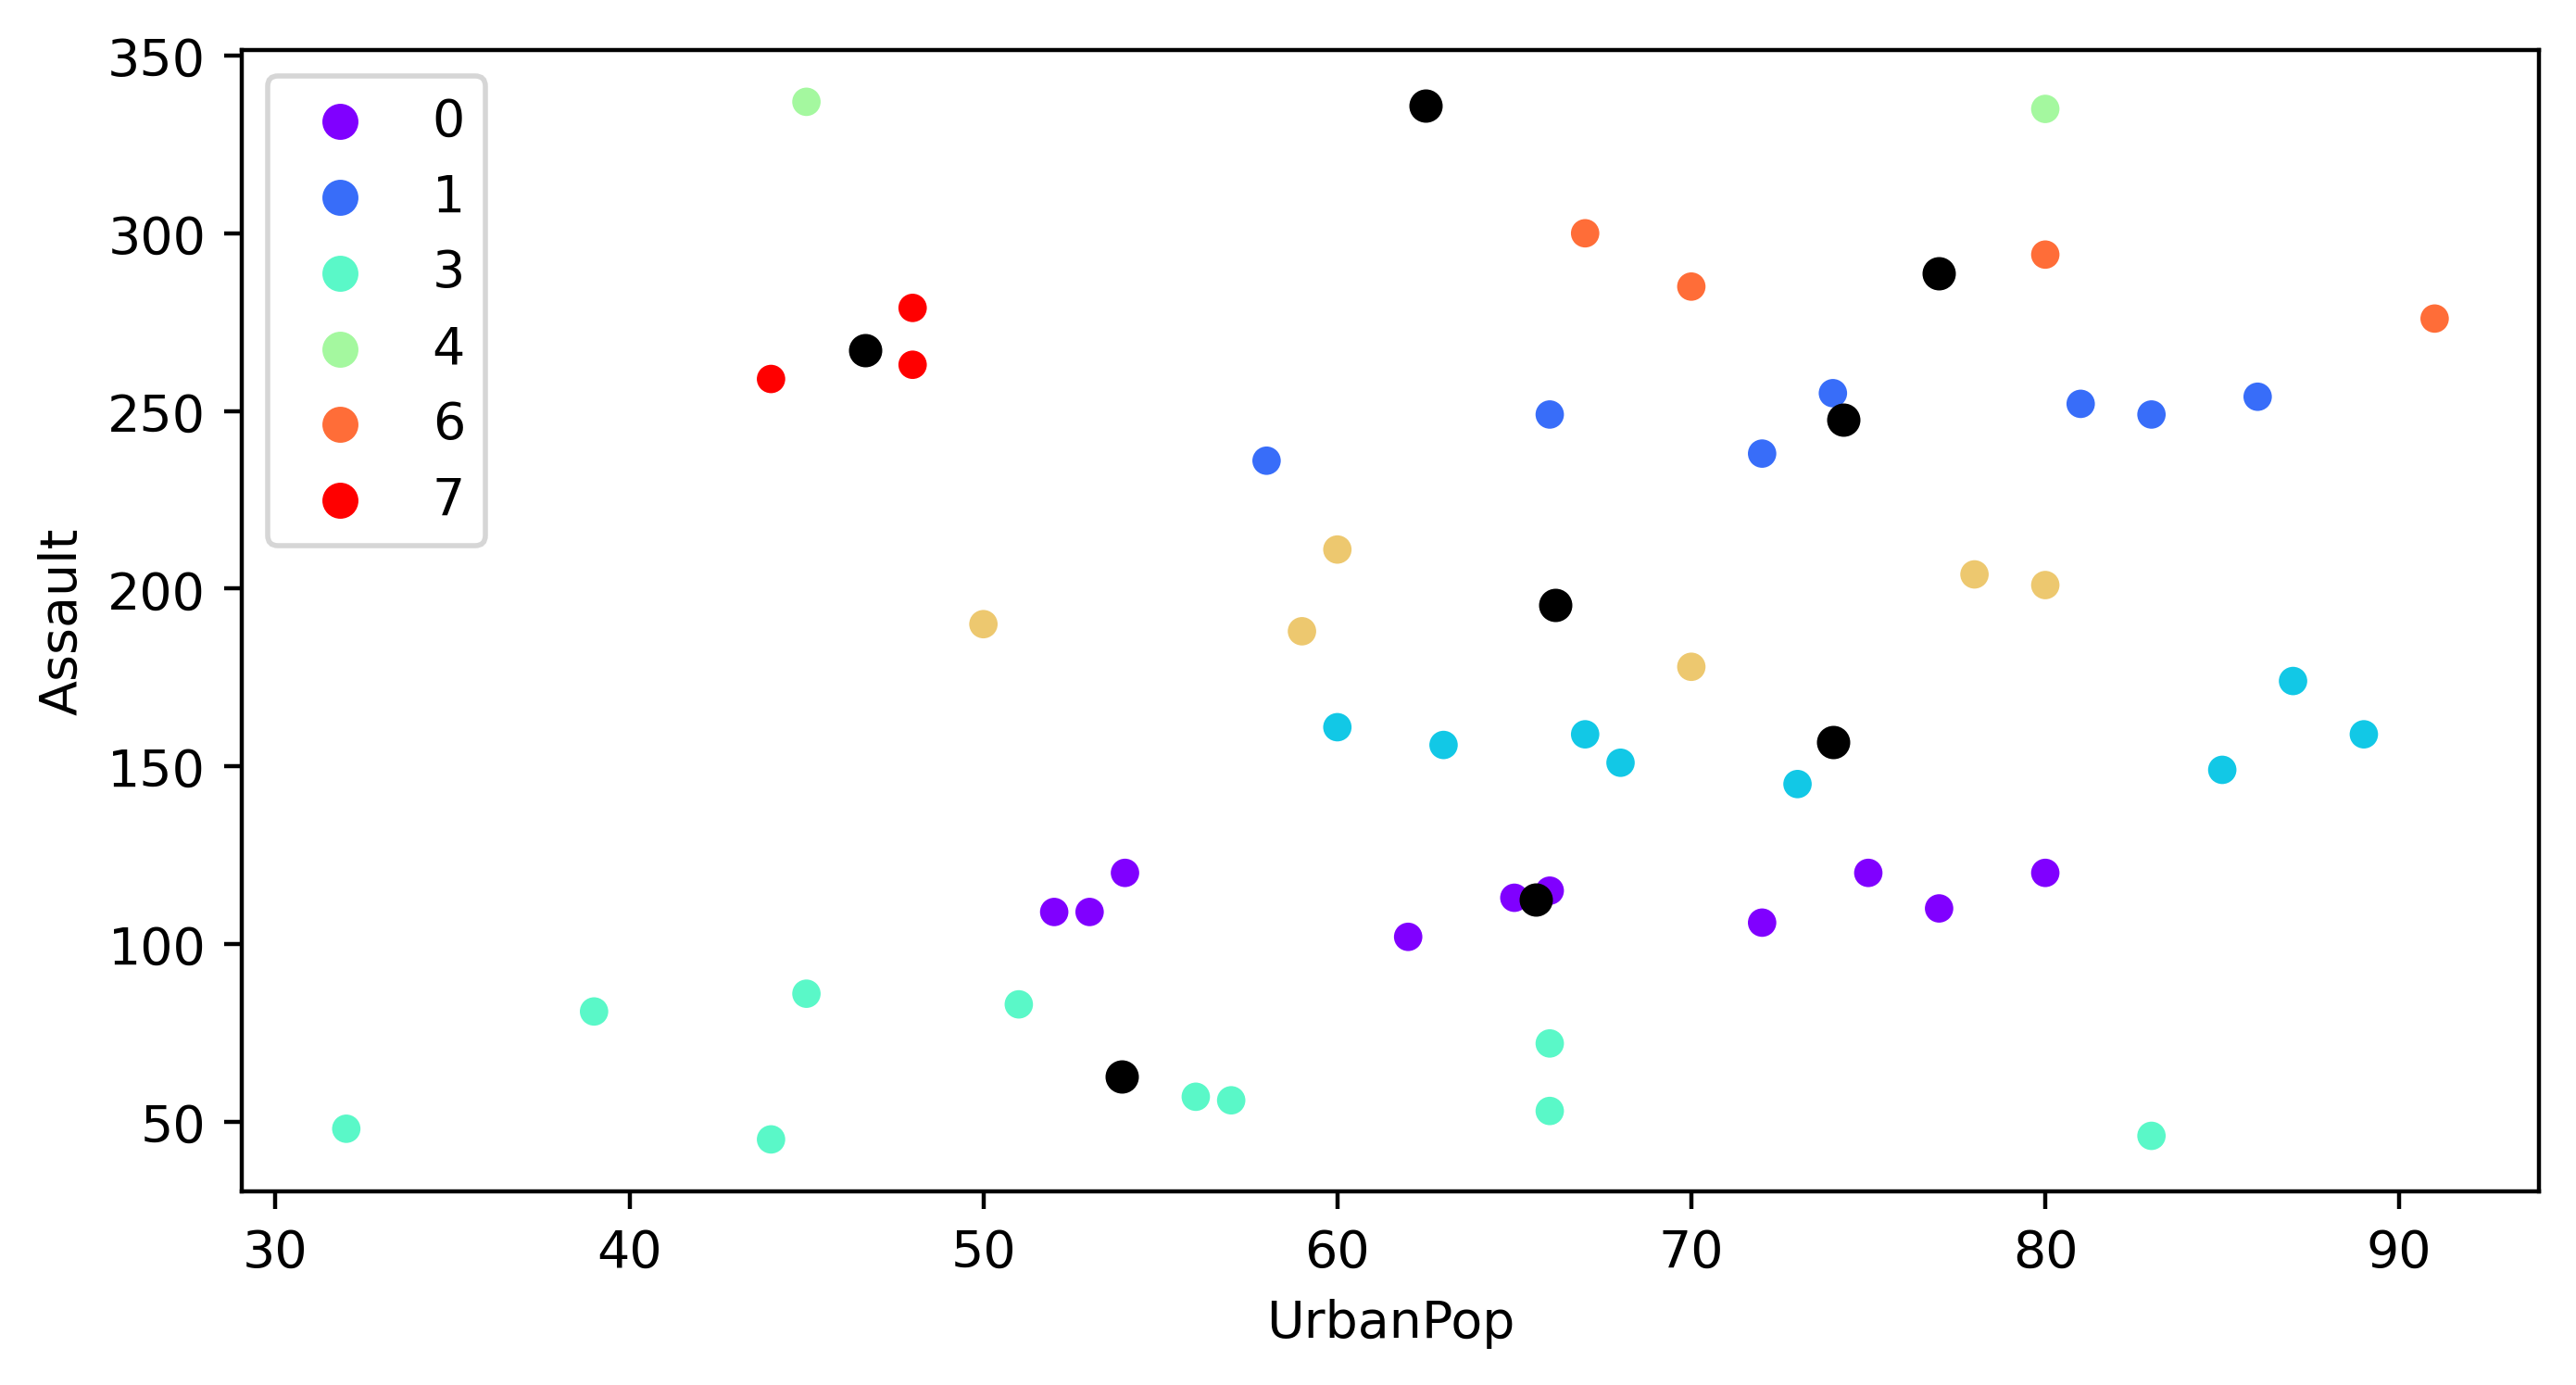

In [47]:
sns.scatterplot(x = raw_df['UrbanPop'], y = raw_df['Assault'], hue = yp, palette = 'rainbow')
plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,1], c='black', s=30)

In [48]:
# Looking towards all the scatterplots we can conclude that 8 is not ideal no. of clusters to be made

In [49]:
# Plotting Elbow Graph to know ideal no. of clusters to be made with proper centroid locations

In [50]:
raw_df.shape

(50, 6)

In [51]:
len(x)

50

In [53]:
wcss = []
for i in range(1,50):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [54]:
wcss

[355807.8216,
 96399.02814449919,
 47964.26535714285,
 34728.629357142854,
 24417.02352380952,
 18850.365333333335,
 15463.473777777777,
 13329.361976190476,
 11151.505119047617,
 10250.311785714284,
 9076.759476190477,
 8081.980333333333,
 7235.392333333333,
 6622.75011904762,
 6015.264999999999,
 5270.0711666666675,
 4543.834166666667,
 4411.824,
 3965.6199999999994,
 3298.4541666666673,
 3143.8481666666667,
 2765.3695,
 2473.636166666667,
 2220.7986666666666,
 2060.6646666666666,
 1795.9433333333334,
 1667.0739999999996,
 1500.0866666666666,
 1333.9633333333331,
 1232.2583333333334,
 1108.1766666666667,
 985.8933333333333,
 883.49,
 821.595,
 733.015,
 582.435,
 555.4499999999999,
 458.215,
 346.5899999999999,
 278.015,
 212.39000000000001,
 154.89,
 118.445,
 86.225,
 59.175,
 37.144999999999996,
 17.694999999999997,
 9.974999999999998,
 2.625000000000001]

In [55]:
# Elbow Plot

Text(0.5, 1.0, 'Elbow Graph')

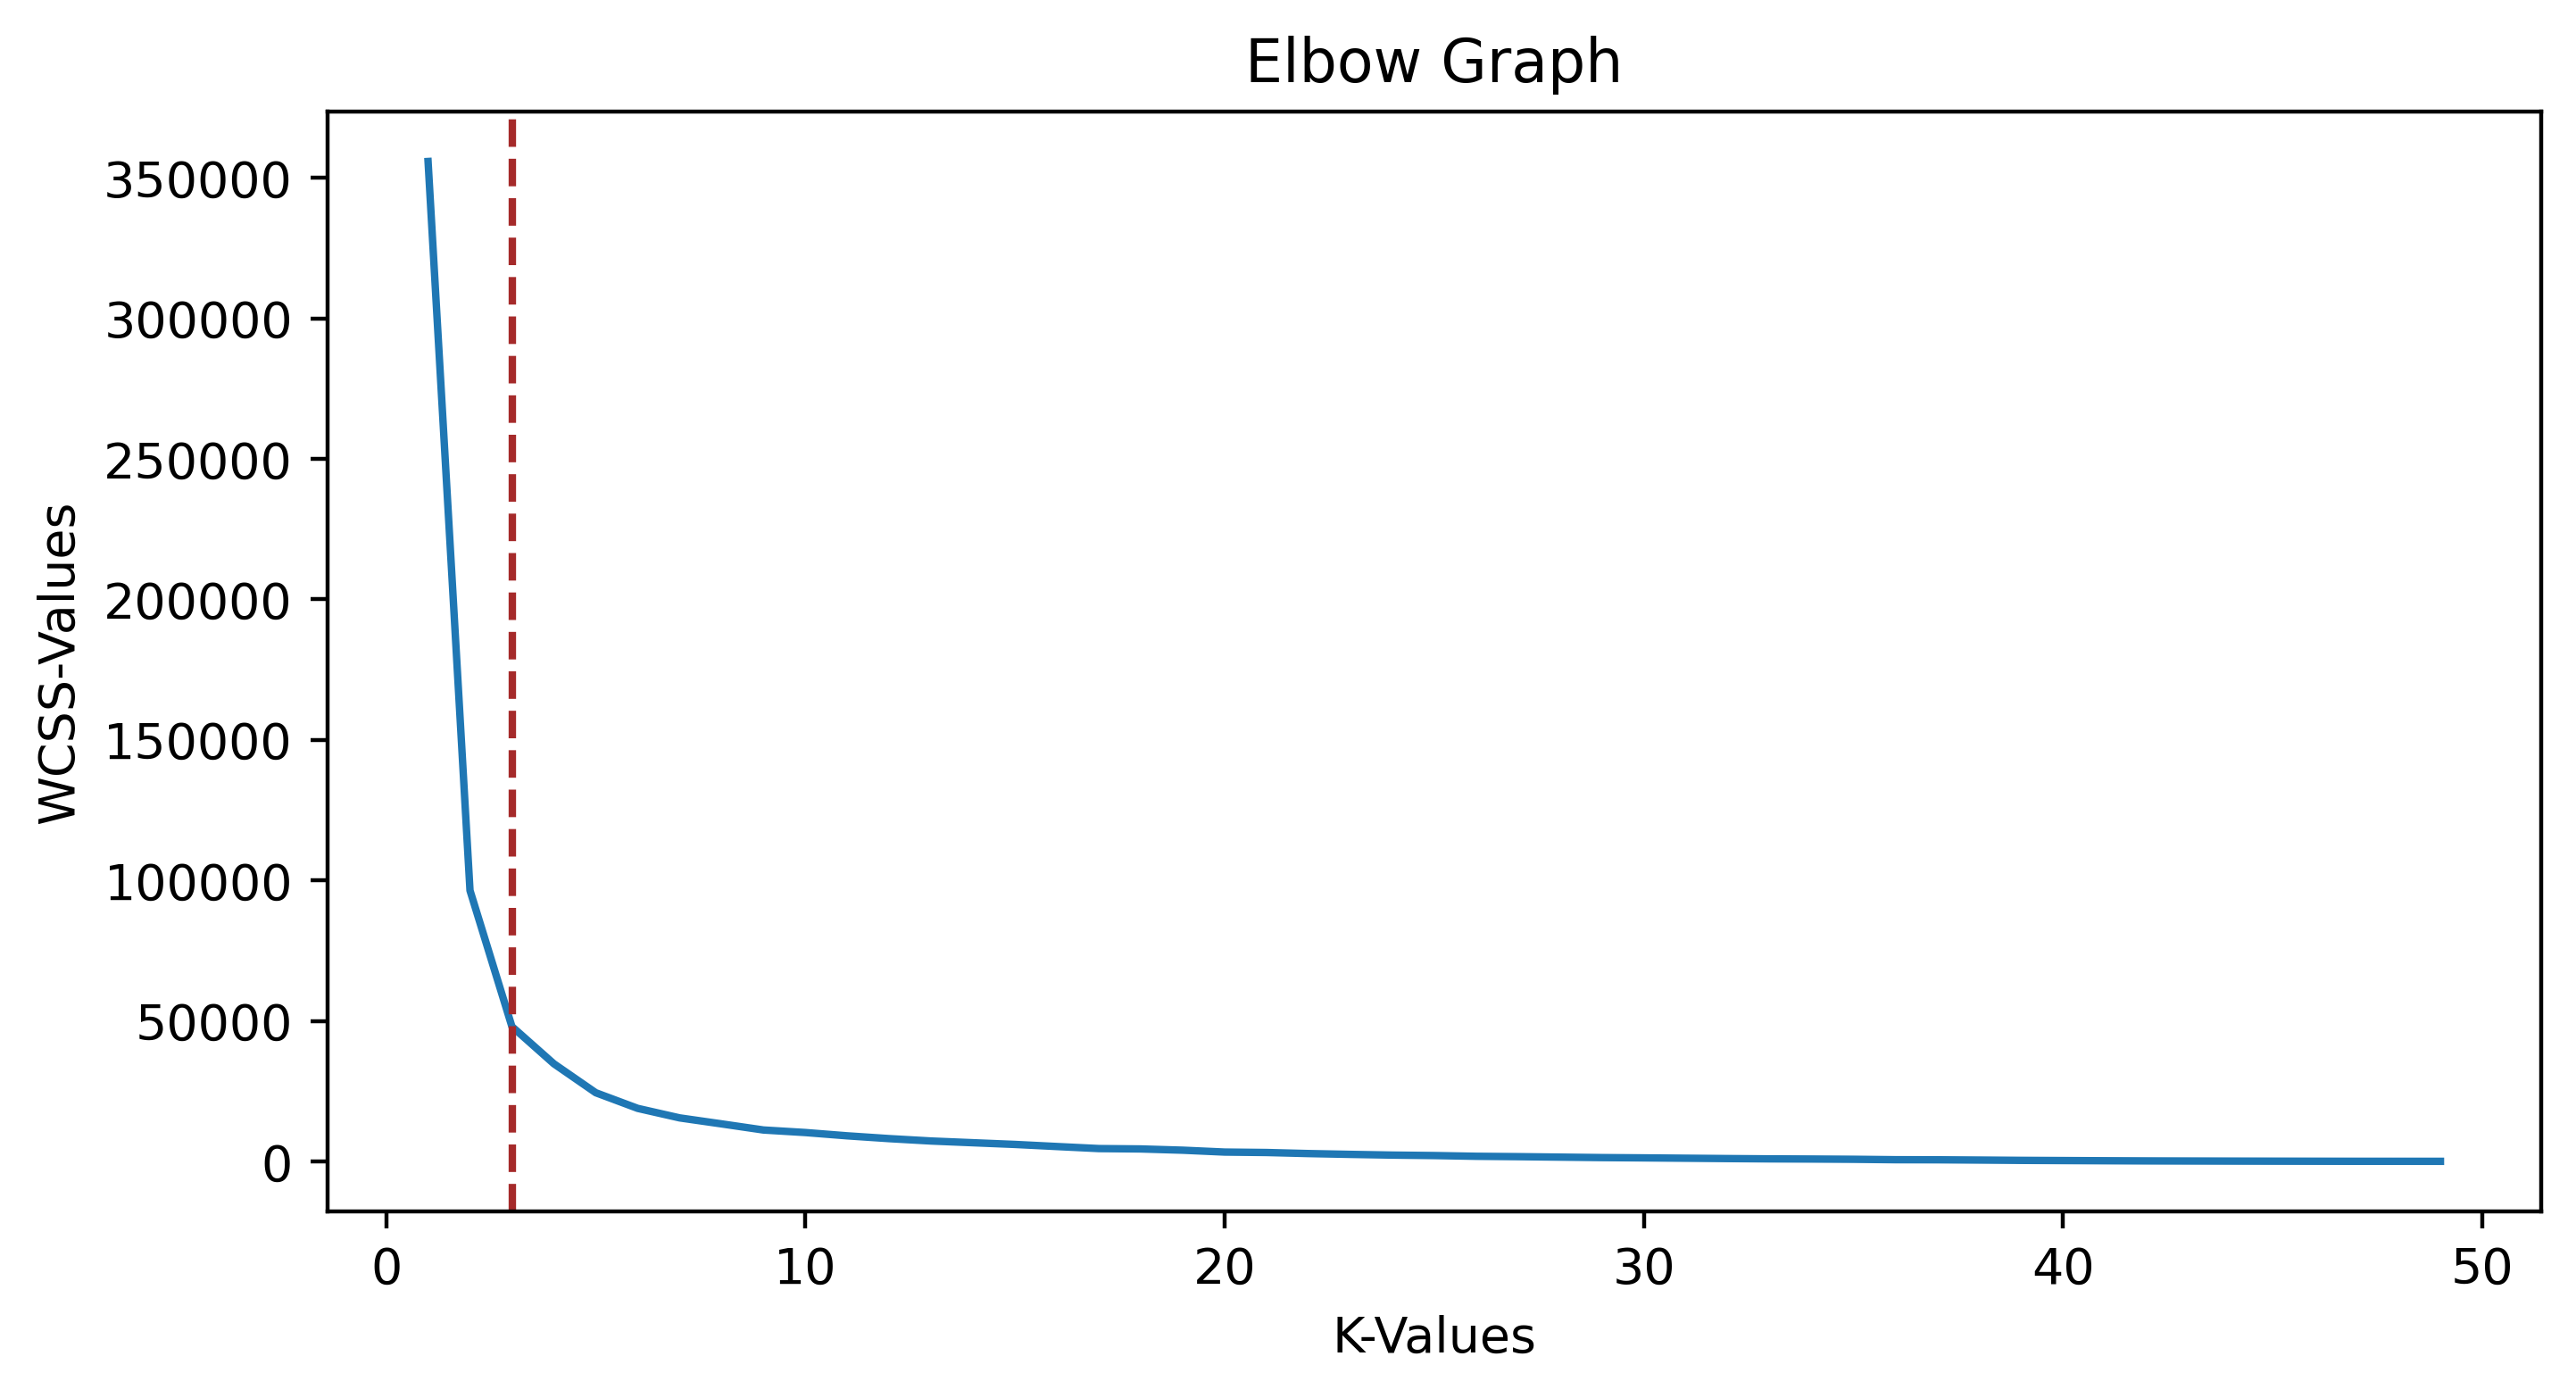

In [56]:
plt.plot(range(1,50), wcss)
plt.axvline(x=3, linestyle = '--', color = 'brown')
plt.xlabel('K-Values')
plt.ylabel('WCSS-Values')
plt.title('Elbow Graph')

In [57]:
# Here i think 3 is the ideal K value to be consider 

In [58]:
# Final K-Means Model 

In [59]:
km_final = KMeans(n_clusters=3)
y_Pred_KM = km_final.fit_predict(x)
raw_df['y_Pred_KM'] = y_Pred_KM

In [60]:
raw_df.head()

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,2,2
4,California,9.0,276,91,40.6,0,1


In [62]:
# Visualizing Final K-Means Model

Text(0.5, 1.0, 'K-Means Cluster between Murder & Assault')

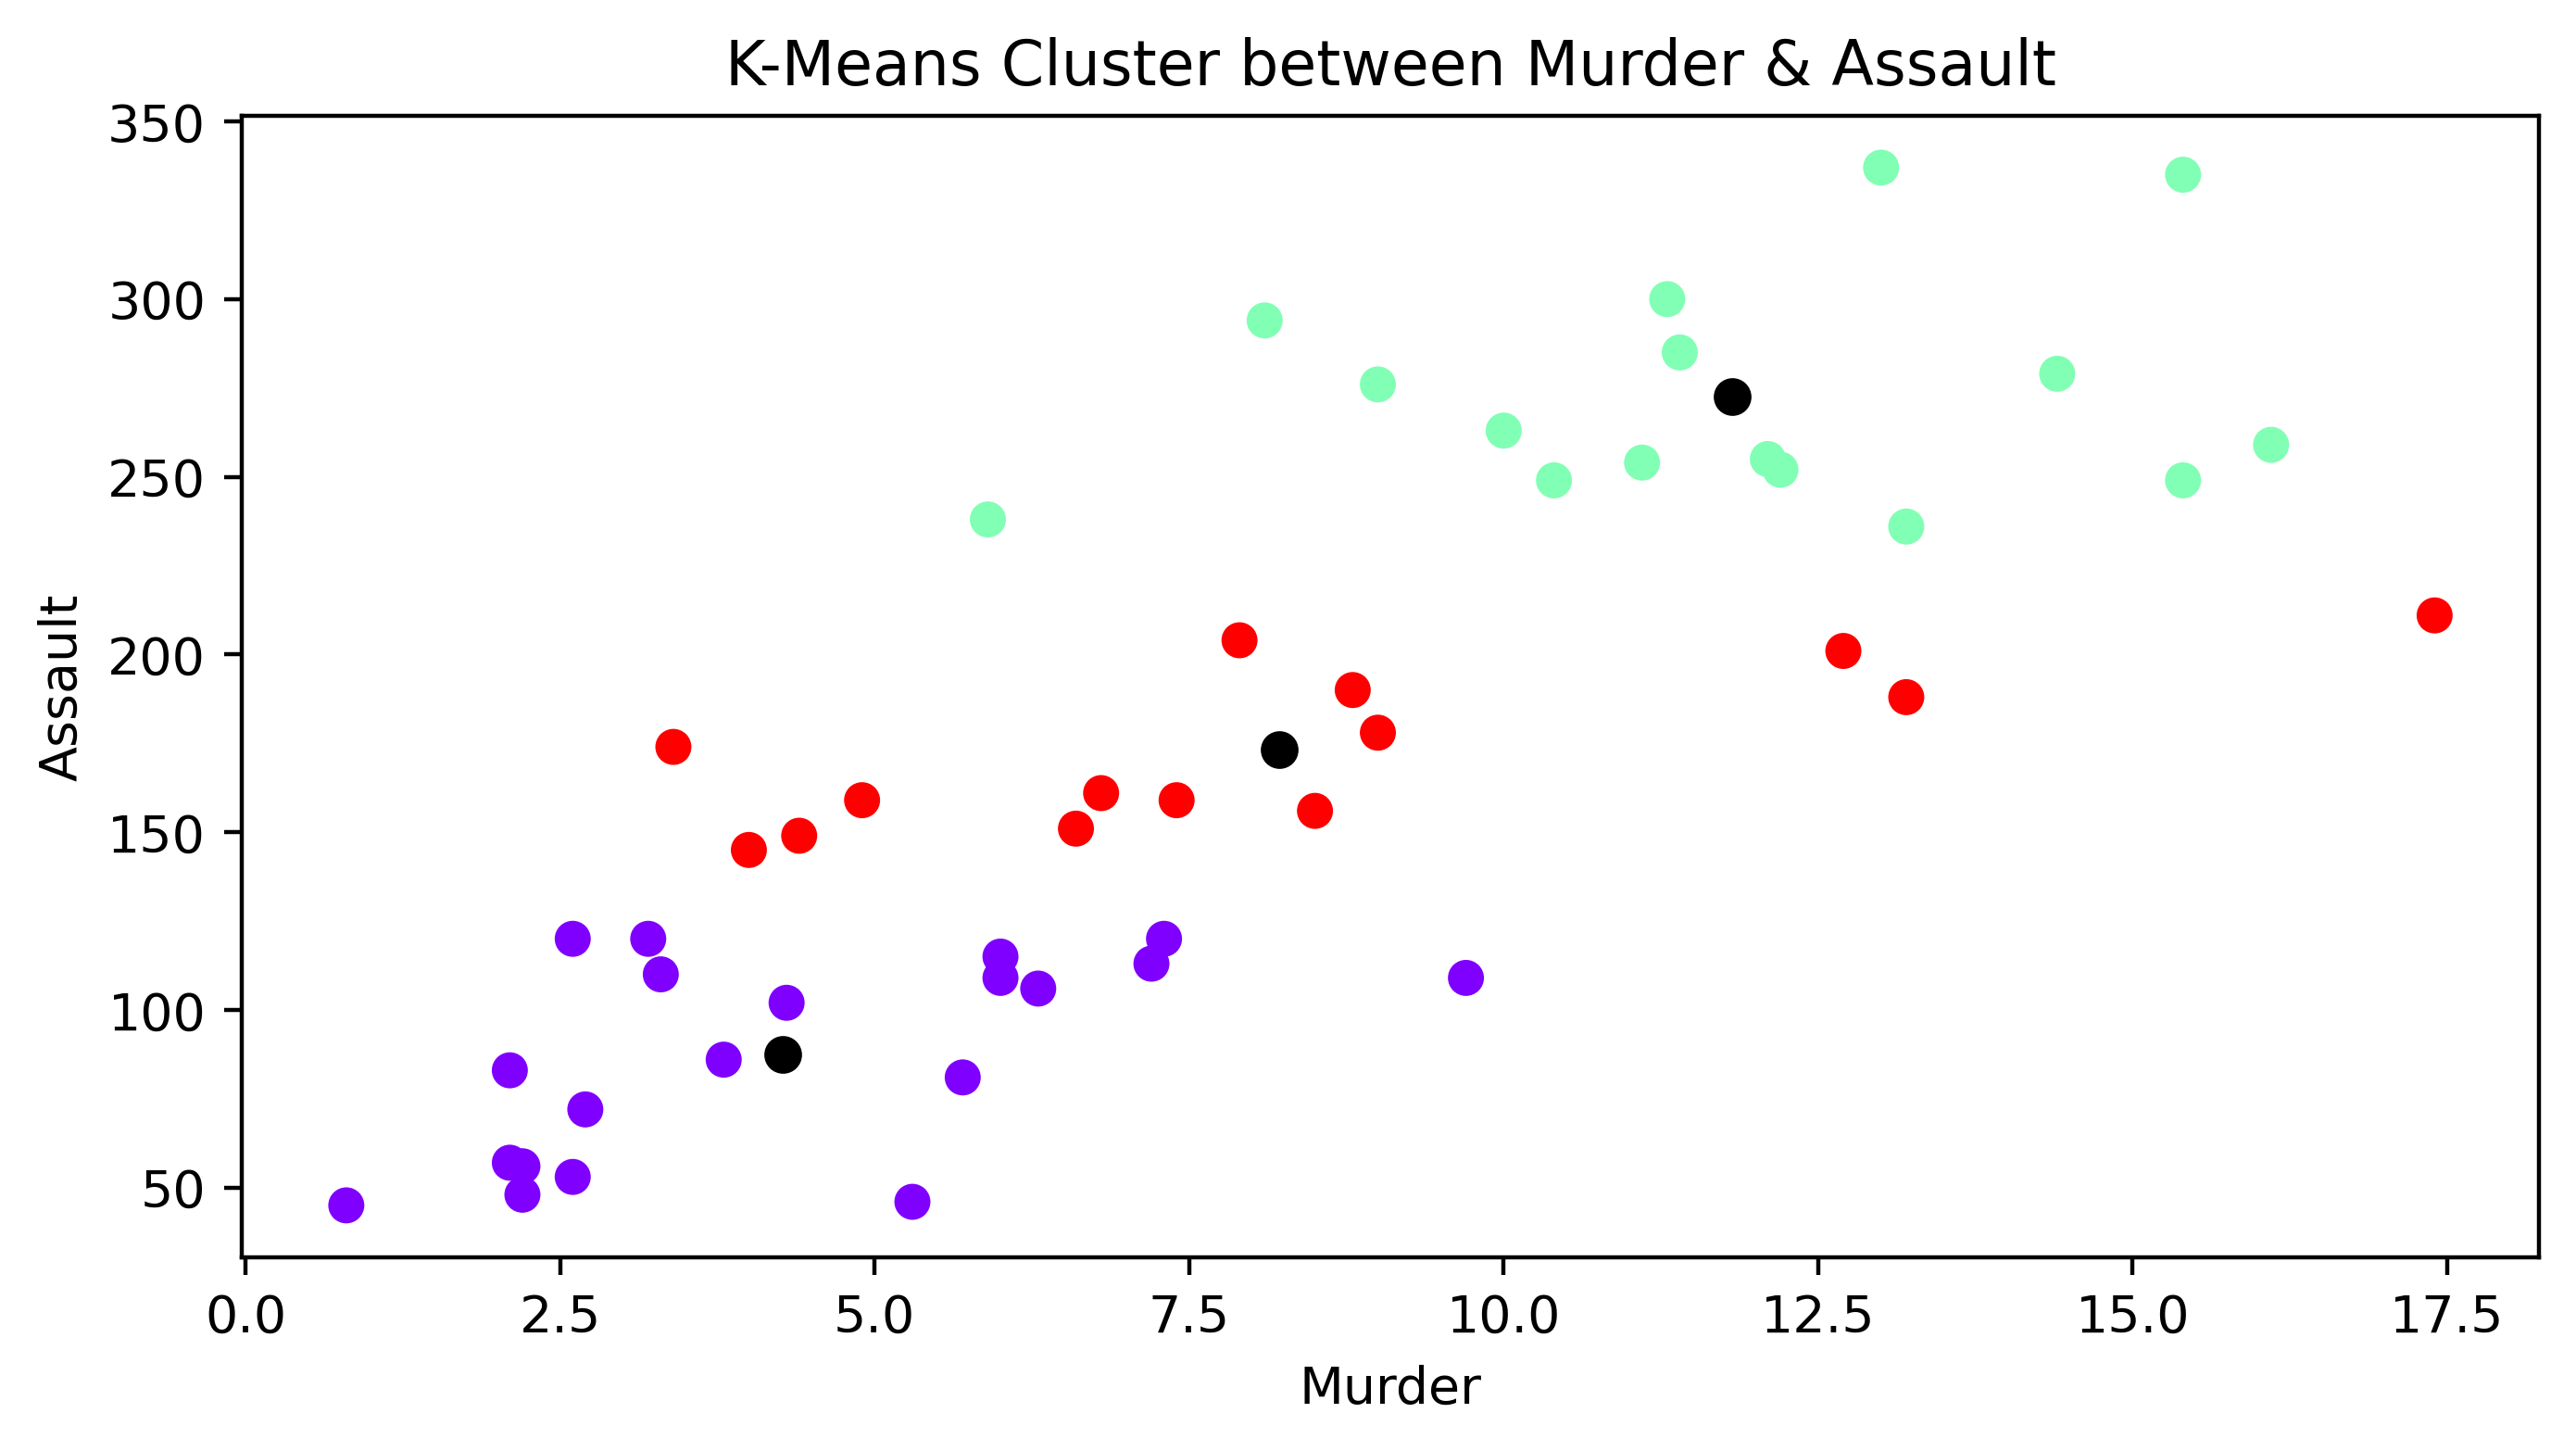

In [63]:
km_final.cluster_centers_
plt.scatter(raw_df['Murder'], raw_df['Assault'], c=y_Pred_KM, cmap='rainbow')
plt.scatter(km_final.cluster_centers_[:,0], km_final.cluster_centers_[:,1], c='black', s=40)
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('K-Means Cluster between Murder & Assault')

Text(0.5, 1.0, 'K-Means Cluster between Urban Population & Rape')

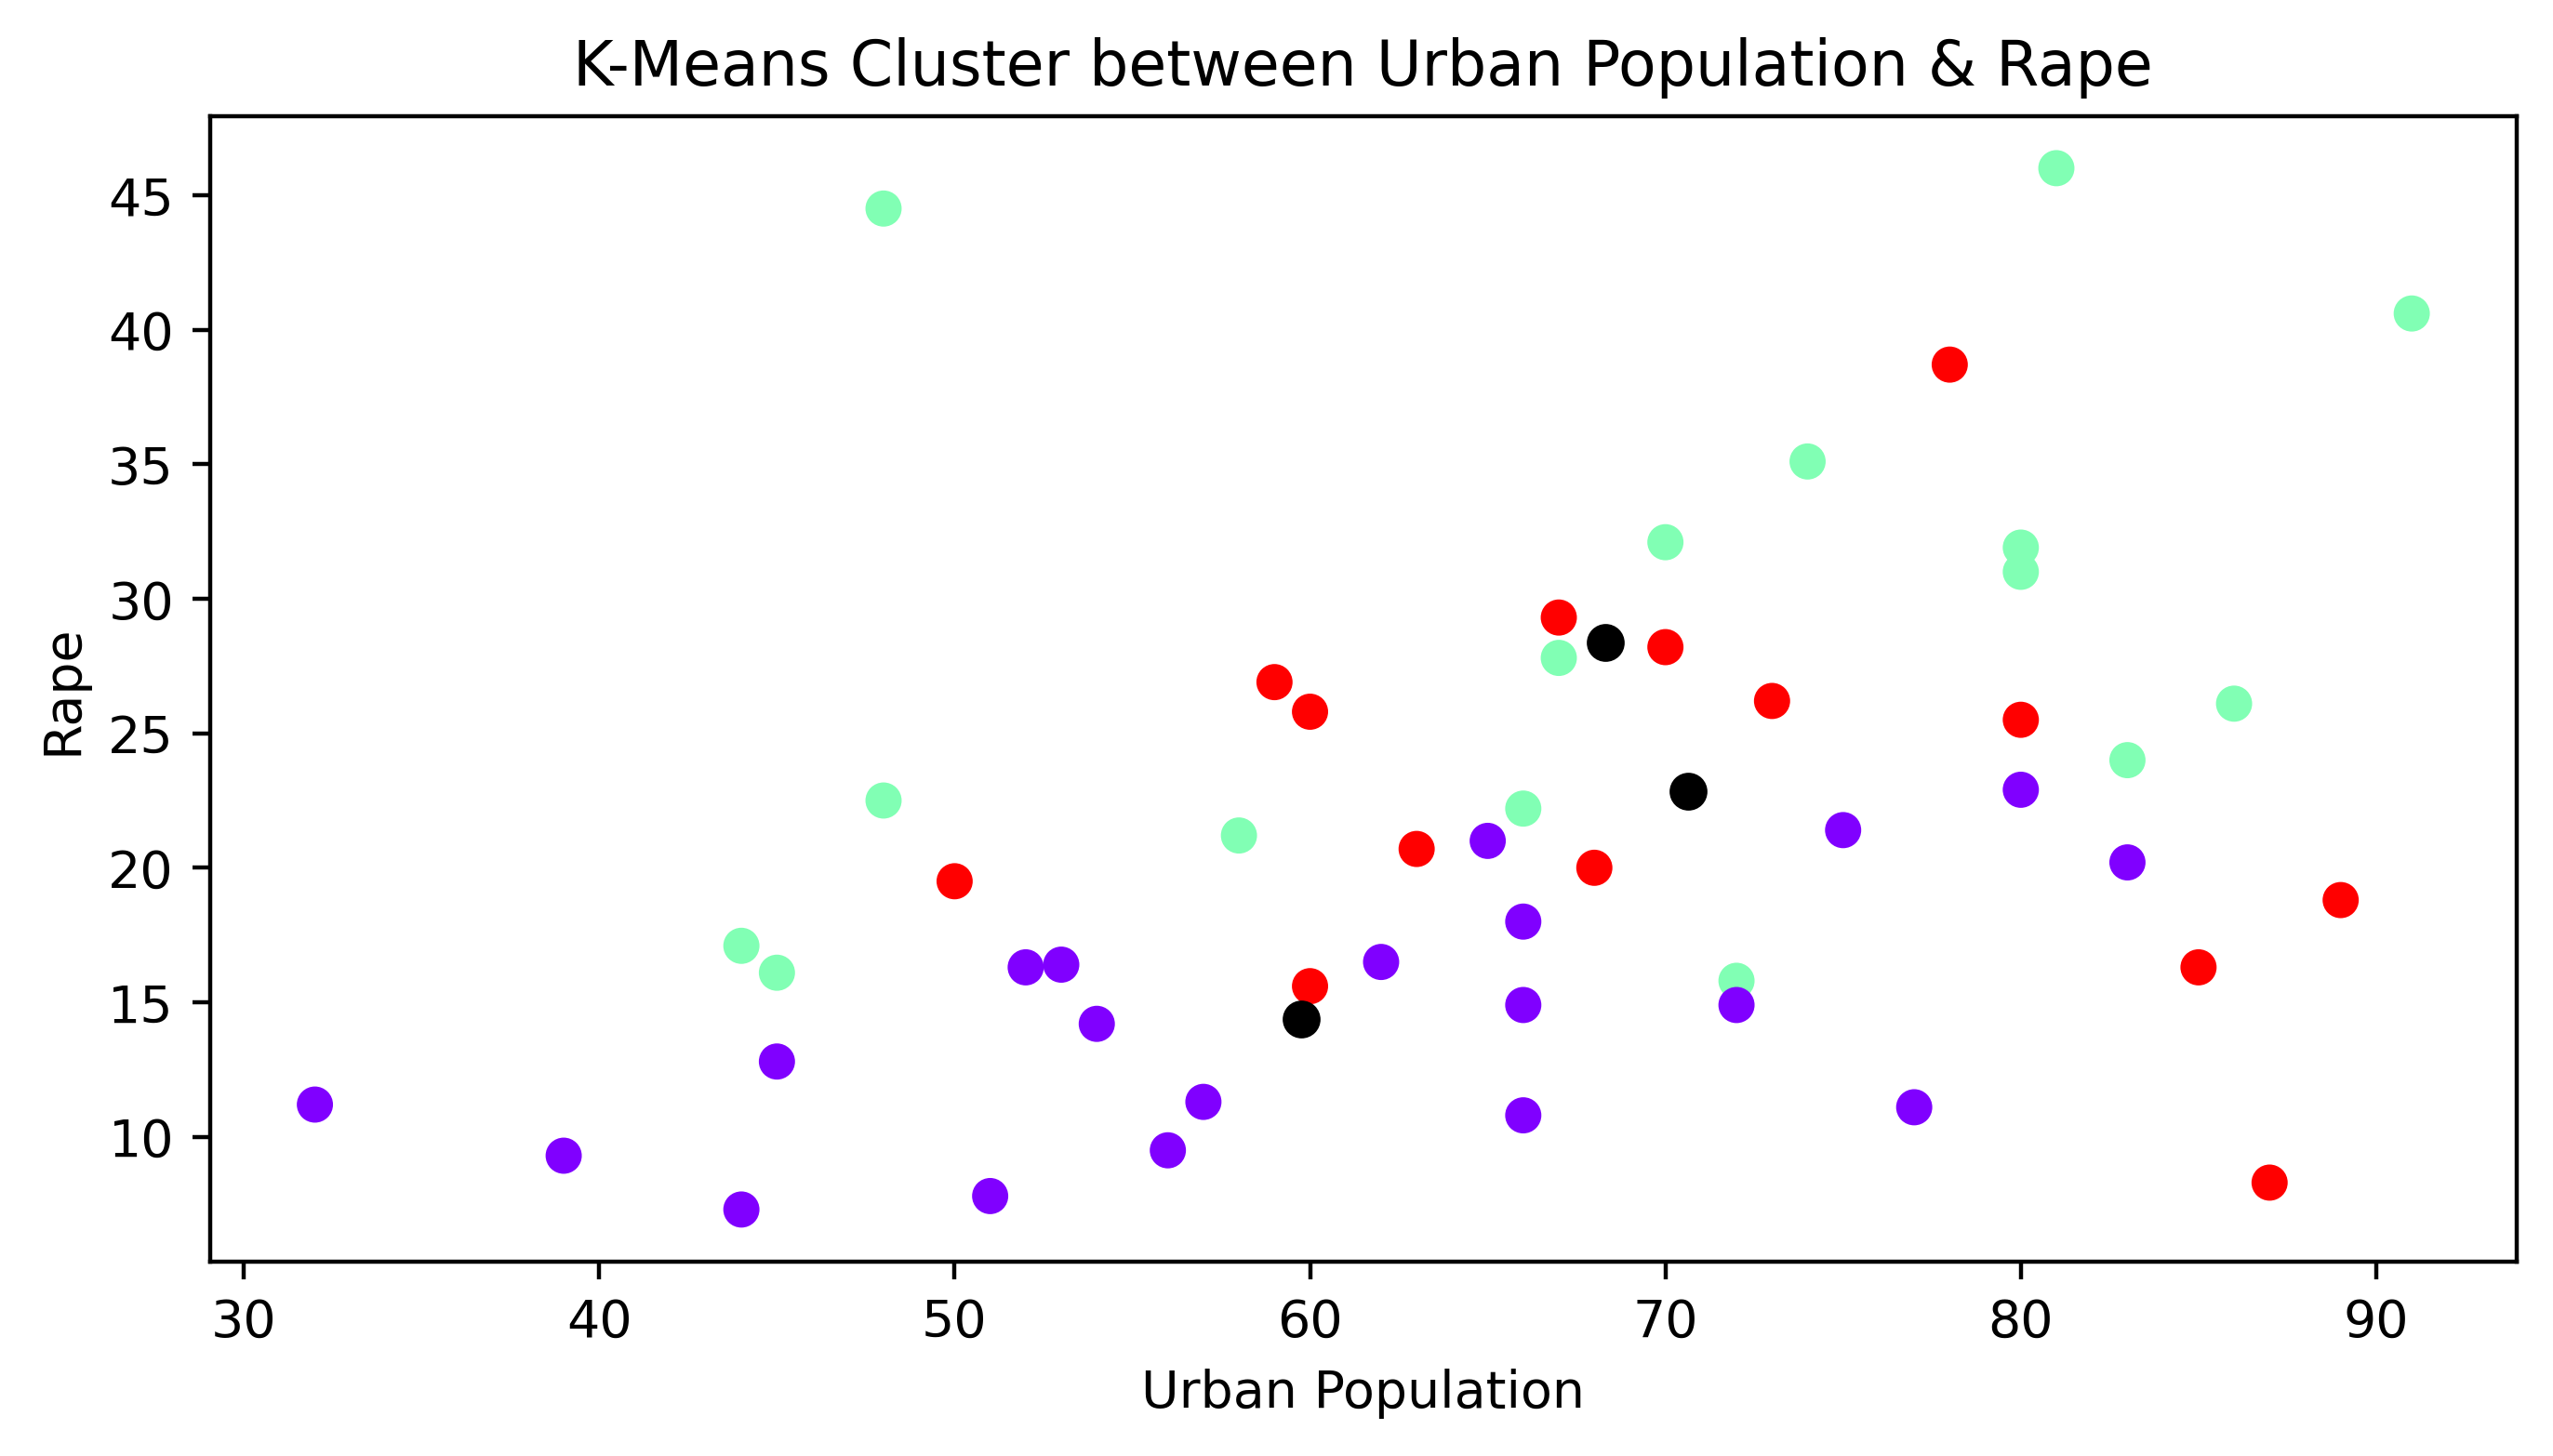

In [64]:
plt.scatter(raw_df['UrbanPop'], raw_df['Rape'], c=y_Pred_KM, cmap='rainbow')
plt.scatter(km_final.cluster_centers_[:,2], km_final.cluster_centers_[:,3], c='black', s=40)
plt.xlabel('Urban Population')
plt.ylabel('Rape')
plt.title('K-Means Cluster between Urban Population & Rape')

In [65]:
# K-Means model evaluation

In [66]:
silhouette_score(x, y_Pred_KM)

0.5319024108339817

In [68]:
# Model is not good and not bad 
# i think the moderate silhoutte score is due to the presence of outliers 

In [69]:
# Analyzing K-Means Clusters

In [70]:
raw_df[raw_df['y_Pred_KM']==0]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM
6,Connecticut,3.3,110,77,11.1,3,0
10,Hawaii,5.3,46,83,20.2,1,0
11,Idaho,2.6,120,54,14.2,3,0
13,Indiana,7.2,113,65,21.0,3,0
14,Iowa,2.2,56,57,11.3,1,0
15,Kansas,6.0,115,66,18.0,3,0
16,Kentucky,9.7,109,52,16.3,3,0
18,Maine,2.1,83,51,7.8,1,0
22,Minnesota,2.7,72,66,14.9,1,0
25,Montana,6.0,109,53,16.4,3,0


In [71]:
raw_df[raw_df['Hierarchy_Cluster']==0]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
4,California,9.0,276,91,40.6,0,1
7,Delaware,5.9,238,72,15.8,0,1
8,Florida,15.4,335,80,31.9,0,1
12,Illinois,10.4,249,83,24.0,0,1
17,Louisiana,15.4,249,66,22.2,0,1
19,Maryland,11.3,300,67,27.8,0,1
21,Michigan,12.1,255,74,35.1,0,1


In [72]:
# We can see Both the models has predicted same datapoints in same cluster
# Both the models worked same here

In [73]:
raw_df[raw_df['y_Pred_KM']==1]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
4,California,9.0,276,91,40.6,0,1
7,Delaware,5.9,238,72,15.8,0,1
8,Florida,15.4,335,80,31.9,0,1
12,Illinois,10.4,249,83,24.0,0,1
17,Louisiana,15.4,249,66,22.2,0,1
19,Maryland,11.3,300,67,27.8,0,1
21,Michigan,12.1,255,74,35.1,0,1


In [74]:
raw_df[raw_df['Hierarchy_Cluster']==1]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM
10,Hawaii,5.3,46,83,20.2,1,0
14,Iowa,2.2,56,57,11.3,1,0
18,Maine,2.1,83,51,7.8,1,0
22,Minnesota,2.7,72,66,14.9,1,0
28,New Hampshire,2.1,57,56,9.5,1,0
33,North Dakota,0.8,45,44,7.3,1,0
40,South Dakota,3.8,86,45,12.8,1,0
44,Vermont,2.2,48,32,11.2,1,0
47,West Virginia,5.7,81,39,9.3,1,0
48,Wisconsin,2.6,53,66,10.8,1,0


In [75]:
# Here there is difference in prediction of both models

In [76]:
raw_df[raw_df['y_Pred_KM']==2]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM
3,Arkansas,8.8,190,50,19.5,2,2
5,Colorado,7.9,204,78,38.7,2,2
9,Georgia,17.4,211,60,25.8,2,2
20,Massachusetts,4.4,149,85,16.3,2,2
24,Missouri,9.0,178,70,28.2,2,2
29,New Jersey,7.4,159,89,18.8,2,2
35,Oklahoma,6.6,151,68,20.0,2,2
36,Oregon,4.9,159,67,29.3,2,2
38,Rhode Island,3.4,174,87,8.3,2,2
41,Tennessee,13.2,188,59,26.9,2,2


In [77]:
raw_df[raw_df['Hierarchy_Cluster']==2]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM
3,Arkansas,8.8,190,50,19.5,2,2
5,Colorado,7.9,204,78,38.7,2,2
9,Georgia,17.4,211,60,25.8,2,2
20,Massachusetts,4.4,149,85,16.3,2,2
24,Missouri,9.0,178,70,28.2,2,2
29,New Jersey,7.4,159,89,18.8,2,2
35,Oklahoma,6.6,151,68,20.0,2,2
36,Oregon,4.9,159,67,29.3,2,2
38,Rhode Island,3.4,174,87,8.3,2,2
41,Tennessee,13.2,188,59,26.9,2,2


In [78]:
# Here also both the models worked the same

In [79]:
raw_df[raw_df['y_Pred_KM']==3]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM


In [80]:
raw_df[raw_df['Hierarchy_Cluster']==3]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM
6,Connecticut,3.3,110,77,11.1,3,0
11,Idaho,2.6,120,54,14.2,3,0
13,Indiana,7.2,113,65,21.0,3,0
15,Kansas,6.0,115,66,18.0,3,0
16,Kentucky,9.7,109,52,16.3,3,0
25,Montana,6.0,109,53,16.4,3,0
26,Nebraska,4.3,102,62,16.5,3,0
34,Ohio,7.3,120,75,21.4,3,0
37,Pennsylvania,6.3,106,72,14.9,3,0
43,Utah,3.2,120,80,22.9,3,0


In [81]:
raw_df.groupby('y_Pred_KM').agg('mean')

,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster
y_Pred_KM,,,,,
0,4.270000,87.550000,59.750000,14.390000,2.0
1,11.812500,272.562500,68.312500,28.375000,0.0
2,8.214286,173.285714,70.642857,22.842857,2.0


In [82]:
# We can see that, the clusters are created according the average of crime rates in cities
# Cluster 0 is grup of cities having highets crime rate 
# Cluster 1 is grup of cities having lowest crime rate 
# Cluster 2 is grup of cities having moderate crime rates

In [83]:
#3. DBSCAN Clustering

In [84]:
# For DBSCAN clustering we need to standardize our dataset because DBSCAN involves calculation of distances. 

In [85]:
# Feature Scaling 

In [87]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [88]:
# DBSCAN Model Building 

In [89]:
db = DBSCAN(eps = 0.5, min_samples = 3)
y = db.fit_predict(x)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [90]:
# Here DBSCAN has created only 1 cluster which includes all the datapoints
# If we see above pairplot we can not see more than clusters that can be formed.

In [91]:
# Visualizing the Predictions

Text(0.5, 1.0, 'DBSCAN Prediction between Murder & Assault')

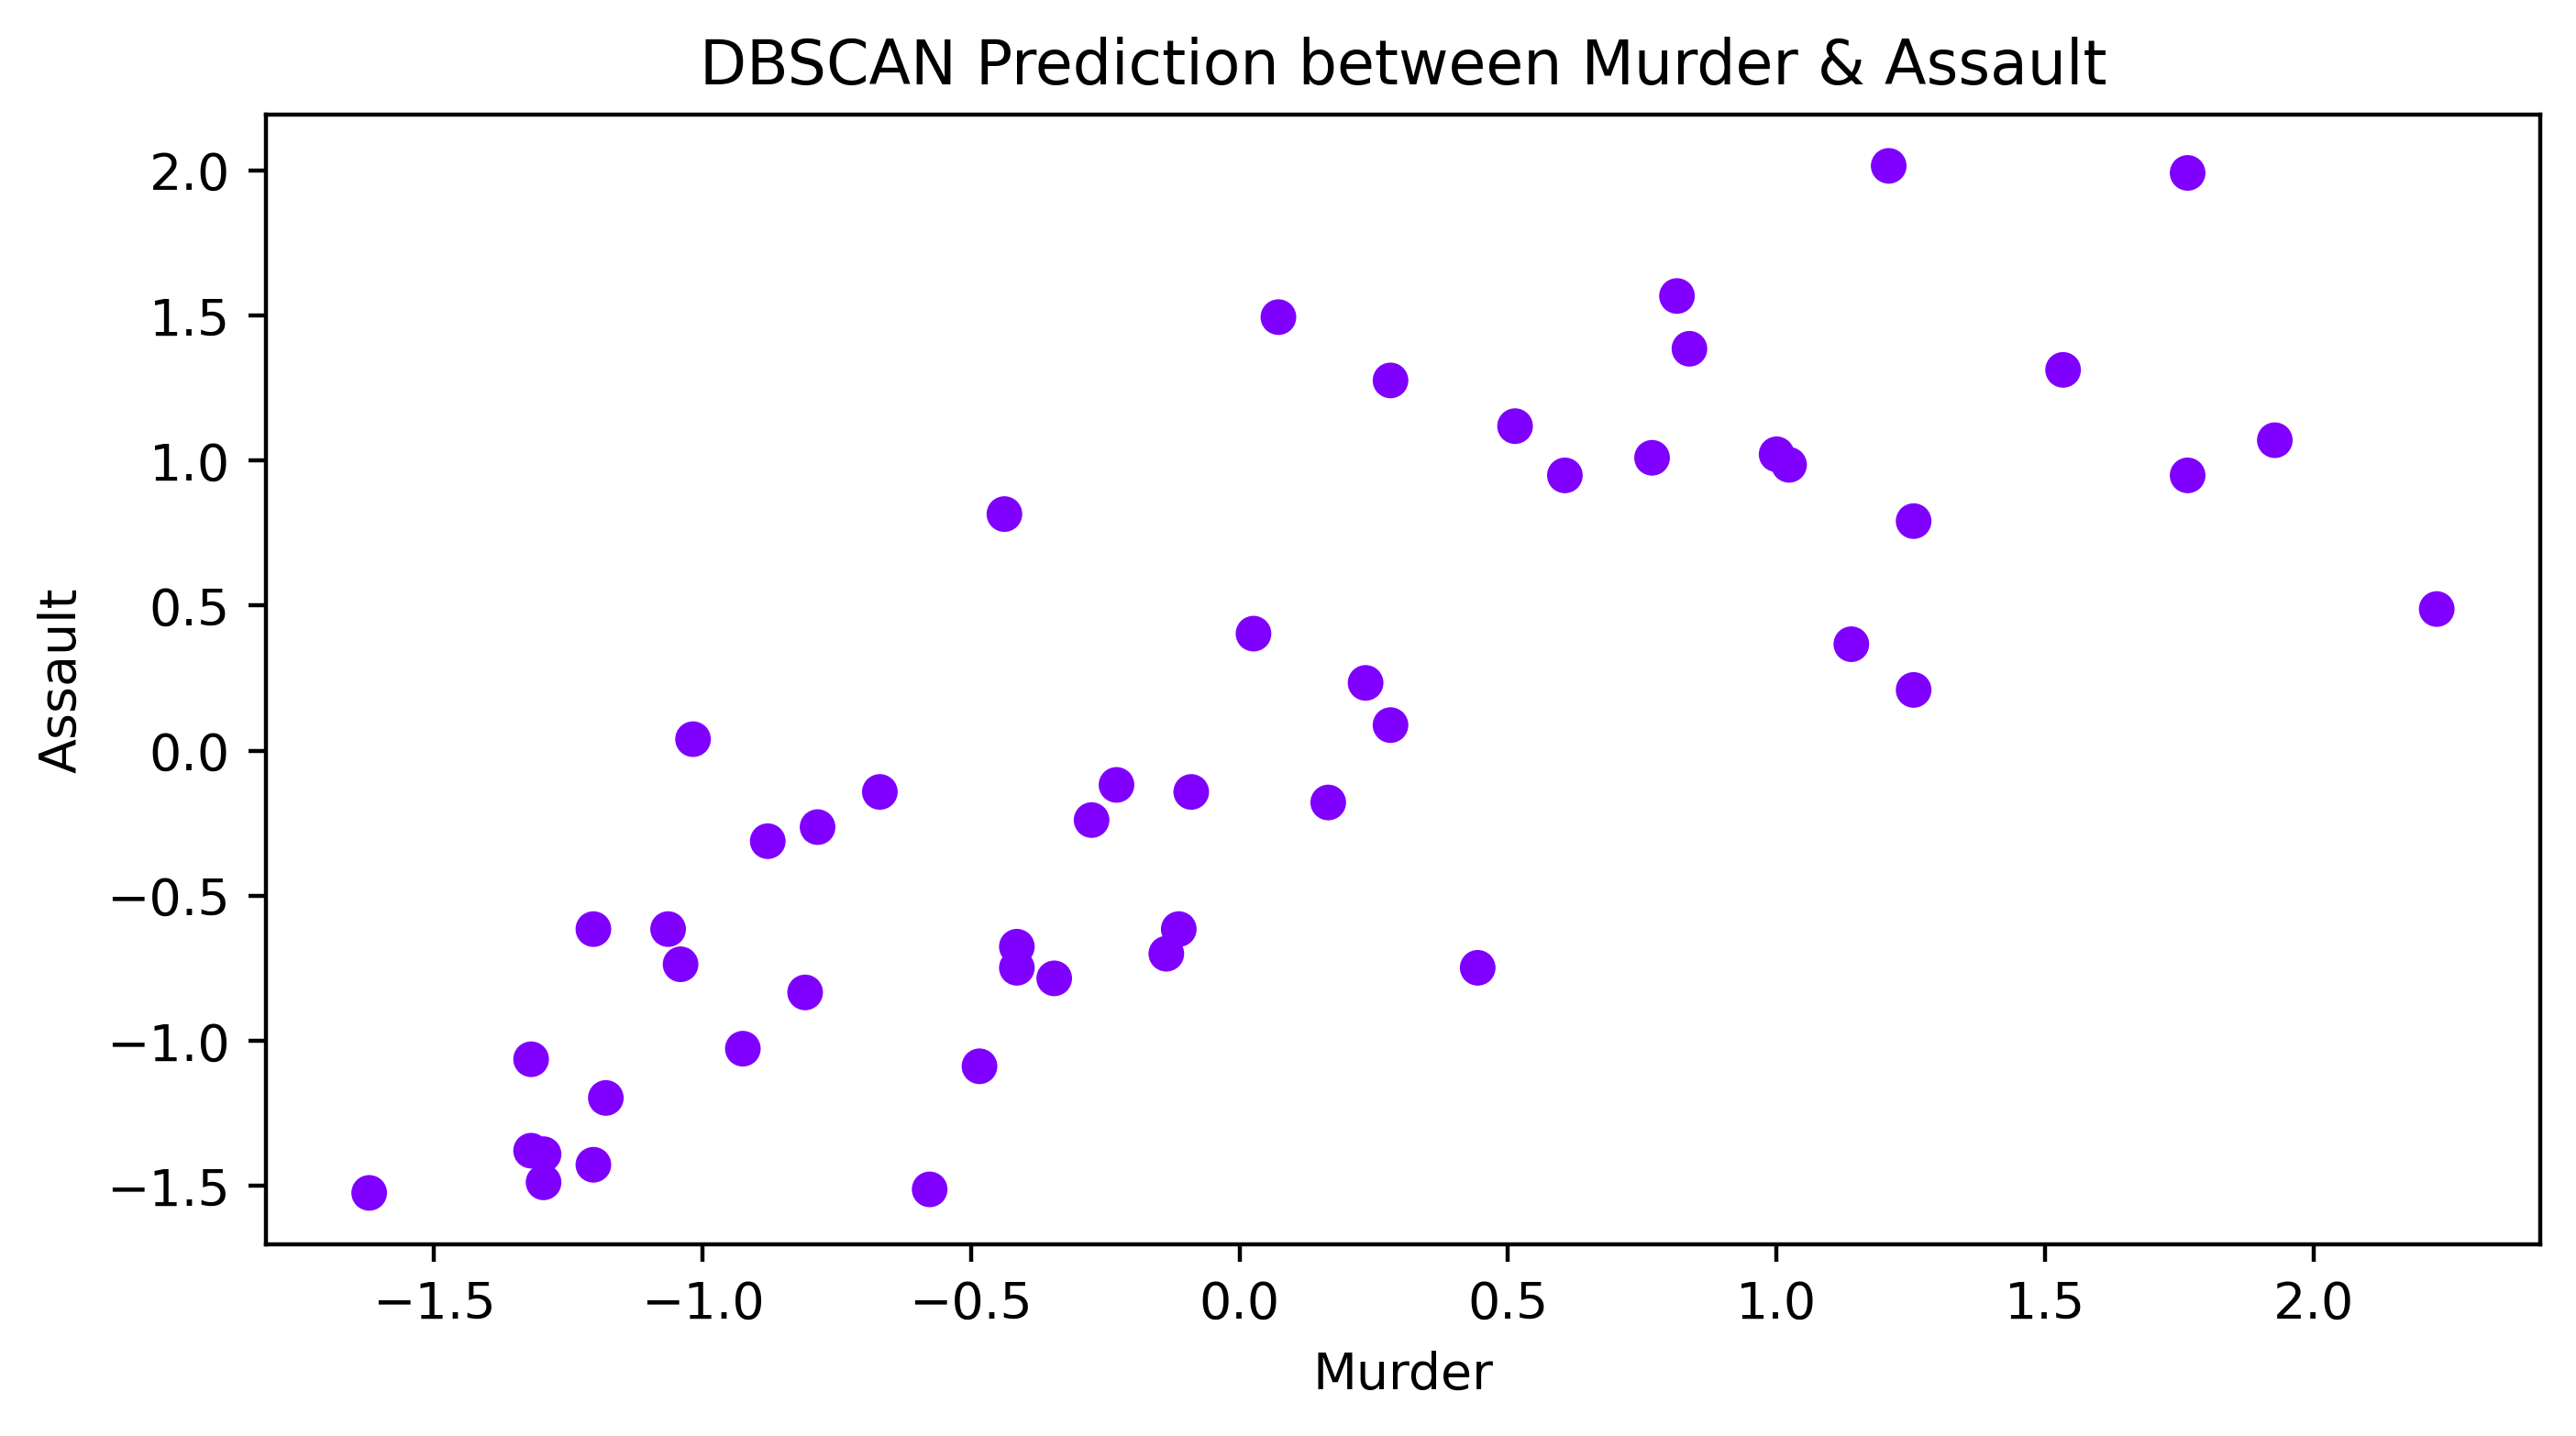

In [92]:
plt.scatter(x[:,0], x[:,1], c=y, cmap = 'rainbow')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('DBSCAN Prediction between Murder & Assault')

Text(0.5, 1.0, 'DBSCAN Prediction between UrbanPop & Rape')

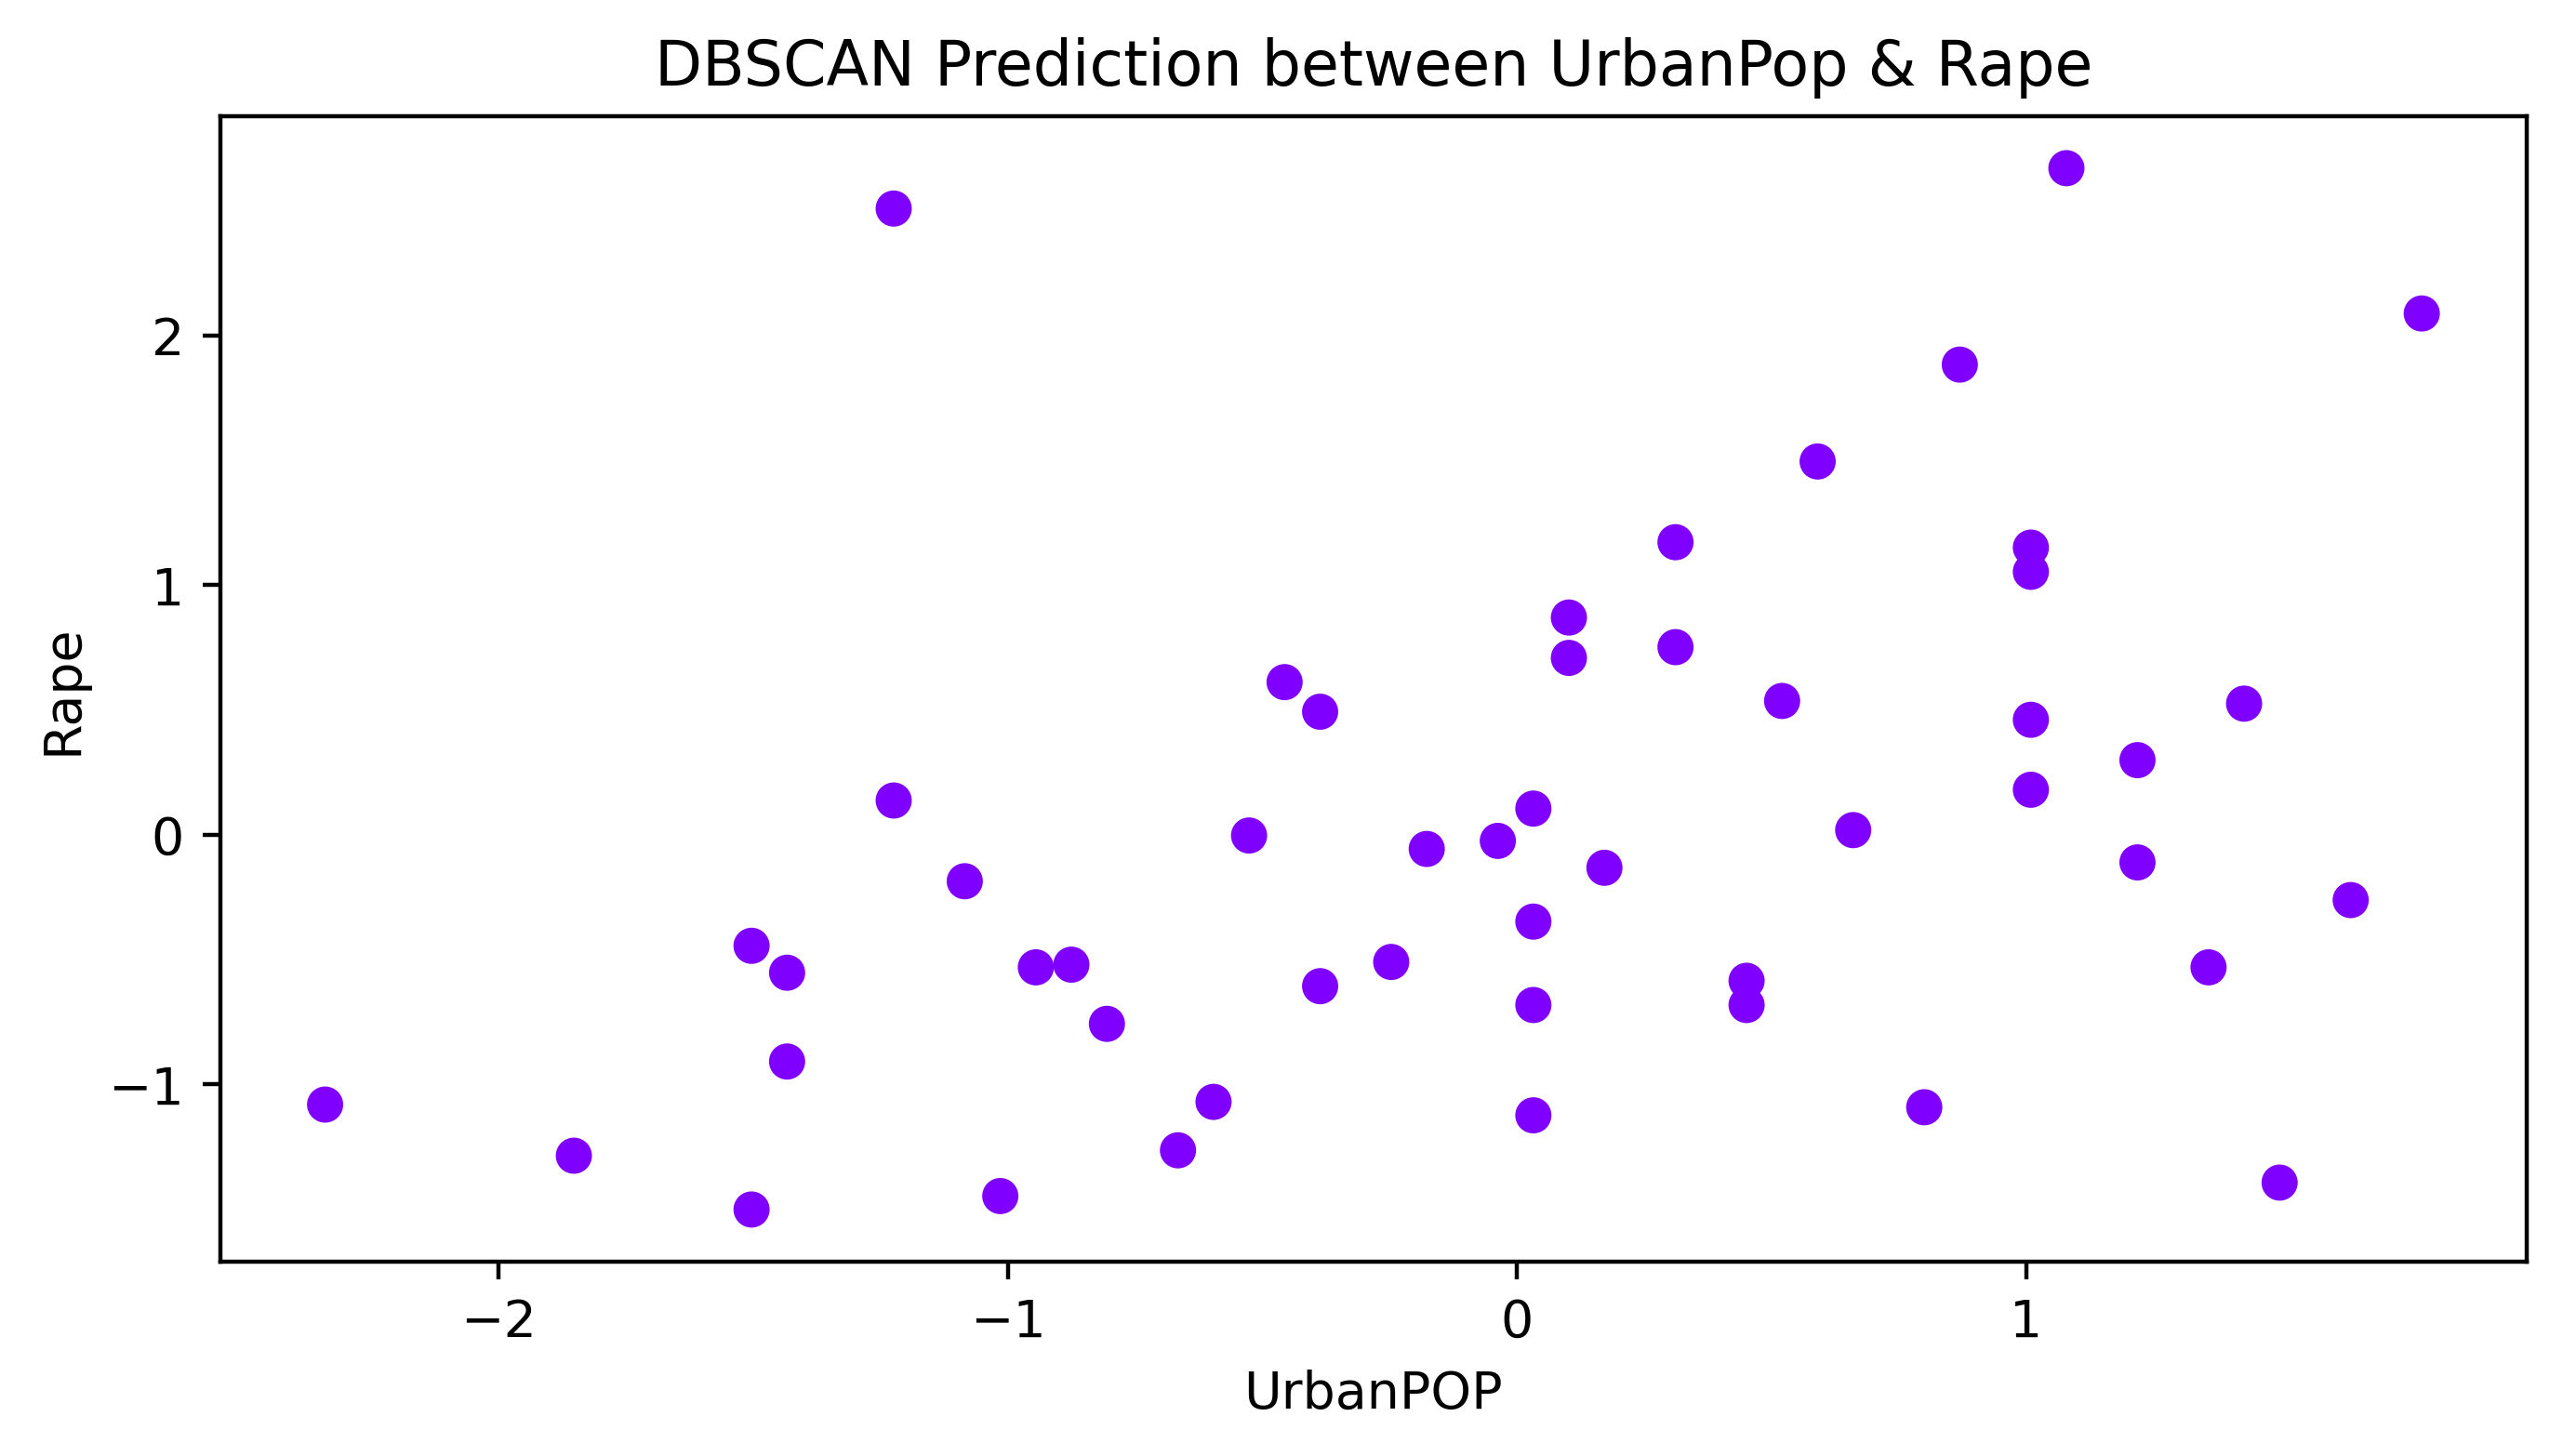

In [93]:
plt.scatter(x[:,2], x[:,3], c=y, cmap = 'rainbow')
plt.xlabel('UrbanPOP')
plt.ylabel('Rape')
plt.title('DBSCAN Prediction between UrbanPop & Rape')

In [94]:
# We can see DBSCAN has created only 1 clusetr with eps value 0.5, which inncludes all the datapoints

In [95]:
# DBSCAN model evaluation

In [96]:
# Here we cannot calculate silhouette score of model because we have only 1 cluster.

In [97]:
# Hyperparameter Tuning

In [98]:
nebor = NearestNeighbors(n_neighbors=5).fit(x) # n_neoghbors = no. of columns + 1
nebor

NearestNeighbors()

In [99]:
d,index = nebor.kneighbors(x)
d

array([[0.        , 0.78006247, 0.84928467, 0.92509451, 1.14292205],
       [0.        , 2.07898369, 2.13697134, 2.30088403, 2.35013877],
       [0.        , 1.0482199 , 1.08341076, 1.09354181, 1.20621365],
       [0.        , 1.0013278 , 1.00722663, 1.07057017, 1.24148411],
       [0.        , 1.20897691, 1.30069114, 1.32378897, 1.53005165],
       [0.        , 1.24886253, 1.30069114, 1.32606825, 1.37888923],
       [0.        , 0.88100359, 0.95643249, 0.99437327, 1.04597225],
       [0.        , 1.19227586, 1.27140067, 1.42312615, 1.45285466],
       [0.        , 1.30974334, 1.34926273, 1.45009454, 1.5890679 ],
       [0.        , 0.86797806, 1.02250187, 1.14292205, 1.41119063],
       [0.        , 1.08184506, 1.16110091, 1.22422969, 1.34114677],
       [0.        , 0.75913104, 0.81522244, 0.83710697, 0.85722678],
       [0.        , 0.35377437, 0.83250223, 1.09354181, 1.35292516],
       [0.        , 0.43312429, 0.53571007, 0.61894533, 0.70471473],
       [0.        , 0.2079438 , 0.

In [100]:
distance = np.sort(d[:,1])
distance

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

In [101]:
# K-Distance Plot

Text(0.5, 1.0, 'K-Distance Plot')

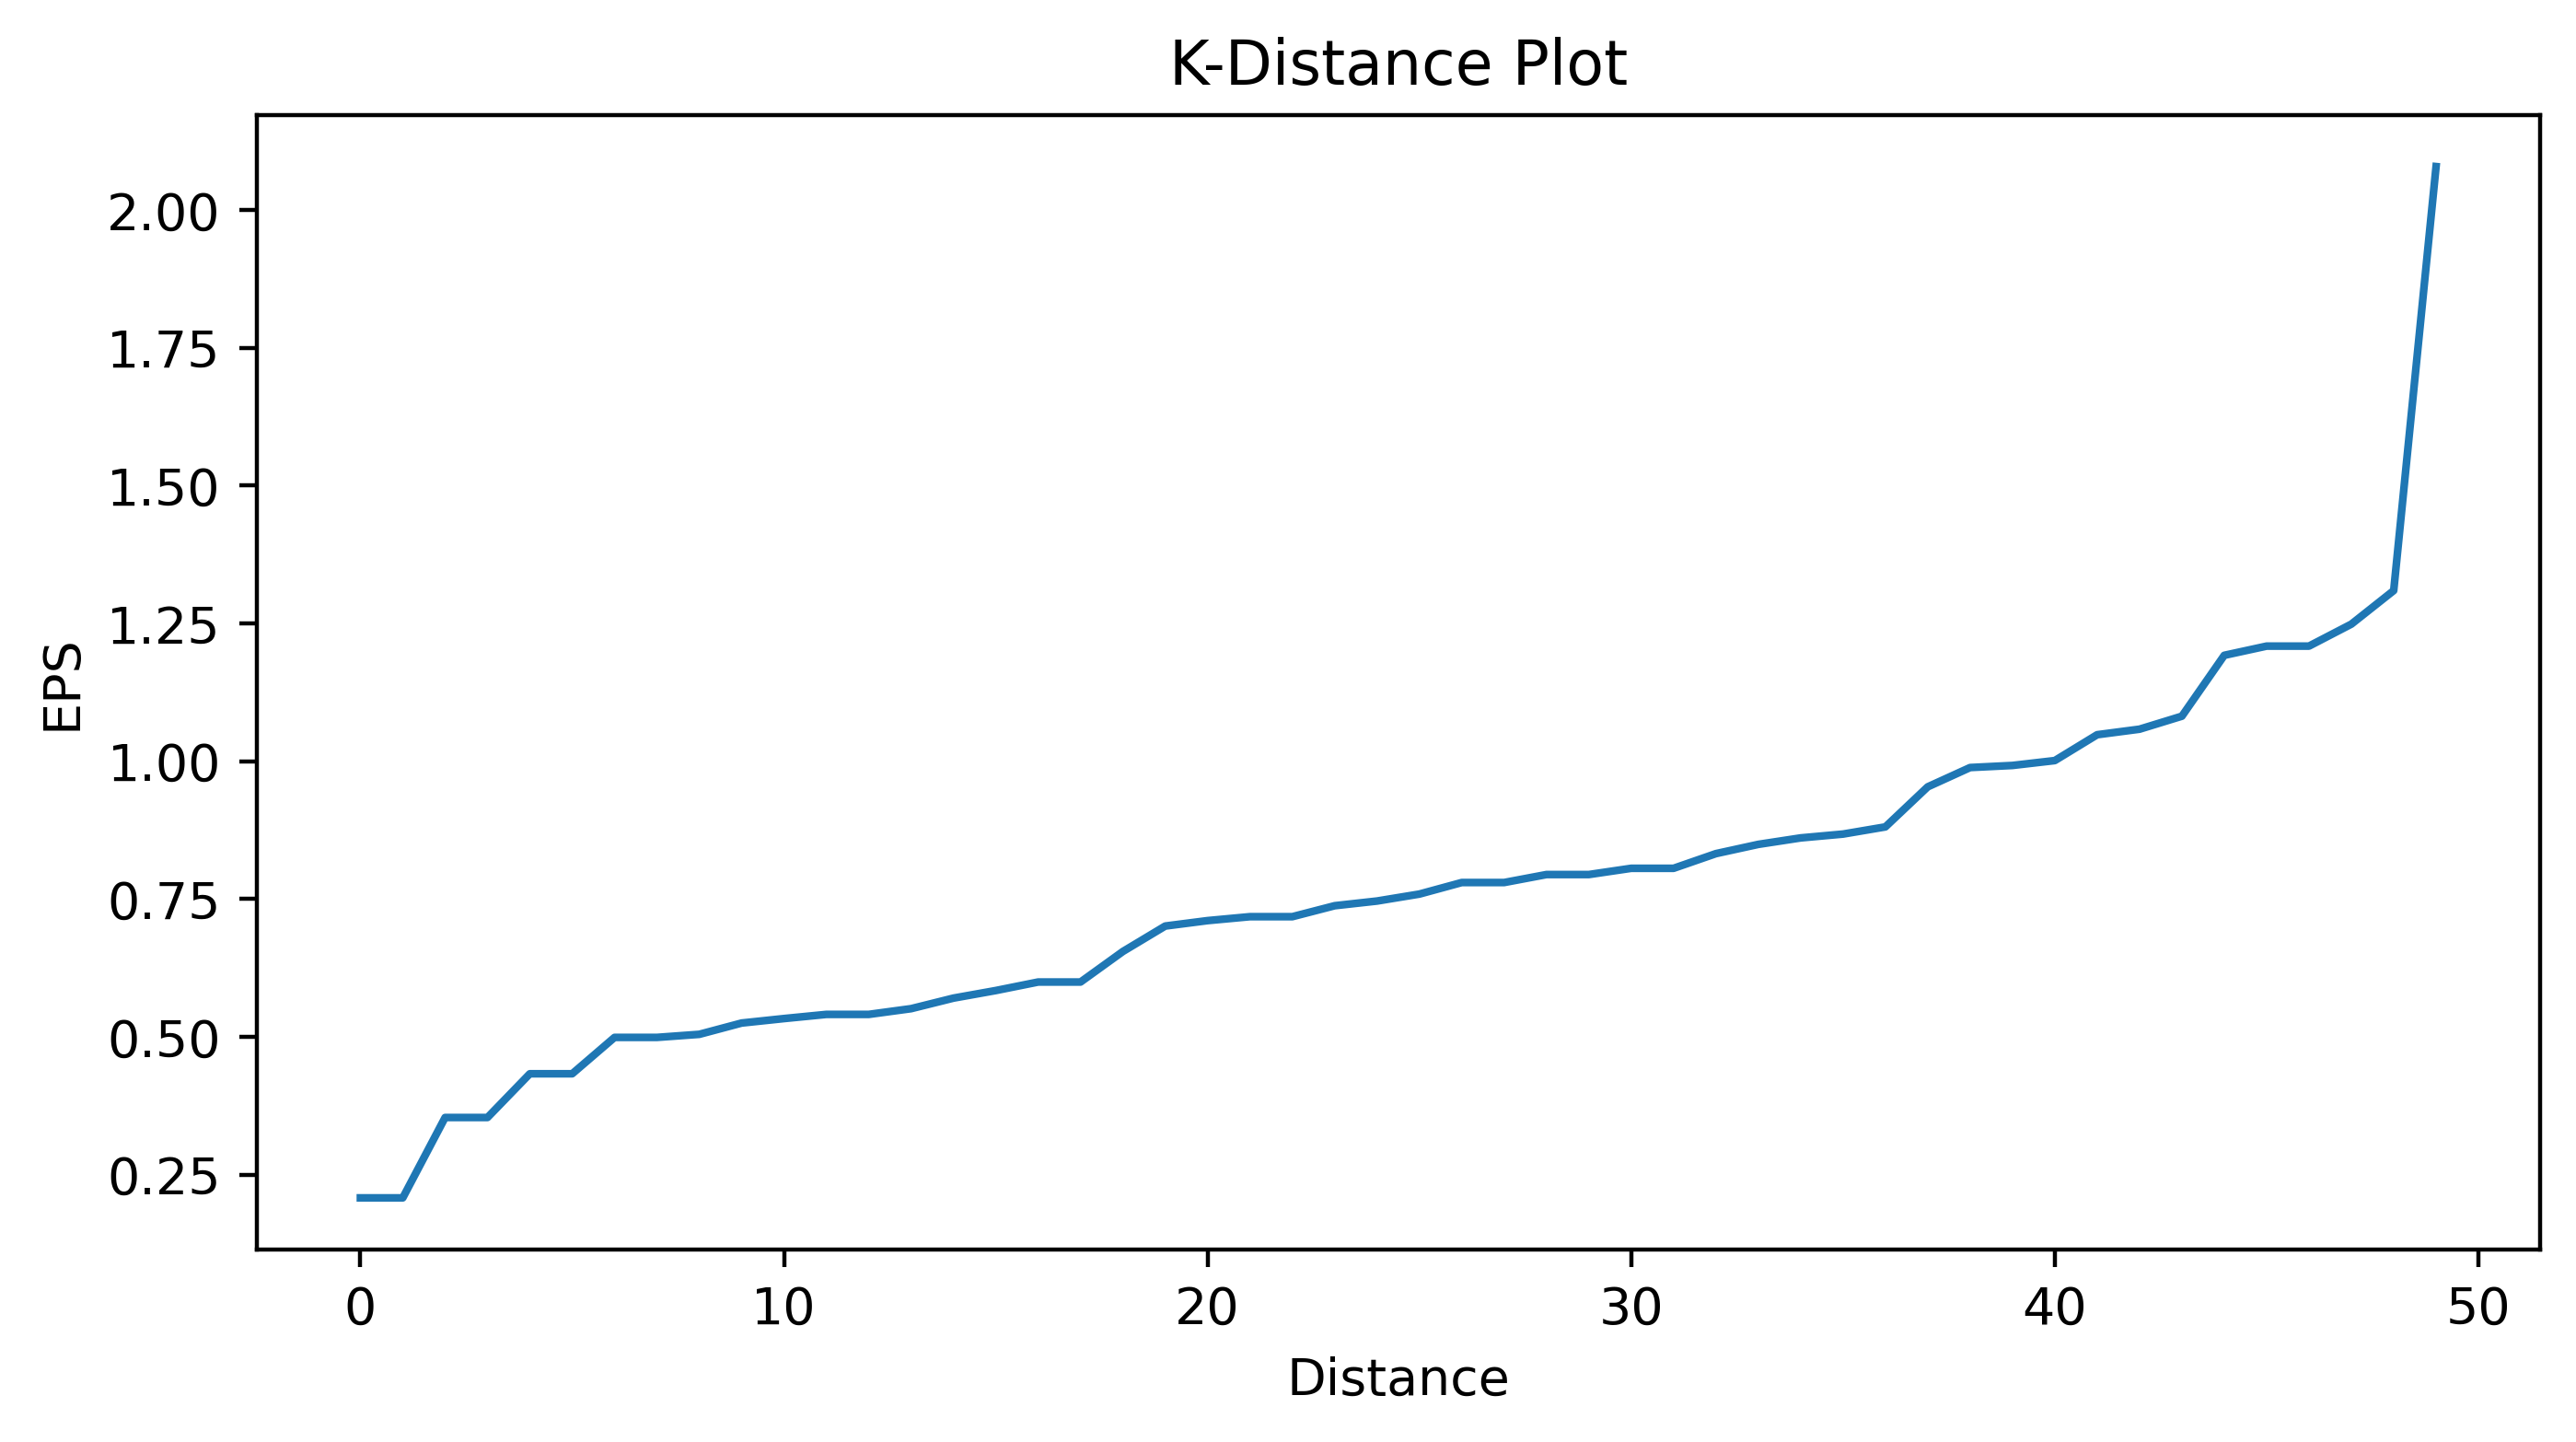

In [102]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Plot')

Text(0.5, 1.0, 'K-Distance Plot')

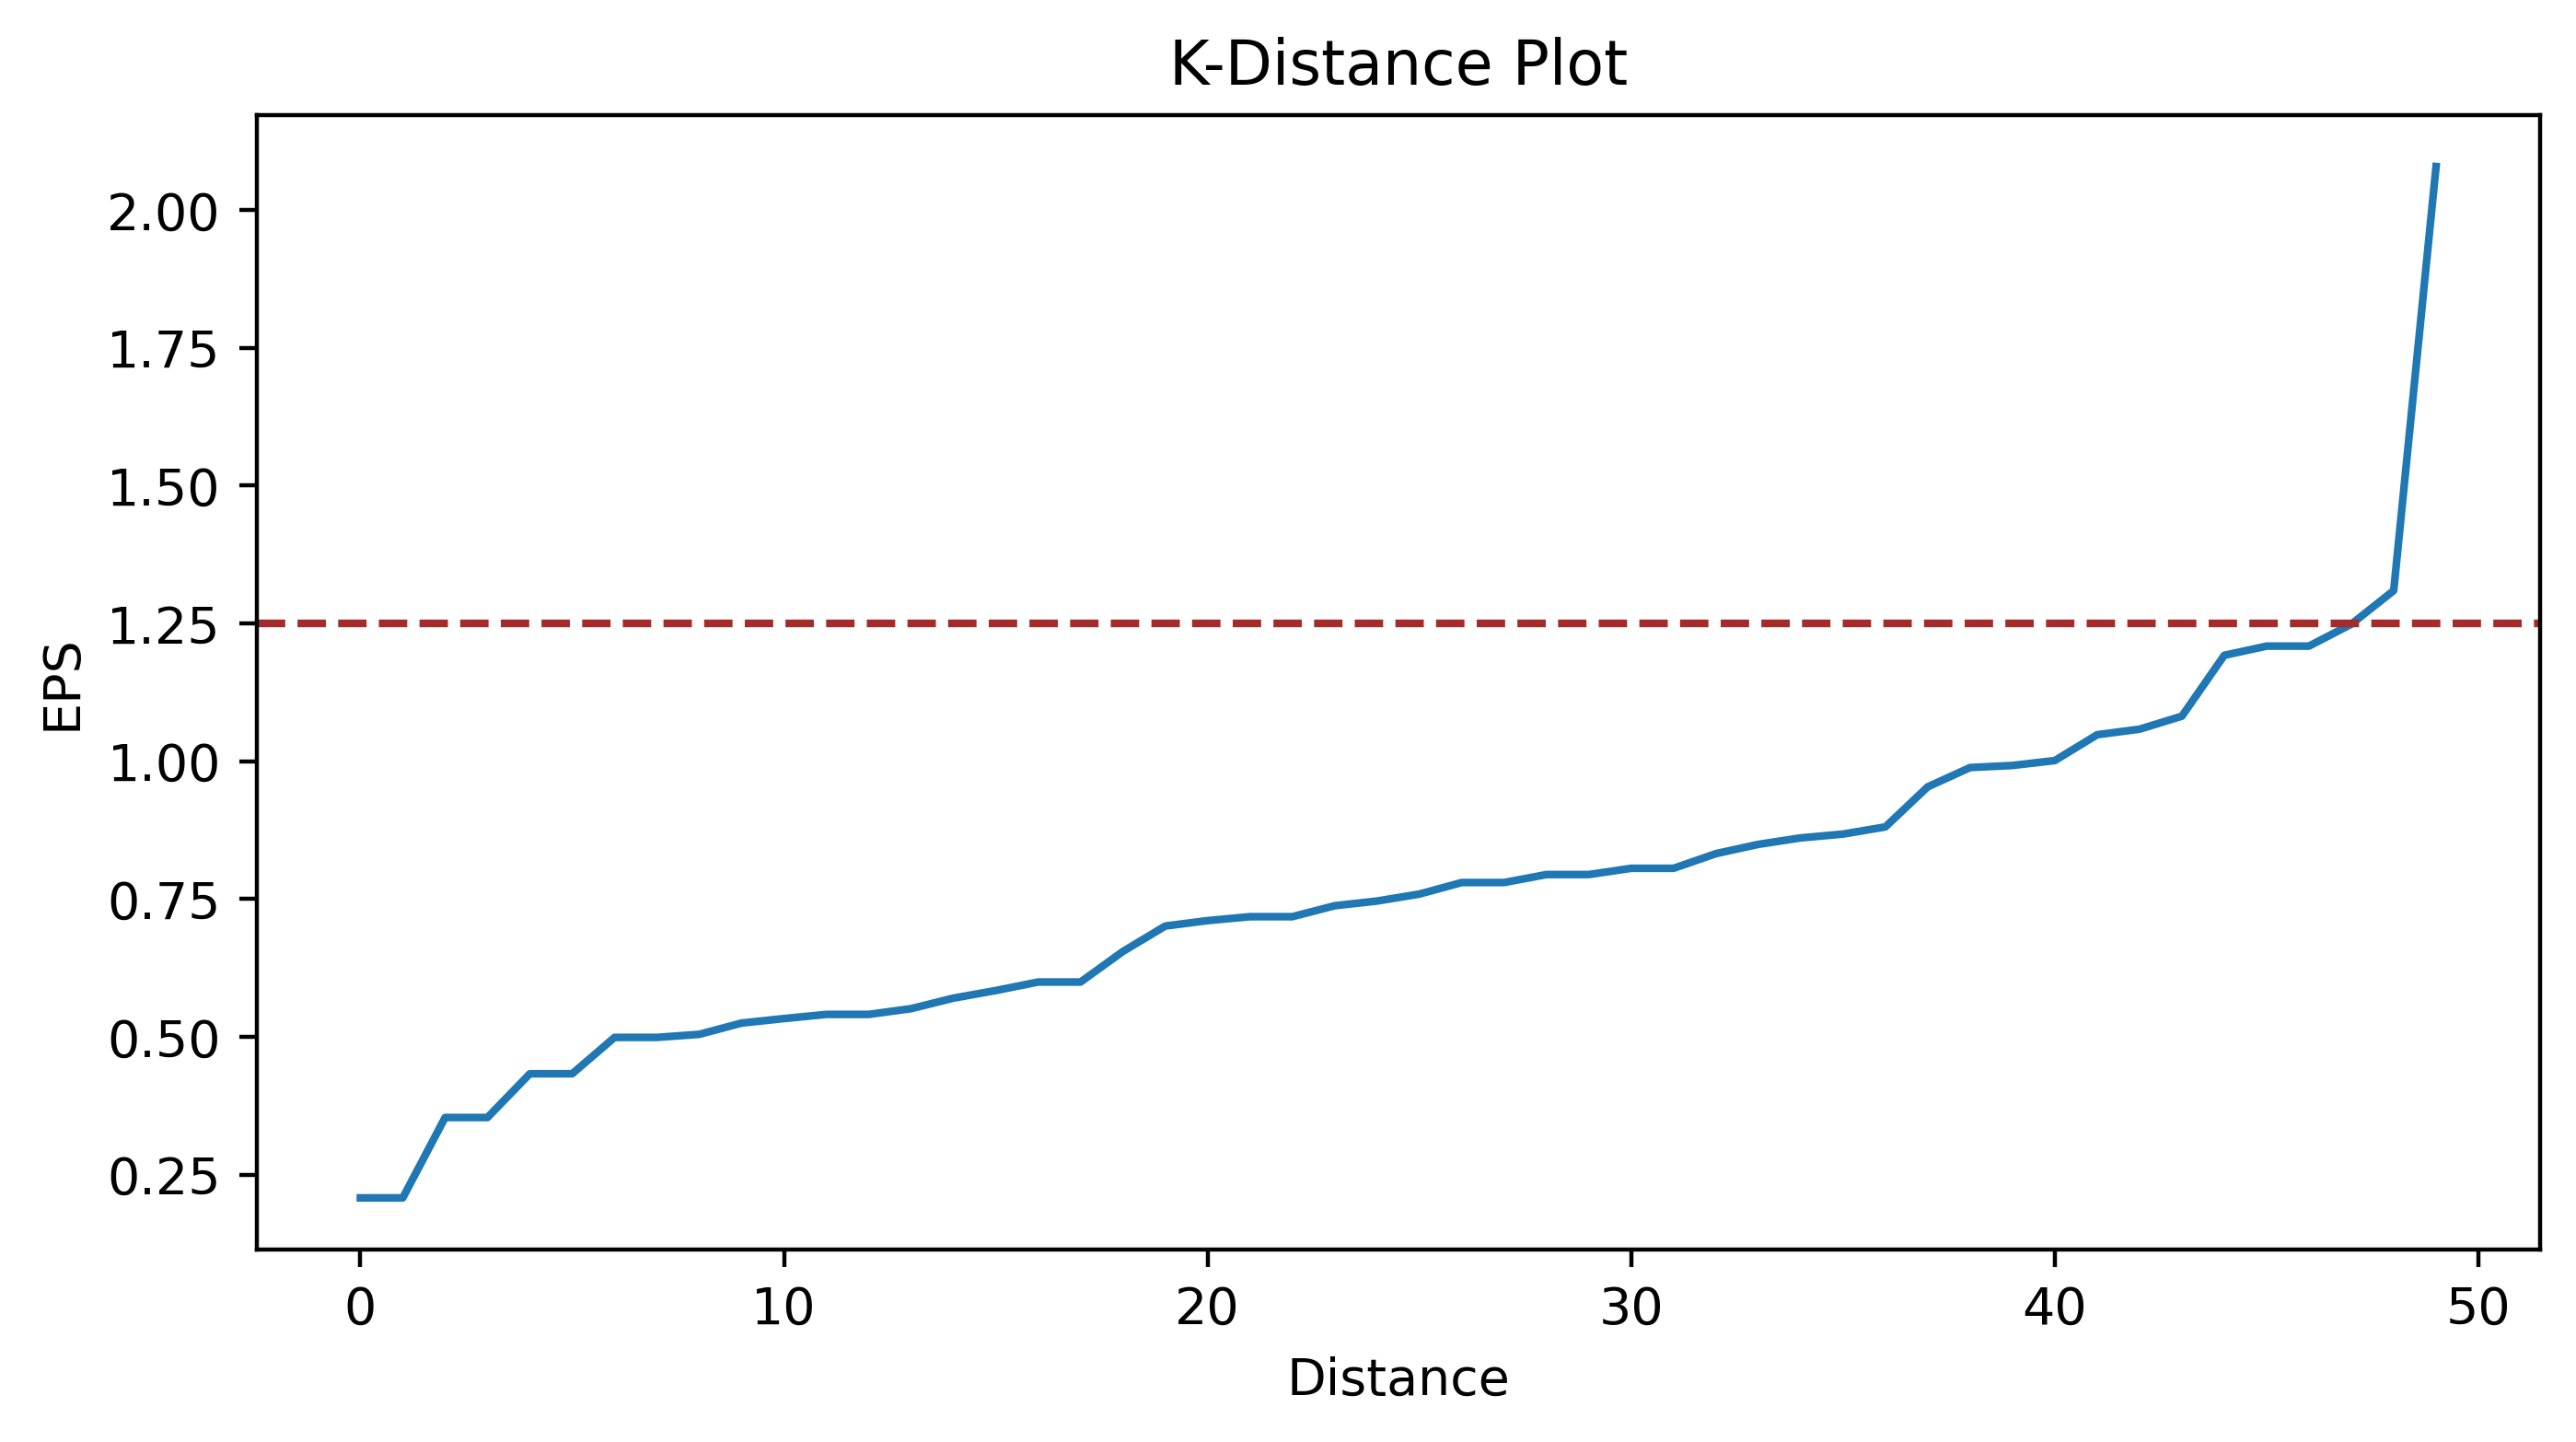

In [114]:
plt.plot(distance)
plt.axhline(y=1.25, linestyle = '--', color = 'brown')
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Plot')

In [ ]:
# Final DBSCAN Model Building

In [112]:
db = DBSCAN(eps = 1.25, min_samples=8) # min_samples = no. of columns * 2
yp = db.fit_predict(x)
yp

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [119]:
# Here final Model has also created only 1 cluster and -1 above is the outliers datapooints 

In [115]:
# Final Model Evaluation

In [116]:
silhouette_score(x, yp)

0.4047944502519567

In [117]:
# Our final model is not so good and not so bad it is moderate

In [120]:
# Visualizing final model

Text(0.5, 1.0, 'DBSCAN Prediction between Murder & Assault')

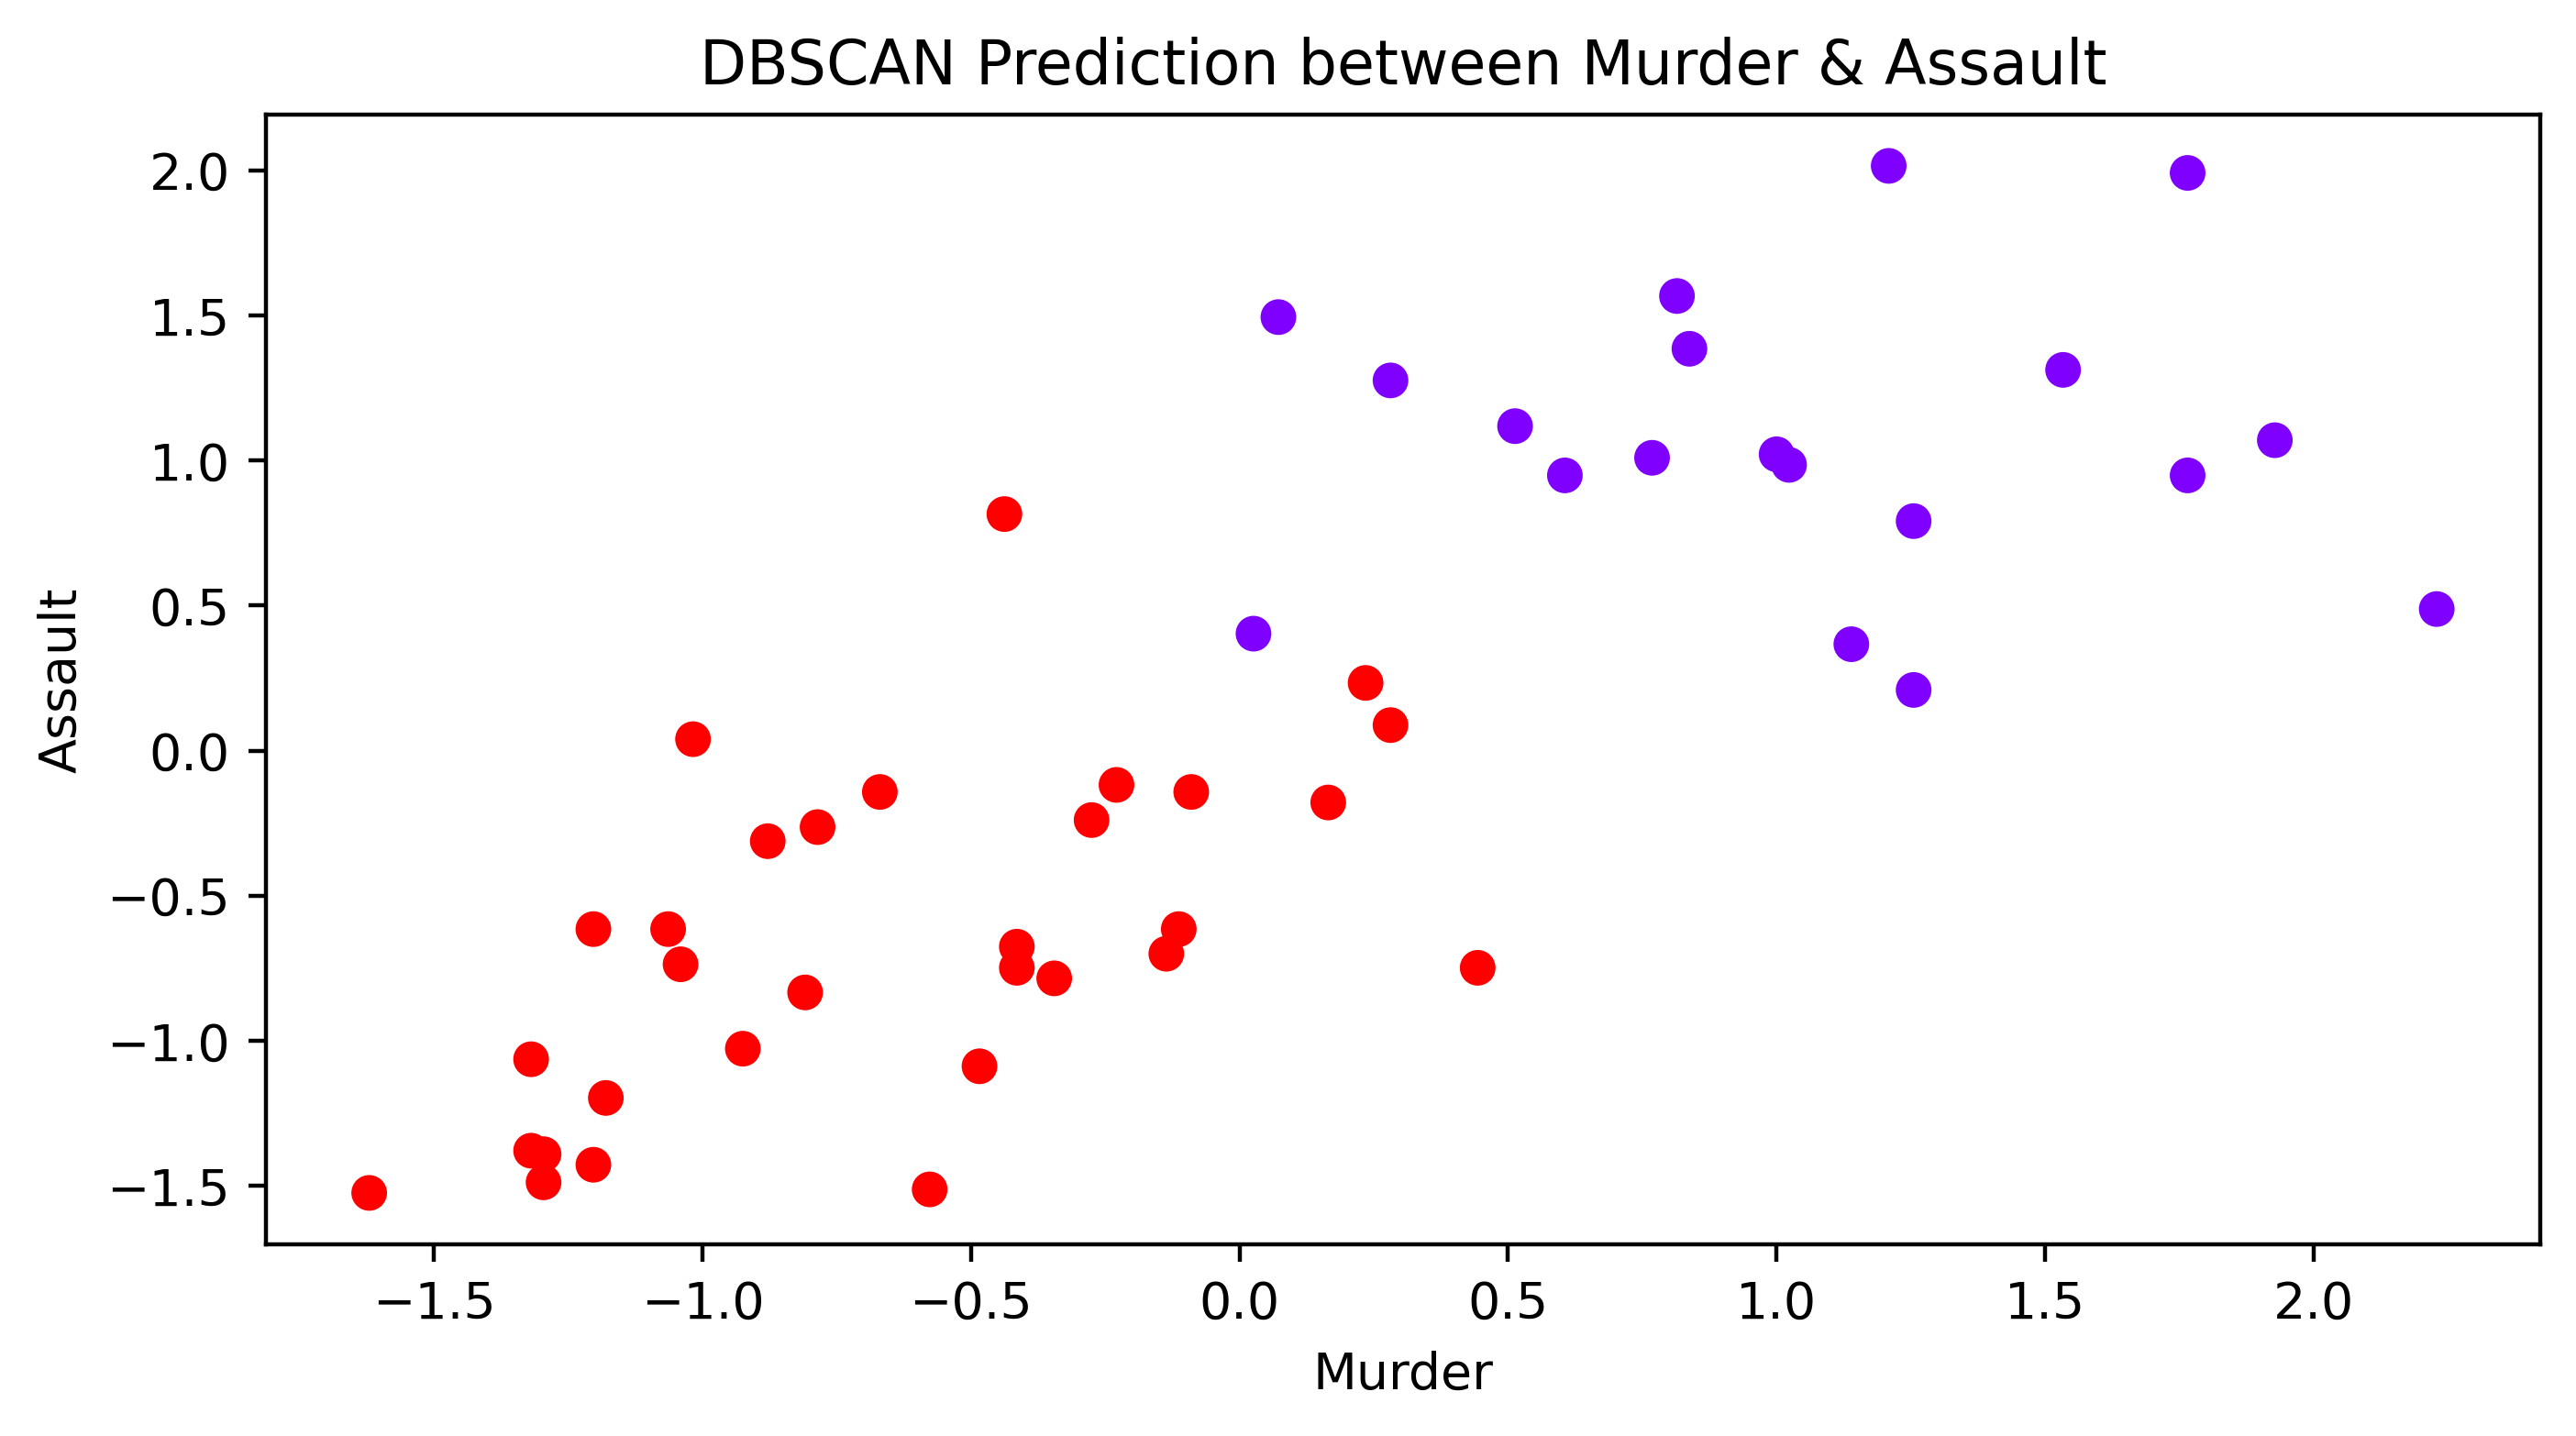

In [121]:
plt.scatter(x[:,0], x[:,1], c=yp, cmap = 'rainbow')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('DBSCAN Prediction between Murder & Assault')

Text(0.5, 1.0, 'DBSCAN Prediction between UrbanPop & Rape')

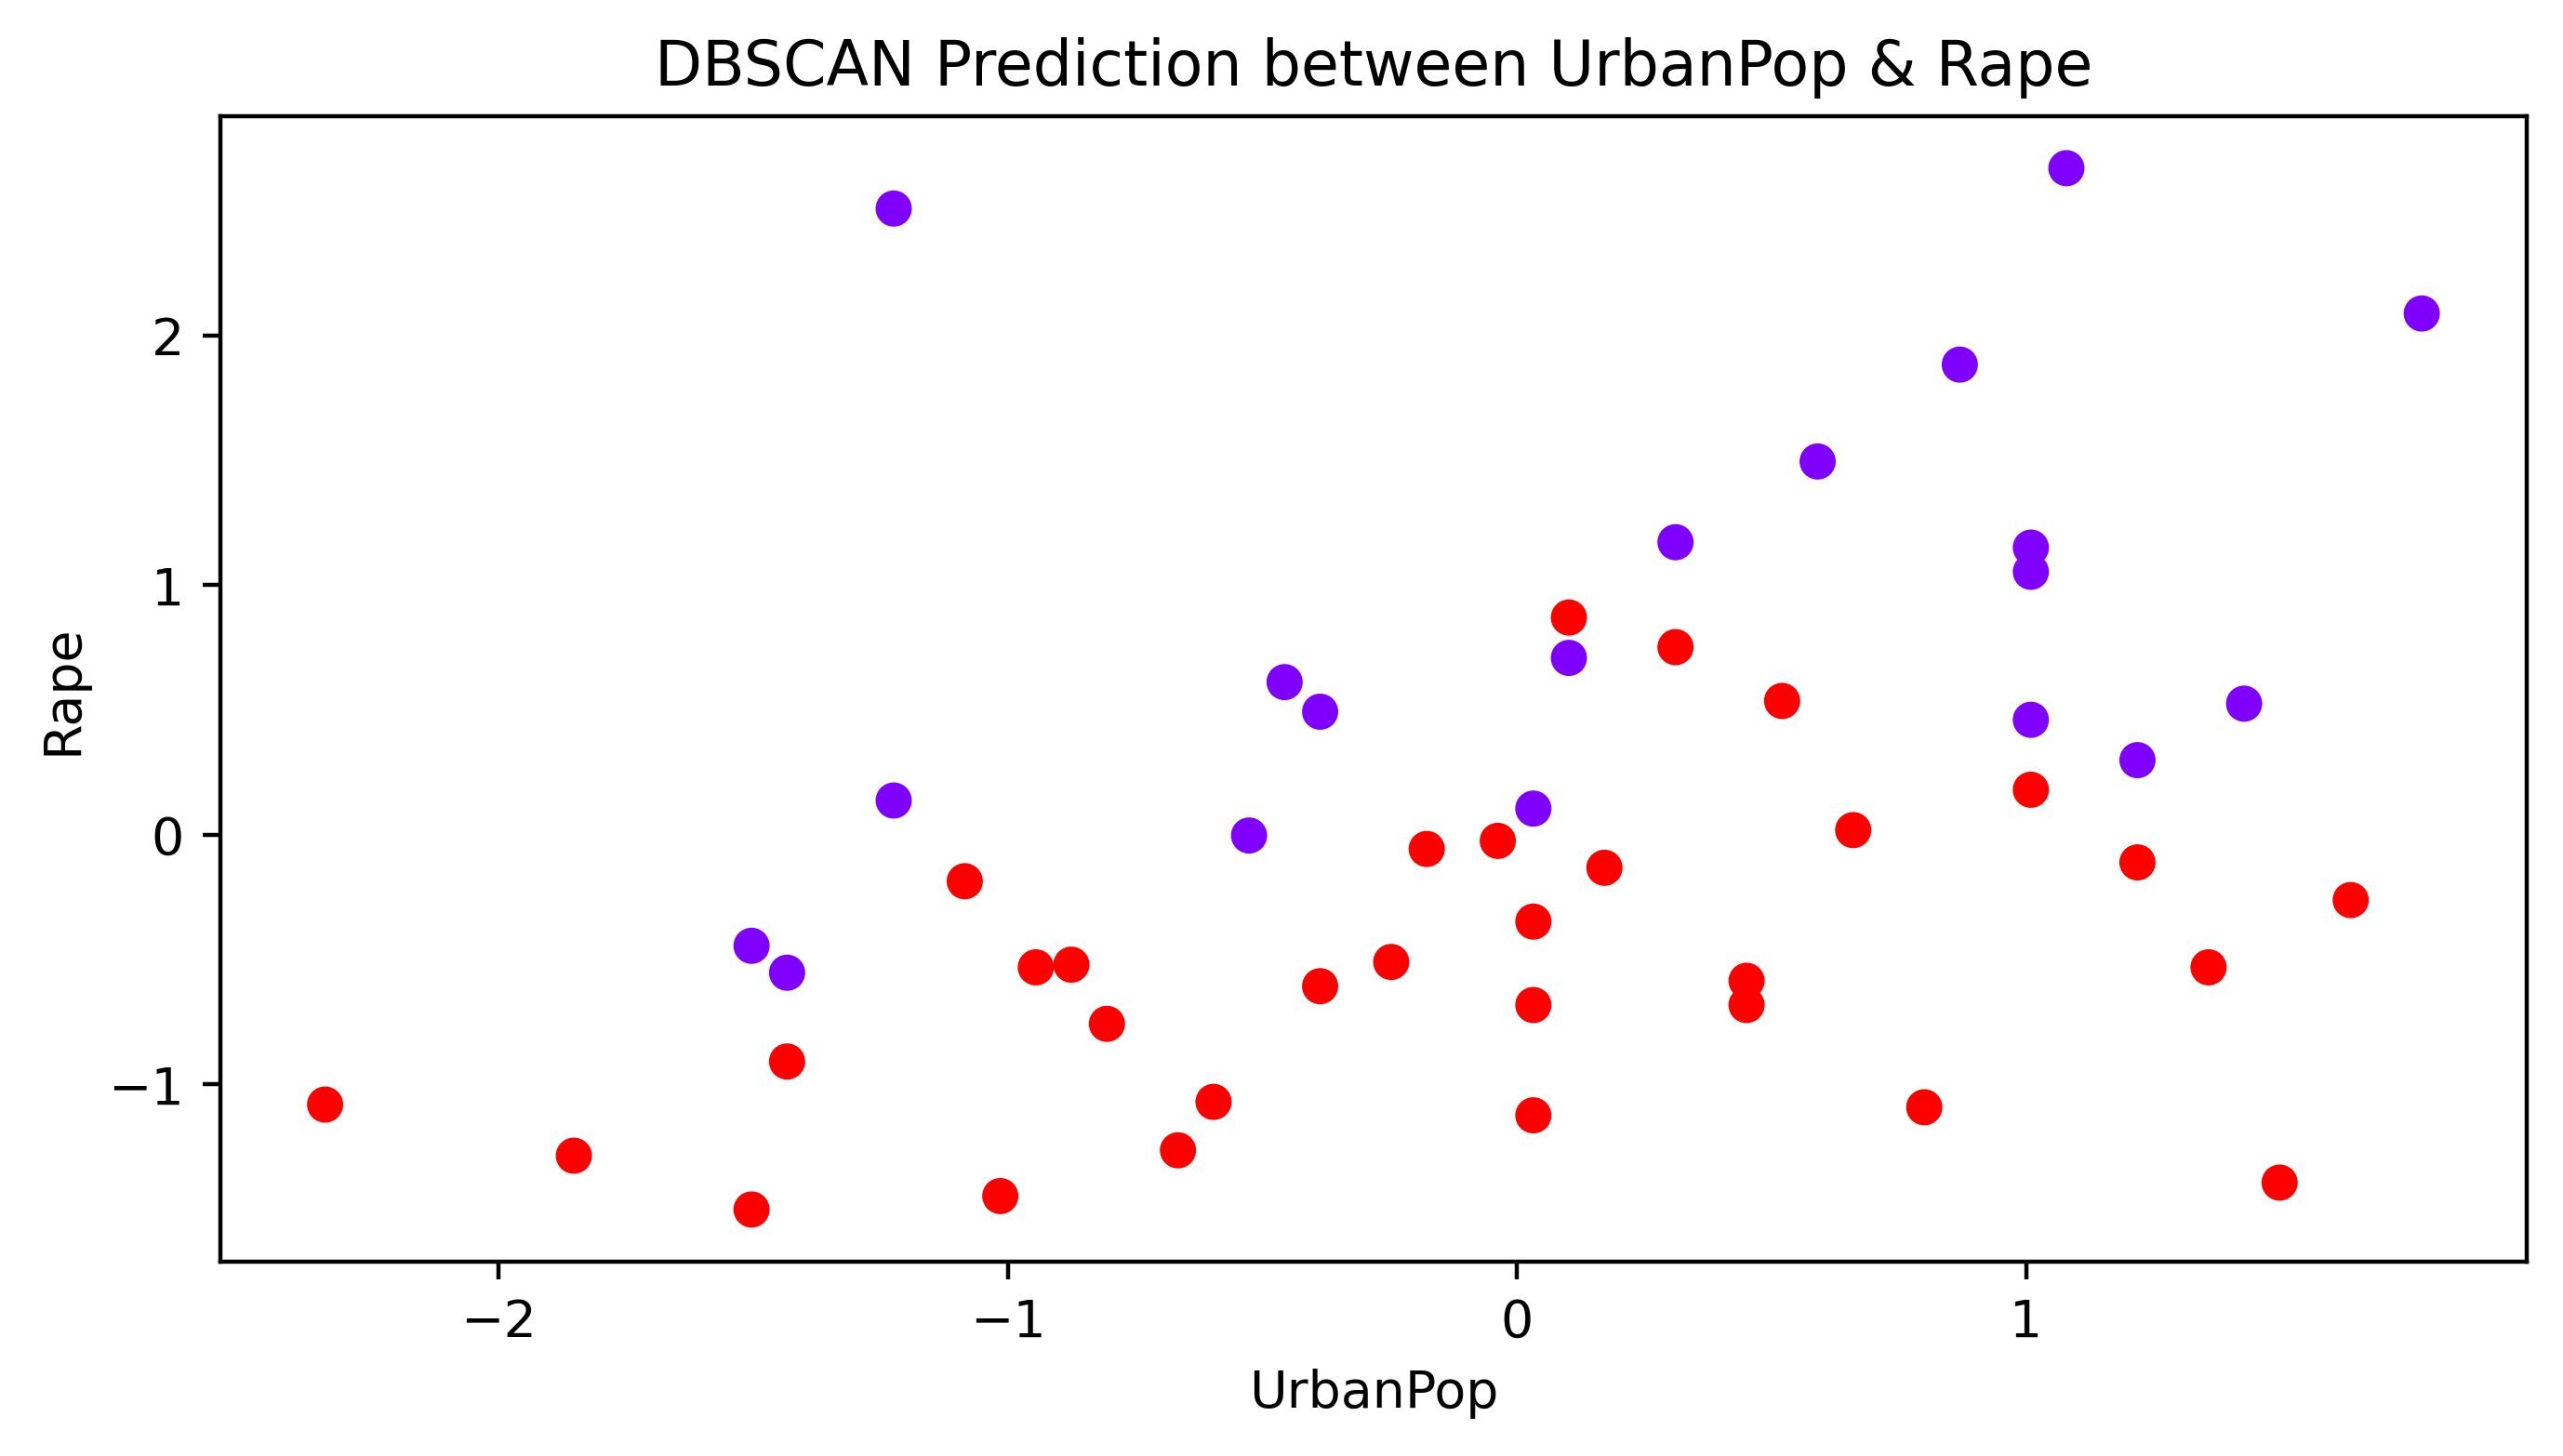

In [122]:
plt.scatter(x[:,2], x[:,3], c=yp, cmap = 'rainbow')
plt.xlabel('UrbanPop')
plt.ylabel('Rape')
plt.title('DBSCAN Prediction between UrbanPop & Rape')

Text(0.5, 1.0, 'DBSCAN Prediction between UrbanPop & Murder')

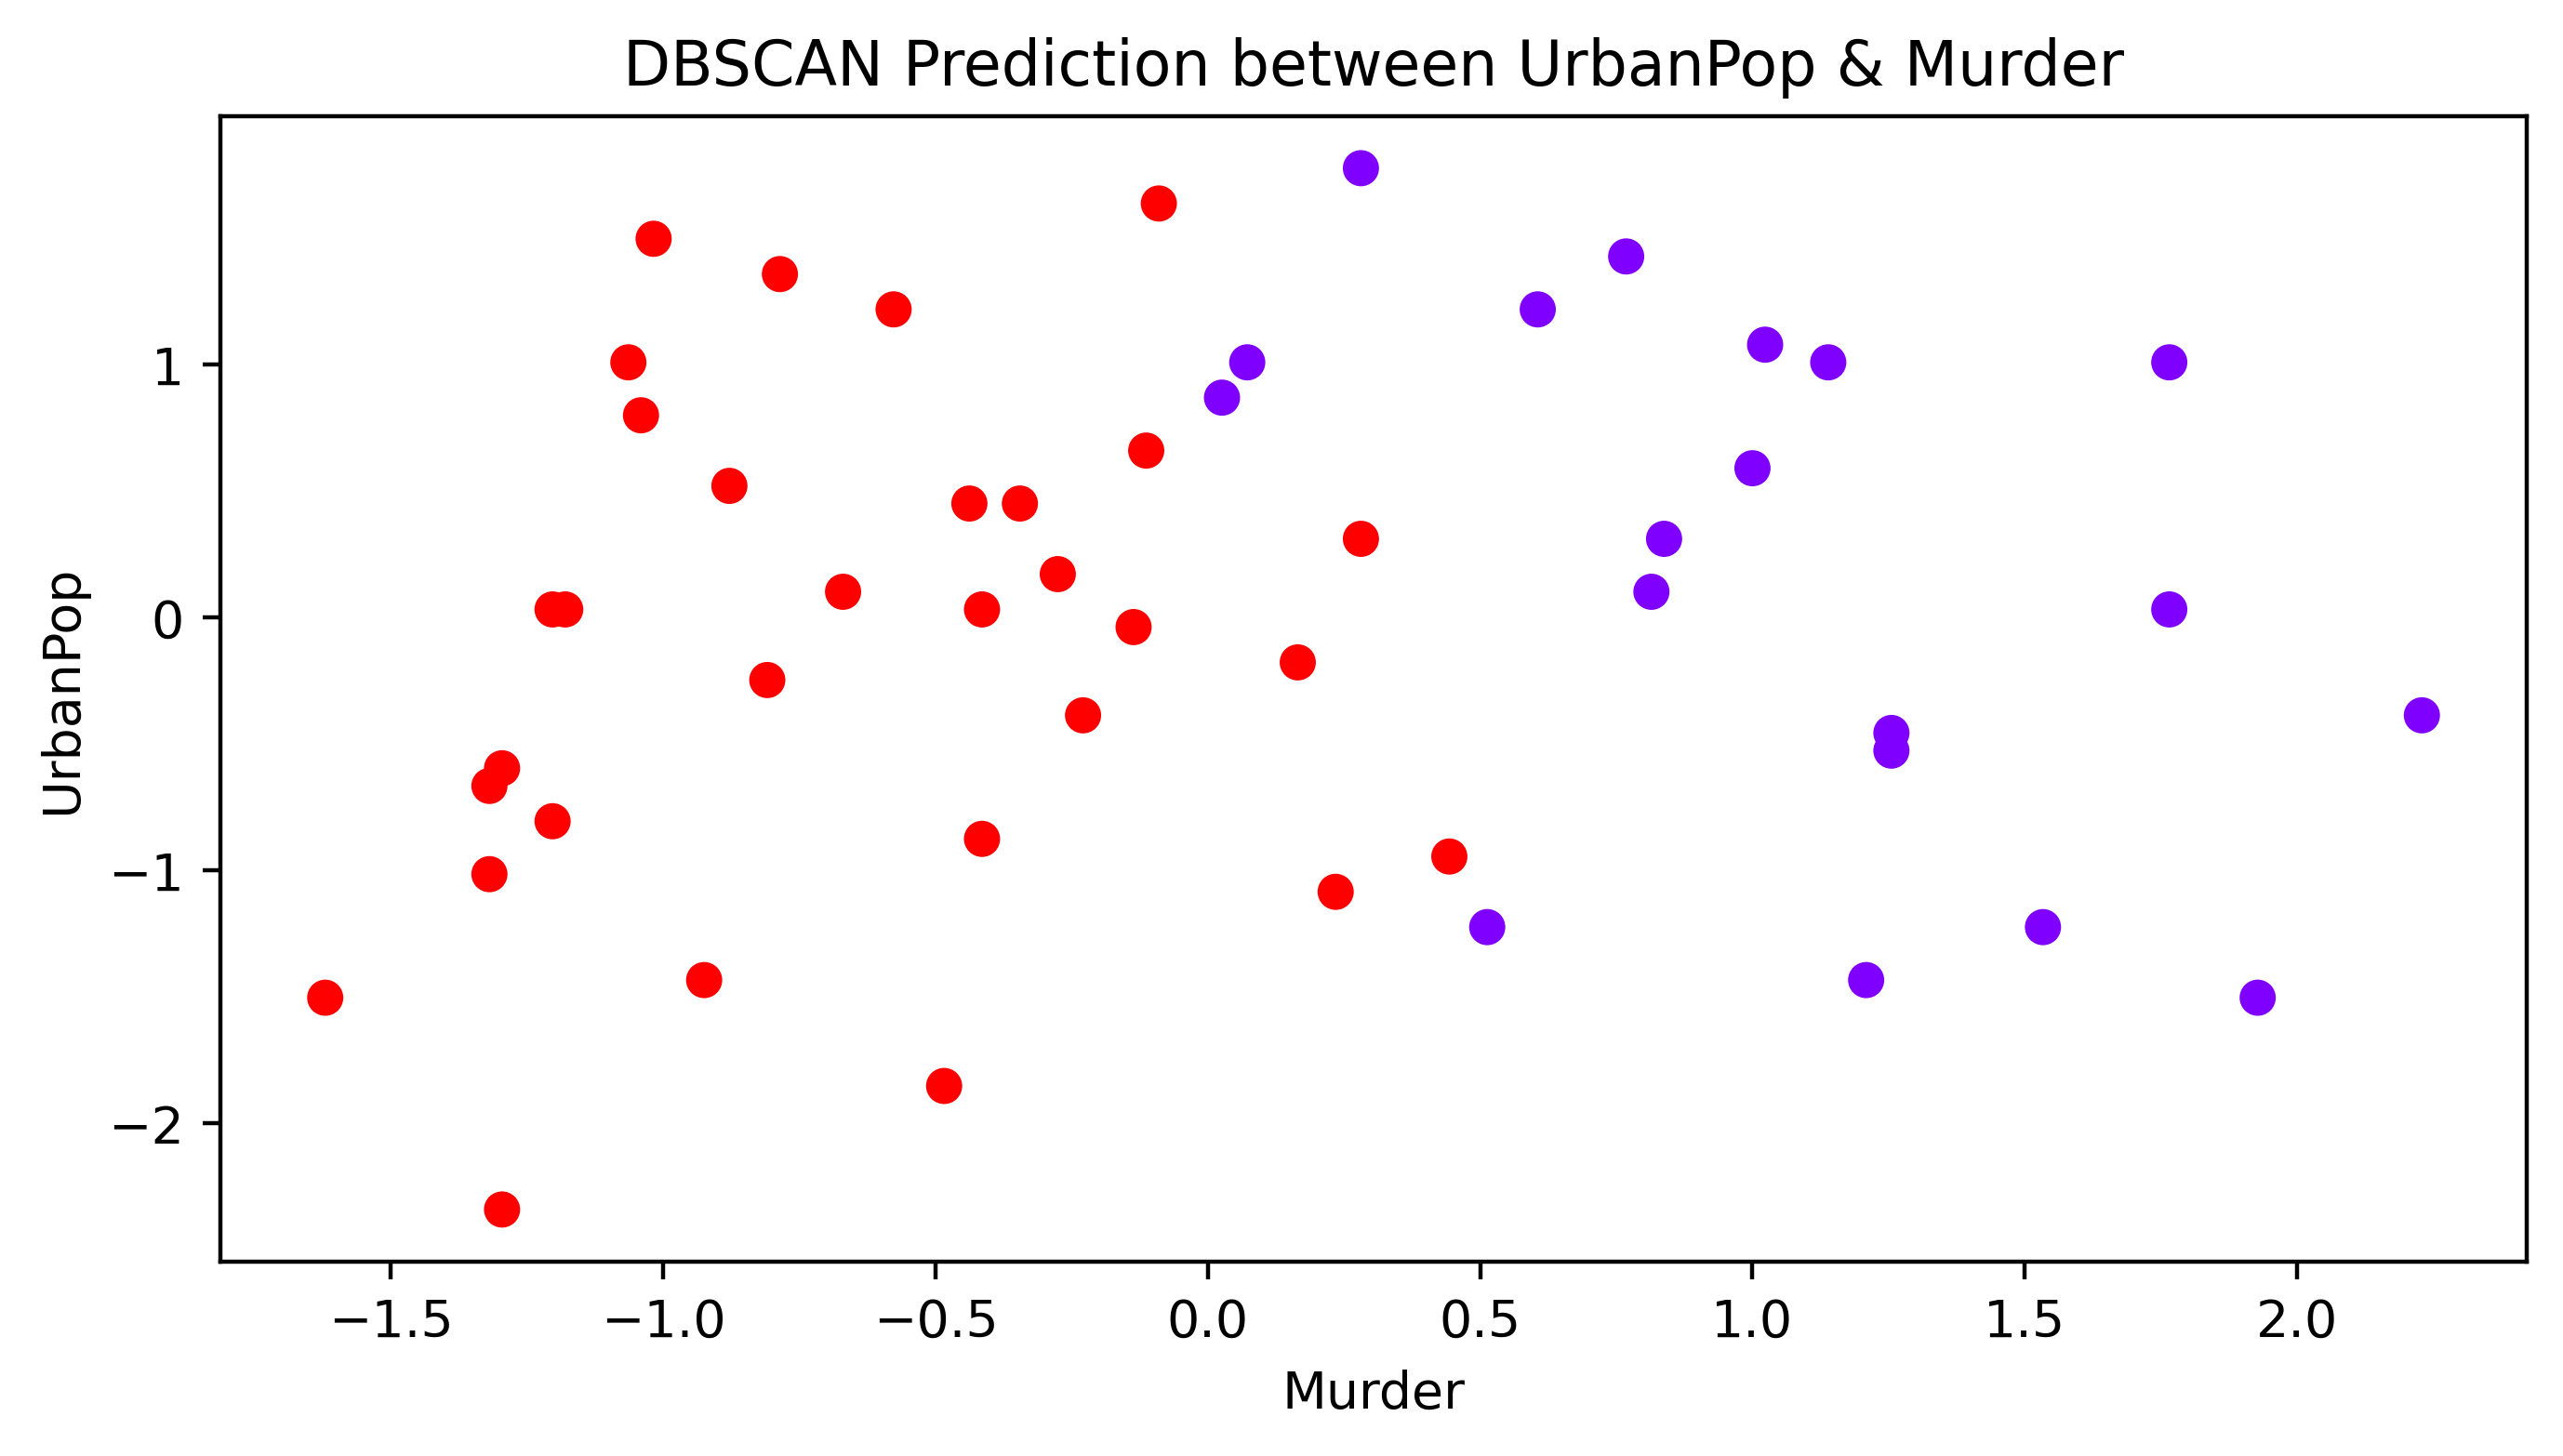

In [127]:
plt.scatter(x[:,0], x[:,2], c=yp, cmap = 'rainbow')
plt.xlabel('Murder')
plt.ylabel('UrbanPop')
plt.title('DBSCAN Prediction between UrbanPop & Murder')

Text(0.5, 1.0, 'DBSCAN Prediction between Assault & Rape')

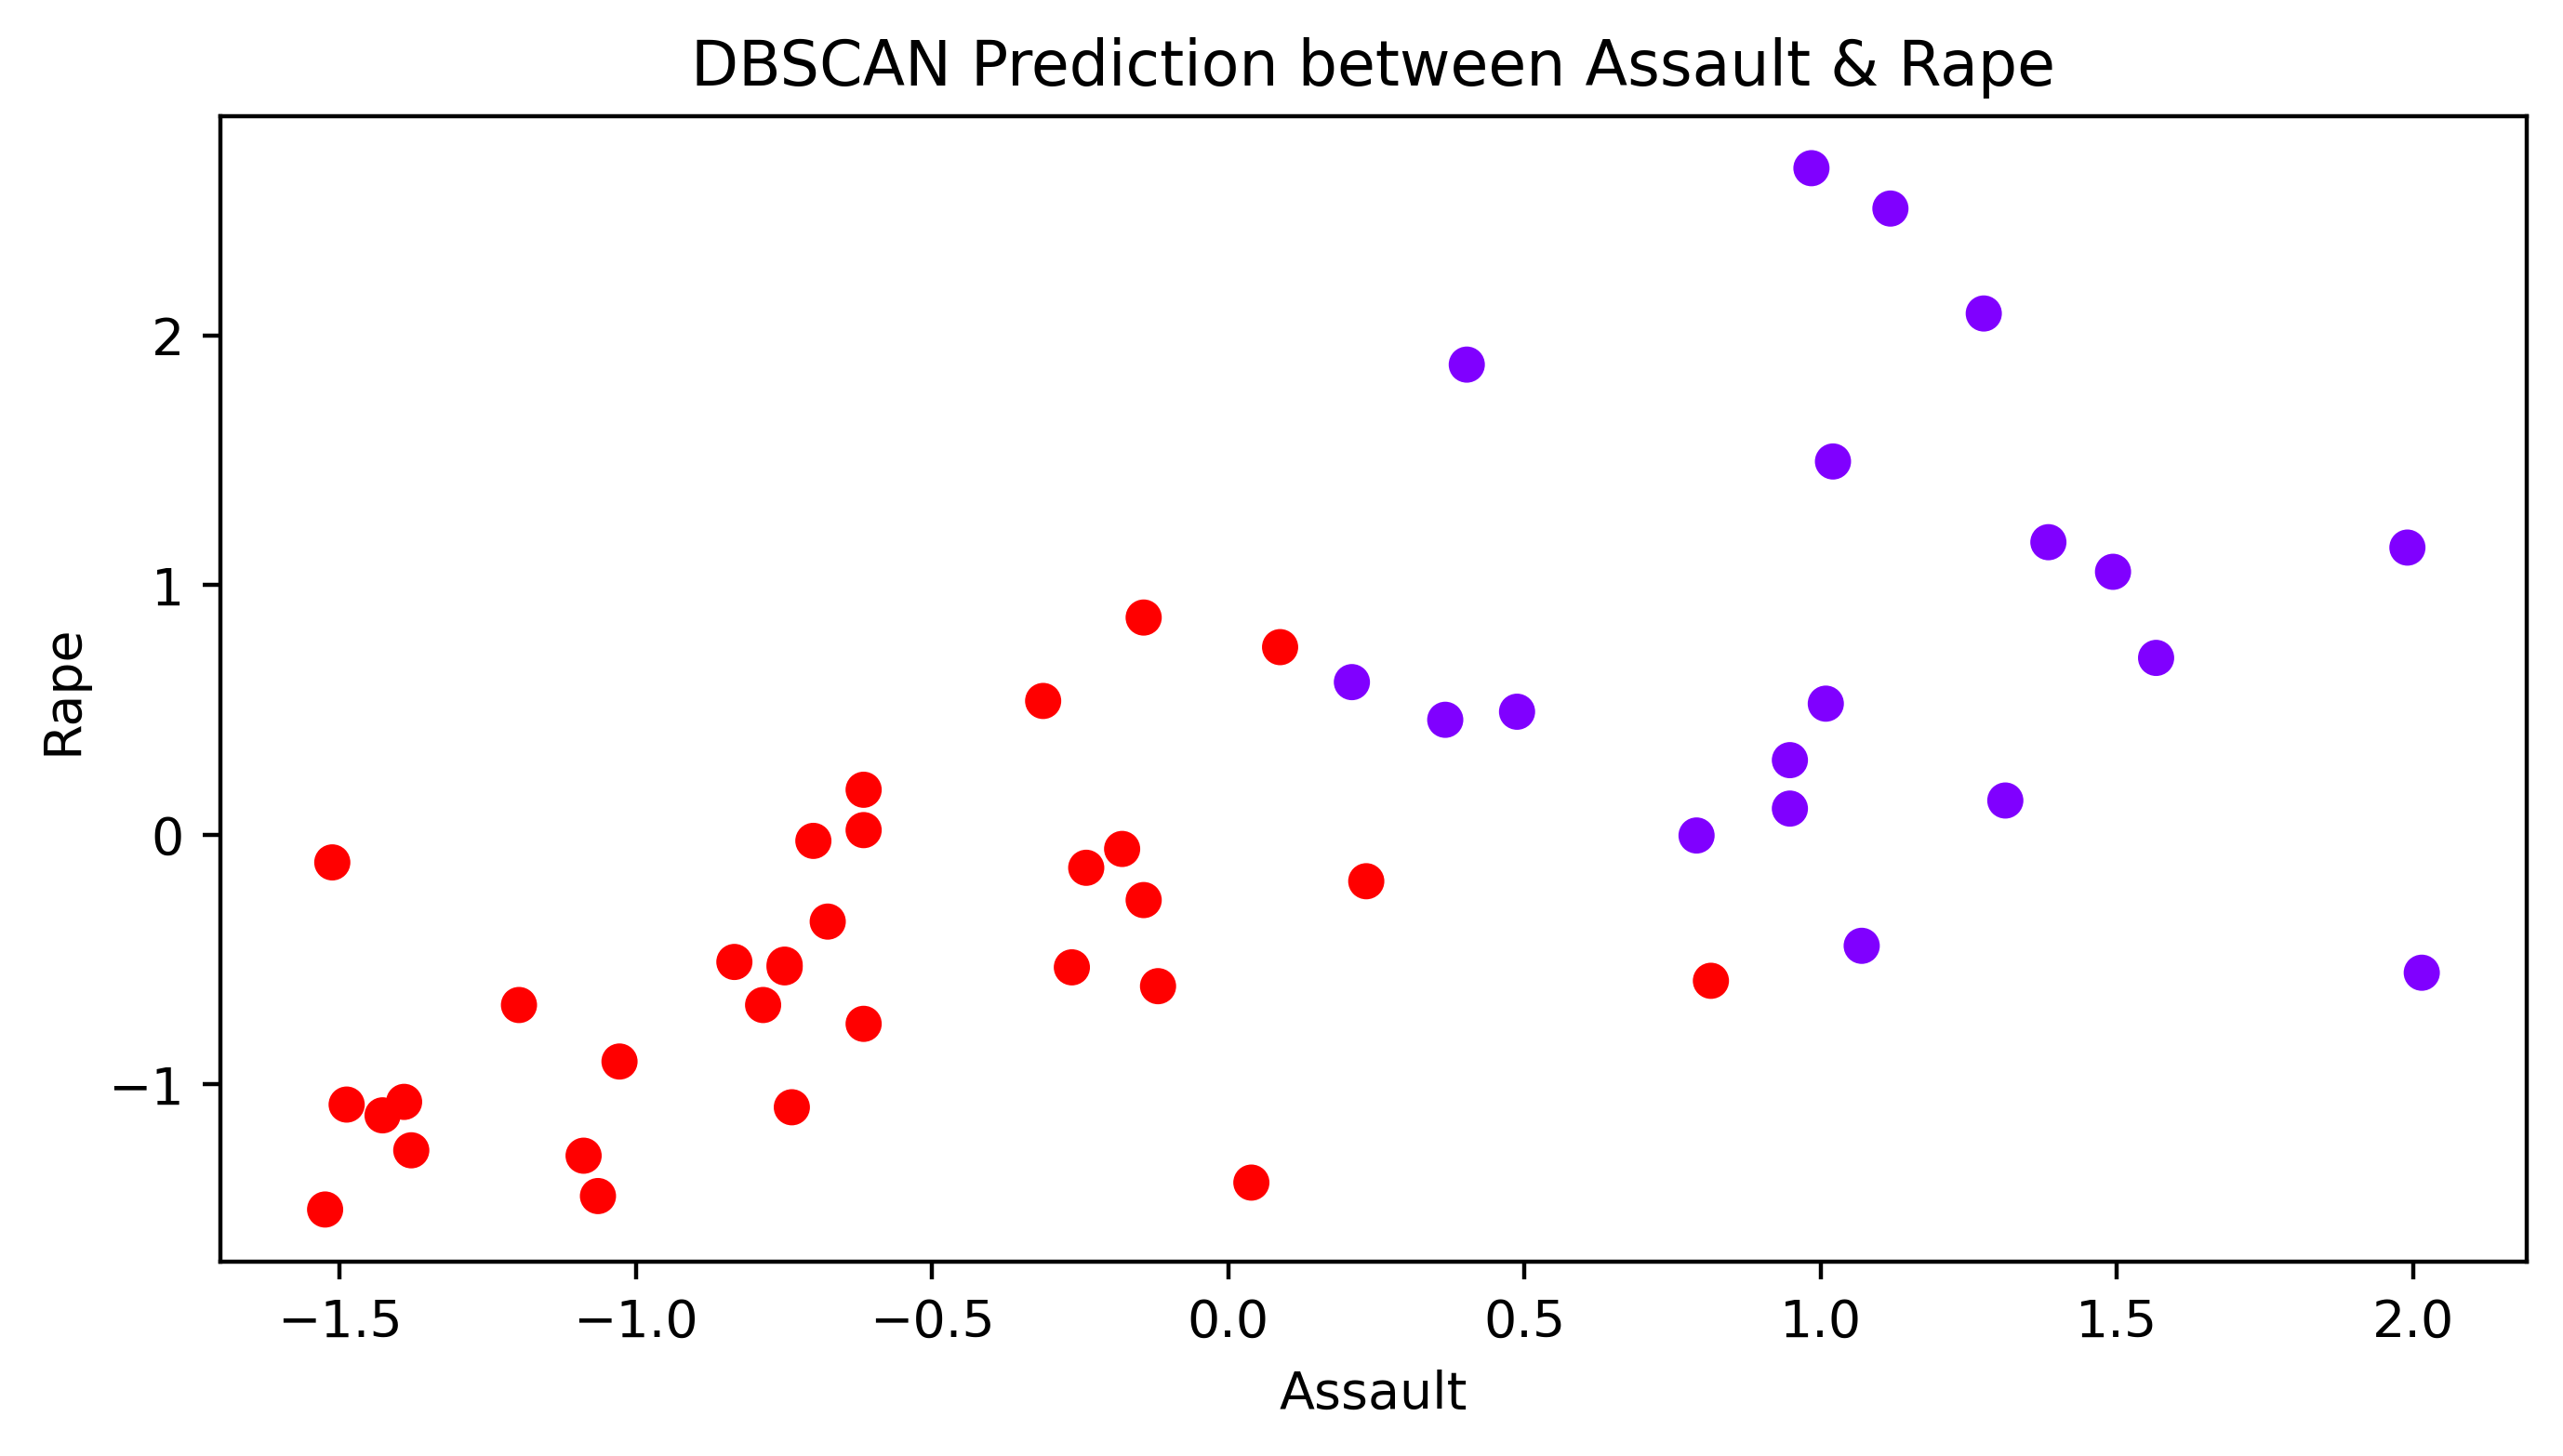

In [128]:
plt.scatter(x[:,1], x[:,3], c=yp, cmap = 'rainbow')
plt.xlabel('Assault')
plt.ylabel('Rape')
plt.title('DBSCAN Prediction between Assault & Rape')

In [118]:
# Analyzing clusters

In [124]:
raw_df['DBSCAN_Cluster'] = yp
raw_df[raw_df['DBSCAN_Cluster']==0]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM,DBSCAN_Cluster
3,Arkansas,8.8,190,50,19.5,2,2,0
6,Connecticut,3.3,110,77,11.1,3,0,0
7,Delaware,5.9,238,72,15.8,0,1,0
10,Hawaii,5.3,46,83,20.2,1,0,0
11,Idaho,2.6,120,54,14.2,3,0,0
13,Indiana,7.2,113,65,21.0,3,0,0
14,Iowa,2.2,56,57,11.3,1,0,0
15,Kansas,6.0,115,66,18.0,3,0,0
16,Kentucky,9.7,109,52,16.3,3,0,0
18,Maine,2.1,83,51,7.8,1,0,0


In [125]:
raw_df[raw_df['DBSCAN_Cluster']==-1]

,City,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM,DBSCAN_Cluster
0,Alabama,13.2,236,58,21.2,0,1,-1
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,-1
4,California,9.0,276,91,40.6,0,1,-1
5,Colorado,7.9,204,78,38.7,2,2,-1
8,Florida,15.4,335,80,31.9,0,1,-1
9,Georgia,17.4,211,60,25.8,2,2,-1
12,Illinois,10.4,249,83,24.0,0,1,-1
17,Louisiana,15.4,249,66,22.2,0,1,-1
19,Maryland,11.3,300,67,27.8,0,1,-1


In [126]:
raw_df.groupby('DBSCAN_Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape,Hierarchy_Cluster,y_Pred_KM
DBSCAN_Cluster,,,,,,
-1,12.331579,259.315789,68.315789,29.215789,0.421053,1.210526
0,5.003226,116.483871,63.838710,16.338710,1.935484,0.677419


In [129]:
# We can see that, the clusters are created according the average of crime rates in cities
# Cluster 0 is grup of cities having low crime rate 
# Cluster -1 is grup of cities having high crime rate 